In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.6 MB/s eta 0:00:00


# Utils

In [ ]:
# Function to check if the value exists in the column and is a string
def contains_special_value(column):
  if column.dtype == object:  # typically used for strings in pandas
        return column.str.contains("[-11059]", na=False)
  else:
        return pd.Series([False] * len(column), index=column.index)

  # Apply the function to each column in the DataFrame
  matches = df.apply(contains_special_value)

  # Display results
  print("Data containing '[-11059] No Good Data For Calculation':")
  for col in matches.columns:
      if matches[col].any():
          print(f"Column '{col}' contains the special value at rows: {matches[matches[col]].index.tolist()}")


In [ ]:
def replace_special_value(column):
    if column.dtype == object:  # typically used for strings in pandas
        return column.replace("[-11059] No Good Data For Calculation", np.nan)
    else:
        return column


In [ ]:
def seasonal_decompose_plot(column_name):
    # Ensure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Perform seasonal decomposition
    result = seasonal_decompose(df[column_name], model='additive', extrapolate_trend='freq',)

    # Get the individual components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Create a large figure to accommodate subplots
    fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(12, 10), sharex=True)  # Adjust figsize as needed

    # Plotting each component on its respective subplot
    axes[0].plot(df.index, trend, label='Trend', color='blue')
    axes[0].legend(loc='upper right')
    axes[0].set_title('Trend')

    axes[1].plot(df.index, seasonal, label='Seasonality', color='green')
    axes[1].legend(loc='upper right')
    axes[1].set_title('Seasonality')

    axes[2].plot(df.index, residual, label='Residuals', color='red')
    axes[2].legend(loc='upper right')
    axes[2].set_title('Residuals')

    axes[3].plot(df.index, df[column_name], label='Original', color='purple')
    axes[3].legend(loc='upper right')
    axes[3].set_title('Original Series')

    # Format x-axis to display dates properly
    for ax in axes:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Enhancing the overall layout
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)  # Adjust to fit the suptitle
    plt.suptitle(f'Seasonal Decomposition of {column_name}', fontsize=16)
    plt.show()

    return result

# Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler, MaxAbsScaler,MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import itertools

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Oil and Gas Project(Data Science)/Data/DataRecivedOnJan15/BoilerDailyData/BoilerDailyData/5YearsOfDailyData.xlsx')
df.index=df['Time']
df.drop(columns=['Time'],axis=True,inplace=True)

In [ ]:
df = df.apply(replace_special_value)

In [ ]:
df.isna().sum()

,0
Heat - RFG,0
Heat - RFG DQ,0
Temp -1,0
Temp -1DQ,0
Temp - 2,0
Temp - 2DQ,0
Temp - 3,0
Temp - 3DQ,0
OP2 Tail Gas LHV,0
OP2 Tail Gas LHVDQ,0


In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.isna().sum()

,0
Heat - RFG,0
Heat - RFG DQ,0
Temp -1,0
Temp -1DQ,0
Temp - 2,0
Temp - 2DQ,0
Temp - 3,0
Temp - 3DQ,0
OP2 Tail Gas LHV,0
OP2 Tail Gas LHVDQ,0


# Flow - OP2 Tail Gas

In [ ]:
df.columns

Index(['Heat - RFG', 'Heat - RFG DQ', 'Temp -1', 'Temp -1DQ', 'Temp - 2',
       'Temp - 2DQ', 'Temp - 3', 'Temp - 3DQ', 'OP2 Tail Gas LHV',
       'OP2 Tail Gas LHVDQ', 'OP2 Tail Gas MW', 'OP2 Tail Gas MWDQ',
       'Flow - OP2 Tail Gas', 'Flow - OP2 Tail GasDQ',
       'Firing Rate of HRVOC Fuels to BIF (EBT and OP2 Tail Gas), HHV',
       'Firing Rate of HRVOC Fuels to BIF (EBT and OP2 Tail Gas), HHVDQ',
       'Total Firing Rate of BIF (NG + EBT + OP2 Tail Gas + Phen HE), HHV',
       'Total Firing Rate of BIF (NG + EBT + OP2 Tail Gas + Phen HE), HHVDQ',
       'Heat - TG', 'Heat - TGDQ', 'HRVOC Steam Production',
       'HRVOC Steam ProductionDQ', 'Flow - RFG', 'Flow - RFGDQ'],
      dtype='object')

## Simple Training

### ADF Test

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['Flow - OP2 Tail Gas'])
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print("*"*20)

ADF Statistic: -7.5109130180785515
p-value: 4.017934339465355e-11
********************


P Value is less than 0.05 and ADF statistic show a greater negative value so series is stationary

In [ ]:
# # Train Test Split
train = df['Flow - OP2 Tail Gas'].iloc[:-int(len(df['Flow - OP2 Tail Gas']) * 0.1)]
test = df['Flow - OP2 Tail Gas'].iloc[-int(len(df['Flow - OP2 Tail Gas']) * 0.1):]

In [ ]:
len(test)

182

In [ ]:
len(train)

1645

In [ ]:
len(df)

1827

### Plot PACF and ACF

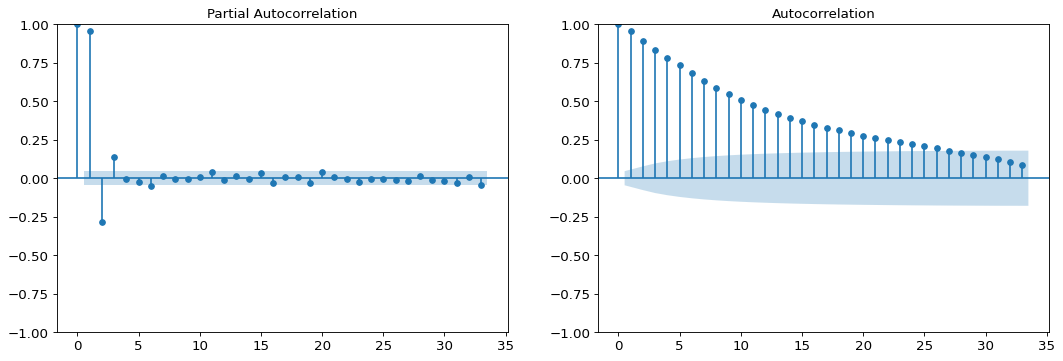

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_pacf(df['Flow - OP2 Tail Gas'], method='ywm' ,ax=ax1)  # Specify the axis for PACF
plot_acf(df['Flow - OP2 Tail Gas'], ax=ax2)  # Specify the axis for ACF
ax2.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='both', labelsize=12)
plt.show()


### Training and Testing

#### ARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=False,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=1, start_q=1, # minimum p and q
                      max_p=5, max_q=5, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      max_order=None,
                      error_action='ignore',
                      scoring='mae',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13242.648, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11126.779, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9549.804, Time=0.52 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=8496.157, Time=0.63 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=7815.327, Time=0.91 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=7407.640, Time=1.63 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5740.650, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5740.894, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5734.143, Time=0.28 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5731.500, Time=0.38 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=5731.091, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5741.520, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.13 sec
 ARIMA(2,0,3)(0,0,0)[0]

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 9.035860089666322
MAE: 8.446388272217465


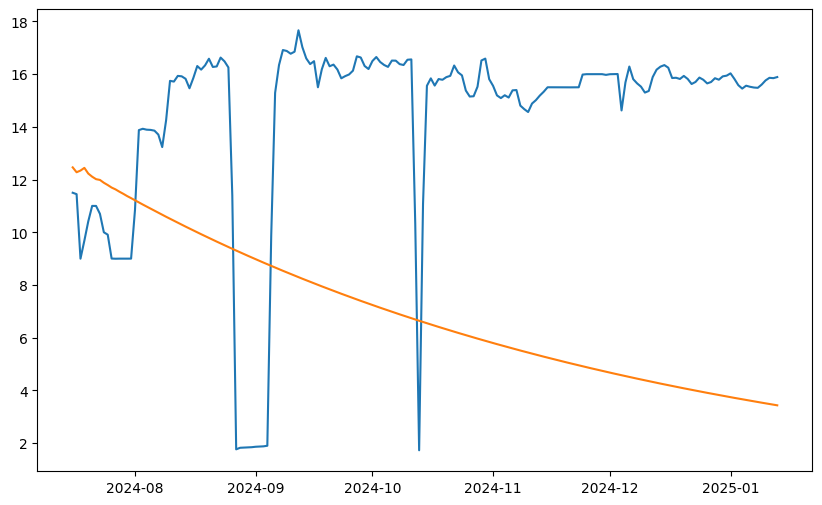

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')

#### SARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=True,     # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0,
                      start_q=0,          # minimum p and q
                      max_p=3,
                      max_q=3,           # maximum p and q
                      D=None,                # let model determine 'D'
                      trace=True,
                      error_action='warn',  # change to 'warn' to see errors
                      suppress_warnings=True,
                      stepwise=False,        # change to False for exhaustive search
                      scoring='mae',
                      max_order=None,
                      # n_jobs=-1,  # Utilize all available CPU cores
                      with_intercept='auto'
                      )

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=9987.625, Time=0.09 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=9330.785, Time=1.35 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=9168.168, Time=2.71 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=9085.143, Time=2.02 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=9086.477, Time=1.89 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=9087.877, Time=5.59 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=9086.522, Time=5.38 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=9088.248, Time=4.80 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=7.58 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=8145.755, Time=0.93 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=7725.042, Time=2.73 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=7593.383, Time=3.21 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=7532.053, Time=1.63 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=7529.010, Time=3.19 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=7531.010, Time=6.37 sec
 ARIMA(0,0,1)(2

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1645
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2840.320
Date:                Fri, 24 Jan 2025   AIC                           5690.641
Time:                        13:07:53   BIC                           5717.668
Sample:                    01-14-2020   HQIC                          5700.663
                         - 07-15-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5865      0.103      5.706      0.000       0.385       0.788
ar.L1          1.2649      0.013     95.337      0.000       1.239       1.291
ar.L2         -0.4369      0.020    -22.098      0.0

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)

In [ ]:
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 4.013791725604137
MAE: 3.541893104110649


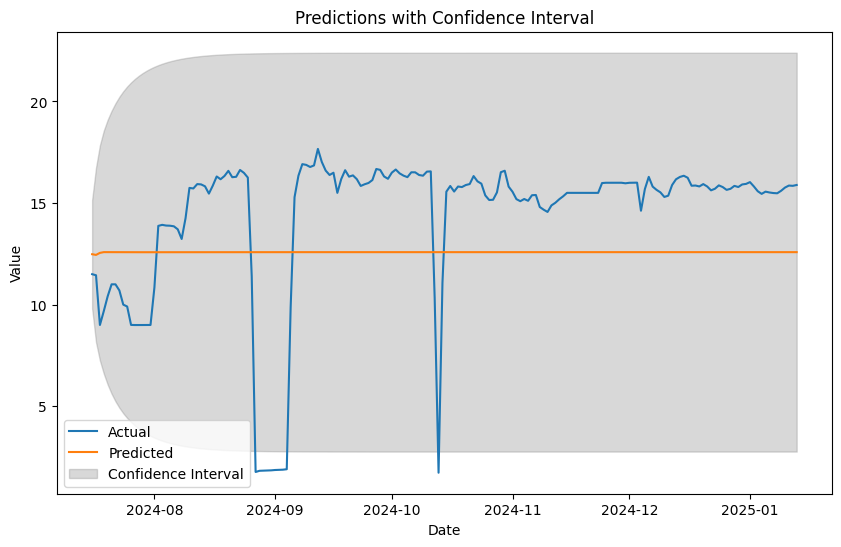

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Prophet

In [ ]:
# Train Test Split
train = df['Flow - OP2 Tail Gas'].iloc[:-int(len(df['Flow - OP2 Tail Gas']) * 0.1)]
test =df['Flow - OP2 Tail Gas'].iloc[-int(len(df['Flow - OP2 Tail Gas']) * 0.1):]

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
testDf=pd.DataFrame()
testDf['ds']=test.index
testDf['y']=test.values

In [ ]:
param_grid = {
    # 'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    # 'holidays_prior_scale': [0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'interval_width': [0.8, 0.9, 0.95],
    # 'n_changepoints': [10, 25, 50],
    # 'changepoint_range': [0.8, 0.9, 1.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [ ]:
best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet(**params)
    trainDf['cap'] = 1.2 * trainDf['y'].max()
    model.fit(trainDf)

    future = model.make_future_dataframe(periods=len(testDf))
    future['cap'] = 1.2 * trainDf['y'].max()
    forecast = model.predict(future)
    rmse = np.sqrt(mean_squared_error(testDf['y'], forecast['yhat'][-len(testDf):]))



    # # Make future predictions (adjust periods as needed)
    # future = model.make_future_dataframe(periods=len(trainDf))
    # future['cap'] = 1.2 * trainDf['y'].max()
    # forecast = model.predict(future)

    # # Calculate MAPE or any other metric
    # # mape = mean_absolute_percentage_error(trainDf['y'], forecast['yhat'][:len(trainDf)])  # Adjust as necessary
    # rmse = np.sqrt(mean_squared_error(trainDf['y'], forecast['yhat'][:len(trainDf)]))

    print(f"Parameters: {params}, RMSE: {rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print(f'Best RMSE: {rmse}')
print(f'Best Parameters: {best_params}')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/afcbwqha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/21mauv8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60417', 'data', 'file=/tmp/tmpp90twyik/afcbwqha.json', 'init=/tmp/tmpp90twyik/21mauv8l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld6j55u29/prophet_model-20250124130753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p9mxv0xk.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.615240924313409


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dssqhvw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43060', 'data', 'file=/tmp/tmpp90twyik/p9mxv0xk.json', 'init=/tmp/tmpp90twyik/dssqhvw9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo9uh2fnx/prophet_model-20250124130755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0oyam_k1.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.615240924313409


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t0z12sgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23983', 'data', 'file=/tmp/tmpp90twyik/0oyam_k1.json', 'init=/tmp/tmpp90twyik/t0z12sgk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellv0gaxo5/prophet_model-20250124130756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/56ocjpvi.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.615240924313409


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cp_83vmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19419', 'data', 'file=/tmp/tmpp90twyik/56ocjpvi.json', 'init=/tmp/tmpp90twyik/cp_83vmi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln3ltpnui/prophet_model-20250124130756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1upgz7vr.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.628134019617425


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o0c5x1_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61437', 'data', 'file=/tmp/tmpp90twyik/1upgz7vr.json', 'init=/tmp/tmpp90twyik/o0c5x1_0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelev0_qd1c/prophet_model-20250124130757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dc77j426.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7358oh6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.628134019617425


13:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hphx9anu.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.628134019617425


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ybpbi8be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30130', 'data', 'file=/tmp/tmpp90twyik/hphx9anu.json', 'init=/tmp/tmpp90twyik/ybpbi8be.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt5ma5i96/prophet_model-20250124130759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/00n2g1th.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/03py6pim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.622788057978619


13:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eziamh_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mh7xvswa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41677', 'data', 'file=/tmp/tmpp90twyik/eziamh_a.json', 'init=/tmp/tmpp90twyik/mh7xvswa.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model25rbbj8v/prophet_model-20250124130800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.622788057978619


13:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2d85bsne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2x7gqeub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24164', 'data', 'file=/tmp/tmpp90twyik/2d85bsne.json', 'init=/tmp/tmpp90twyik/2x7gqeub.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model04r6byze/prophet_model-20250124130801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.622788057978619


13:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yd8csary.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n6rp5oav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9208', 'data', 'file=/tmp/tmpp90twyik/yd8csary.json', 'init=/tmp/tmpp90twyik/n6rp5oav.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltsxx1zms/prophet_model-20250124130801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.621863216480206


13:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j43qchhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/djrkw35r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5303', 'data', 'file=/tmp/tmpp90twyik/j43qchhj.json', 'init=/tmp/tmpp90twyik/djrkw35r.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelawd4d96v/prophet_model-20250124130802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.621863216480206


13:08:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ewbtqszm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wu_oy486.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17917', 'data', 'file=/tmp/tmpp90twyik/ewbtqszm.json', 'init=/tmp/tmpp90twyik/wu_oy486.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld2310pmd/prophet_model-20250124130803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.621863216480206


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gp2gexpk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pyhrt5iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28652', 'data', 'file=/tmp/tmpp90twyik/gp2gexpk.json', 'init=/tmp/tmpp90twyik/pyhrt5iw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9qchz4f1/prophet_model-20250124130803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.547125642101982


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pr6q5qi2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ykful_o5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54380', 'data', 'file=/tmp/tmpp90twyik/pr6q5qi2.json', 'init=/tmp/tmpp90twyik/ykful_o5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc28ub8po/prophet_model-20250124130804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.547125642101982


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e1i_q79m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1wpagbi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78845', 'data', 'file=/tmp/tmpp90twyik/e1i_q79m.json', 'init=/tmp/tmpp90twyik/1wpagbi5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellvajcdgm/prophet_model-20250124130804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.547125642101982


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tvyfvj0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hsil3kin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67993', 'data', 'file=/tmp/tmpp90twyik/tvyfvj0b.json', 'init=/tmp/tmpp90twyik/hsil3kin.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2bbk1l9x/prophet_model-20250124130805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.538553825970753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/50jbnjcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xos2y2j8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87931', 'data', 'file=/tmp/tmpp90twyik/50jbnjcw.json', 'init=/tmp/tmpp90twyik/xos2y2j8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1htkwk5m/prophet_model-20250124130805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.538553825970753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/139zti2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3f0sh387.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17642', 'data', 'file=/tmp/tmpp90twyik/139zti2e.json', 'init=/tmp/tmpp90twyik/3f0sh387.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmava727q/prophet_model-20250124130806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.538553825970753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cqba6vru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ulbo3kj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14594', 'data', 'file=/tmp/tmpp90twyik/cqba6vru.json', 'init=/tmp/tmpp90twyik/ulbo3kj8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_39784oz/prophet_model-20250124130806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.5301596007090756


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5agagiwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vdao0td5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45127', 'data', 'file=/tmp/tmpp90twyik/5agagiwk.json', 'init=/tmp/tmpp90twyik/vdao0td5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8gn1t808/prophet_model-20250124130807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.5301596007090756


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2e9rrxz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/beeknw53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83396', 'data', 'file=/tmp/tmpp90twyik/2e9rrxz6.json', 'init=/tmp/tmpp90twyik/beeknw53.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellgwia9fp/prophet_model-20250124130807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.5301596007090756


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/72ur4p00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8ouctvw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55902', 'data', 'file=/tmp/tmpp90twyik/72ur4p00.json', 'init=/tmp/tmpp90twyik/8ouctvw3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyw2e9voj/prophet_model-20250124130807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v77po843.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wvhmeswj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40372', 'data', 'file=/tmp/tmpp90twyik/v77po843.json', 'init=/tmp/tmpp90twyik/wvhmeswj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9vbu4iue/prophet_model-20250124130808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rdp3_3mi.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jiouo2dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1431', 'data', 'file=/tmp/tmpp90twyik/rdp3_3mi.json', 'init=/tmp/tmpp90twyik/jiouo2dt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelg3grr990/prophet_model-20250124130809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/izipy1vn.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.645597586402806


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m604jfmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69796', 'data', 'file=/tmp/tmpp90twyik/izipy1vn.json', 'init=/tmp/tmpp90twyik/m604jfmz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgldqv0lp/prophet_model-20250124130810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kpkmnr4s.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.645597586402806


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7gru4prs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7275', 'data', 'file=/tmp/tmpp90twyik/kpkmnr4s.json', 'init=/tmp/tmpp90twyik/7gru4prs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models680shcx/prophet_model-20250124130811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g73q4euy.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.645597586402806


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3zdqk4um.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72946', 'data', 'file=/tmp/tmpp90twyik/g73q4euy.json', 'init=/tmp/tmpp90twyik/3zdqk4um.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkono380b/prophet_model-20250124130811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9tempobh.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.63416631227008


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z2r38k5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32960', 'data', 'file=/tmp/tmpp90twyik/9tempobh.json', 'init=/tmp/tmpp90twyik/z2r38k5b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelys4yiz9z/prophet_model-20250124130812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qo08x33s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xuv48d91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.63416631227008


13:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2wmd53zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0lbqouq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55800', 'data', 'file=/tmp/tmpp90twyik/2wmd53zz.json', 'init=/tmp/tmpp90twyik/0lbqouq_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgwty67ri/prophet_model-20250124130814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.63416631227008


13:08:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p54uxwbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2t6w83p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12981', 'data', 'file=/tmp/tmpp90twyik/p54uxwbu.json', 'init=/tmp/tmpp90twyik/2t6w83p8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt0qqtyhy/prophet_model-20250124130814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.639243112686185


13:08:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l160lw95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x47_1jql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44531', 'data', 'file=/tmp/tmpp90twyik/l160lw95.json', 'init=/tmp/tmpp90twyik/x47_1jql.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5duv689g/prophet_model-20250124130815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.639243112686185


13:08:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pyhfp2kz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2bver72b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8122', 'data', 'file=/tmp/tmpp90twyik/pyhfp2kz.json', 'init=/tmp/tmpp90twyik/2bver72b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmdp1tpec/prophet_model-20250124130815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.639243112686185


13:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dkkpg0qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/luytzmec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92688', 'data', 'file=/tmp/tmpp90twyik/dkkpg0qt.json', 'init=/tmp/tmpp90twyik/luytzmec.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely4thwsk5/prophet_model-20250124130816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.626925174621681


13:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4mpv6jgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_vmsbg1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68596', 'data', 'file=/tmp/tmpp90twyik/4mpv6jgi.json', 'init=/tmp/tmpp90twyik/_vmsbg1b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgjms0epr/prophet_model-20250124130817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.626925174621681


13:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/epjfzvrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vhwsqbec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51178', 'data', 'file=/tmp/tmpp90twyik/epjfzvrc.json', 'init=/tmp/tmpp90twyik/vhwsqbec.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljx6afg1n/prophet_model-20250124130817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.626925174621681


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s6so9z5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rjnn2a2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70678', 'data', 'file=/tmp/tmpp90twyik/s6so9z5b.json', 'init=/tmp/tmpp90twyik/rjnn2a2w.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk7ihaqd1/prophet_model-20250124130818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.524927916987475


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8tof0efe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ml9yhn2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51558', 'data', 'file=/tmp/tmpp90twyik/8tof0efe.json', 'init=/tmp/tmpp90twyik/ml9yhn2s.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelq0slqbp7/prophet_model-20250124130818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.524927916987475


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r7p4f27y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2ozdd_bx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38806', 'data', 'file=/tmp/tmpp90twyik/r7p4f27y.json', 'init=/tmp/tmpp90twyik/2ozdd_bx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelved4155_/prophet_model-20250124130819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.524927916987475


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zdxgvua5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lru_b64c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50083', 'data', 'file=/tmp/tmpp90twyik/zdxgvua5.json', 'init=/tmp/tmpp90twyik/lru_b64c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljxu0d77u/prophet_model-20250124130819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5321585052394386


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7x7s6oo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/91g812mc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54102', 'data', 'file=/tmp/tmpp90twyik/7x7s6oo6.json', 'init=/tmp/tmpp90twyik/91g812mc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv89eqt9d/prophet_model-20250124130820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5321585052394386


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/53v7635s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fdm7lhd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17150', 'data', 'file=/tmp/tmpp90twyik/53v7635s.json', 'init=/tmp/tmpp90twyik/fdm7lhd1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldwc8q835/prophet_model-20250124130820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5321585052394386


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zrhfuba4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d26btuit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62435', 'data', 'file=/tmp/tmpp90twyik/zrhfuba4.json', 'init=/tmp/tmpp90twyik/d26btuit.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5b5ffoy9/prophet_model-20250124130821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.529496915228996


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j34eepci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1ojn_yke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55646', 'data', 'file=/tmp/tmpp90twyik/j34eepci.json', 'init=/tmp/tmpp90twyik/1ojn_yke.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellsm0vb1_/prophet_model-20250124130821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.529496915228996


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/psgde1ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/00yehmd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5918', 'data', 'file=/tmp/tmpp90twyik/psgde1ff.json', 'init=/tmp/tmpp90twyik/00yehmd9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8km186t0/prophet_model-20250124130822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.529496915228996


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7w18bwp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1x6o4zsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24952', 'data', 'file=/tmp/tmpp90twyik/7w18bwp_.json', 'init=/tmp/tmpp90twyik/1x6o4zsu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw1yrpi4f/prophet_model-20250124130822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/54gxp444.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5viouzut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28445', 'data', 'file=/tmp/tmpp90twyik/54gxp444.json', 'init=/tmp/tmpp90twyik/5viouzut.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbtzs5brl/prophet_model-20250124130823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5vmstdb9.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pddxf3m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30679', 'data', 'file=/tmp/tmpp90twyik/5vmstdb9.json', 'init=/tmp/tmpp90twyik/pddxf3m7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellh3byyyu/prophet_model-20250124130823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hulw59zh.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.632595040527004


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5isa2y6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85112', 'data', 'file=/tmp/tmpp90twyik/hulw59zh.json', 'init=/tmp/tmpp90twyik/5isa2y6d.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelumm57ftm/prophet_model-20250124130825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/imzugup8.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.632595040527004


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ohdy6qm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42672', 'data', 'file=/tmp/tmpp90twyik/imzugup8.json', 'init=/tmp/tmpp90twyik/ohdy6qm_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_u2terhl/prophet_model-20250124130826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.632595040527004


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vsemrcfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jteh45h0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45823', 'data', 'file=/tmp/tmpp90twyik/vsemrcfl.json', 'init=/tmp/tmpp90twyik/jteh45h0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp4lm980f/prophet_model-20250124130827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9icem9dl.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.63382008422934


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r8lqcxoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18970', 'data', 'file=/tmp/tmpp90twyik/9icem9dl.json', 'init=/tmp/tmpp90twyik/r8lqcxoj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7147ab2q/prophet_model-20250124130828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tuwvid19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_zl3lx95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.63382008422934


13:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ieq56jj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m3j2r7z9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27347', 'data', 'file=/tmp/tmpp90twyik/ieq56jj_.json', 'init=/tmp/tmpp90twyik/m3j2r7z9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelouevuxui/prophet_model-20250124130829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.63382008422934


13:08:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/le0ufbmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zq_mvpq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85762', 'data', 'file=/tmp/tmpp90twyik/le0ufbmk.json', 'init=/tmp/tmpp90twyik/zq_mvpq0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmcvi02ey/prophet_model-20250124130830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.627599191560387


13:08:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wjat1ne3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sqctahii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24131', 'data', 'file=/tmp/tmpp90twyik/wjat1ne3.json', 'init=/tmp/tmpp90twyik/sqctahii.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw38wzk7x/prophet_model-20250124130830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.627599191560387


13:08:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5cafpx76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/meh1u1ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46287', 'data', 'file=/tmp/tmpp90twyik/5cafpx76.json', 'init=/tmp/tmpp90twyik/meh1u1ht.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeladagzrr0/prophet_model-20250124130831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.627599191560387


13:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yyajg8jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gf2lodjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26246', 'data', 'file=/tmp/tmpp90twyik/yyajg8jh.json', 'init=/tmp/tmpp90twyik/gf2lodjt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely3tzx3od/prophet_model-20250124130831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.628656242212804


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rfaol5vs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dw3gmsq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62417', 'data', 'file=/tmp/tmpp90twyik/rfaol5vs.json', 'init=/tmp/tmpp90twyik/dw3gmsq2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelba9_zoel/prophet_model-20250124130832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.628656242212804


13:08:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1vfjsi4e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f9ckpzhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73833', 'data', 'file=/tmp/tmpp90twyik/1vfjsi4e.json', 'init=/tmp/tmpp90twyik/f9ckpzhg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnsbpajor/prophet_model-20250124130833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.628656242212804


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dimlitwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1j7ulfmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2171', 'data', 'file=/tmp/tmpp90twyik/dimlitwe.json', 'init=/tmp/tmpp90twyik/1j7ulfmc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5debgyxi/prophet_model-20250124130833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.5408282384498713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i70vaq_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rrc3iyw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83846', 'data', 'file=/tmp/tmpp90twyik/i70vaq_2.json', 'init=/tmp/tmpp90twyik/rrc3iyw9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model12n_tfxh/prophet_model-20250124130834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.5408282384498713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r6yow3v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8ywtxcxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30527', 'data', 'file=/tmp/tmpp90twyik/r6yow3v_.json', 'init=/tmp/tmpp90twyik/8ywtxcxz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgzdj535q/prophet_model-20250124130834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.5408282384498713


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5wgp90yl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4atn9im6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99774', 'data', 'file=/tmp/tmpp90twyik/5wgp90yl.json', 'init=/tmp/tmpp90twyik/4atn9im6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5g_biulf/prophet_model-20250124130835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5412707704555513


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lyez5nhx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xphk87kd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8988', 'data', 'file=/tmp/tmpp90twyik/lyez5nhx.json', 'init=/tmp/tmpp90twyik/xphk87kd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt7kfffwk/prophet_model-20250124130835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5412707704555513


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c6yqsrzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c4_mzr26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63343', 'data', 'file=/tmp/tmpp90twyik/c6yqsrzj.json', 'init=/tmp/tmpp90twyik/c4_mzr26.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh9_l6pp3/prophet_model-20250124130836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5412707704555513


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/forfvp_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/miboqziv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4687', 'data', 'file=/tmp/tmpp90twyik/forfvp_j.json', 'init=/tmp/tmpp90twyik/miboqziv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfkufvtkh/prophet_model-20250124130836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.5485353421597776


13:08:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3bvv7ygk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kv7oyzz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44949', 'data', 'file=/tmp/tmpp90twyik/3bvv7ygk.json', 'init=/tmp/tmpp90twyik/kv7oyzz1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_blgwgsz/prophet_model-20250124130837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.5485353421597776


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mi7mdo92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dbmyygsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17830', 'data', 'file=/tmp/tmpp90twyik/mi7mdo92.json', 'init=/tmp/tmpp90twyik/dbmyygsc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell664z6ng/prophet_model-20250124130837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.5485353421597776


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zimvsyff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z2jt13oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61646', 'data', 'file=/tmp/tmpp90twyik/zimvsyff.json', 'init=/tmp/tmpp90twyik/z2jt13oj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcdizrbe4/prophet_model-20250124130838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1u2rwov8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3860qa_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81541', 'data', 'file=/tmp/tmpp90twyik/1u2rwov8.json', 'init=/tmp/tmpp90twyik/3860qa_j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyoukb_hr/prophet_model-20250124130838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s7hnsg4z.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xlgqliol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52947', 'data', 'file=/tmp/tmpp90twyik/s7hnsg4z.json', 'init=/tmp/tmpp90twyik/xlgqliol.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrjzzej4b/prophet_model-20250124130839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/txrvmi5_.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.926143605501685


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1tce3ee1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35433', 'data', 'file=/tmp/tmpp90twyik/txrvmi5_.json', 'init=/tmp/tmpp90twyik/1tce3ee1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwazgmjs_/prophet_model-20250124130841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s8fms0f0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0kk32kay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.926143605501685


13:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oyd4nup2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/spf3a7po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21142', 'data', 'file=/tmp/tmpp90twyik/oyd4nup2.json', 'init=/tmp/tmpp90twyik/spf3a7po.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model67acag7p/prophet_model-20250124130845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.926143605501685


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y4l43ido.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7r9ybg39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6396', 'data', 'file=/tmp/tmpp90twyik/y4l43ido.json', 'init=/tmp/tmpp90twyik/7r9ybg39.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8b6wcrks/prophet_model-20250124130847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.888442586608481


13:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bcczb83l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/htwids3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30521', 'data', 'file=/tmp/tmpp90twyik/bcczb83l.json', 'init=/tmp/tmpp90twyik/htwids3l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx3a6m35c/prophet_model-20250124130848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.888442586608481


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m1tcxazv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6w3raw2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98483', 'data', 'file=/tmp/tmpp90twyik/m1tcxazv.json', 'init=/tmp/tmpp90twyik/6w3raw2q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu5yvf7c6/prophet_model-20250124130850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.888442586608481


13:08:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nn53epuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gx6vs484.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91986', 'data', 'file=/tmp/tmpp90twyik/nn53epuy.json', 'init=/tmp/tmpp90twyik/gx6vs484.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1v53i272/prophet_model-20250124130851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.892282492868121


13:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gpe_zipb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7kwyyshq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37471', 'data', 'file=/tmp/tmpp90twyik/gpe_zipb.json', 'init=/tmp/tmpp90twyik/7kwyyshq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsat6_2pz/prophet_model-20250124130853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.892282492868121


13:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/teejo7zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rcgcwyqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71036', 'data', 'file=/tmp/tmpp90twyik/teejo7zw.json', 'init=/tmp/tmpp90twyik/rcgcwyqi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model579pd6q9/prophet_model-20250124130855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.892282492868121


13:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5330q2e9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4g7iq54i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47176', 'data', 'file=/tmp/tmpp90twyik/5330q2e9.json', 'init=/tmp/tmpp90twyik/4g7iq54i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9a8pw9ec/prophet_model-20250124130857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.891407022782235


13:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/46sfokms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nlyfnx1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66787', 'data', 'file=/tmp/tmpp90twyik/46sfokms.json', 'init=/tmp/tmpp90twyik/nlyfnx1p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7y5om6z_/prophet_model-20250124130859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.891407022782235


13:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c9bk3nl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lfg5lrh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88430', 'data', 'file=/tmp/tmpp90twyik/c9bk3nl9.json', 'init=/tmp/tmpp90twyik/lfg5lrh0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnar3gpi7/prophet_model-20250124130900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.891407022782235


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rcobb63q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vld8i_g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84476', 'data', 'file=/tmp/tmpp90twyik/rcobb63q.json', 'init=/tmp/tmpp90twyik/vld8i_g0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelww_gxa24/prophet_model-20250124130902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8769222854490164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/332udlae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3ert0nuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95424', 'data', 'file=/tmp/tmpp90twyik/332udlae.json', 'init=/tmp/tmpp90twyik/3ert0nuu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1zm3efb2/prophet_model-20250124130903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8769222854490164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4cxgupo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dhfk8cjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8802', 'data', 'file=/tmp/tmpp90twyik/4cxgupo2.json', 'init=/tmp/tmpp90twyik/dhfk8cjr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpvjotptq/prophet_model-20250124130905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8769222854490164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a8nb7enk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nx9mdkii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52590', 'data', 'file=/tmp/tmpp90twyik/a8nb7enk.json', 'init=/tmp/tmpp90twyik/nx9mdkii.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_mtl78_1/prophet_model-20250124130906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8582193619289877


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/14orak75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/znjcsbna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28306', 'data', 'file=/tmp/tmpp90twyik/14orak75.json', 'init=/tmp/tmpp90twyik/znjcsbna.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelaspuqi57/prophet_model-20250124130907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8582193619289877


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8i_4d10h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o6wssle0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74463', 'data', 'file=/tmp/tmpp90twyik/8i_4d10h.json', 'init=/tmp/tmpp90twyik/o6wssle0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6lqj4deu/prophet_model-20250124130909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8582193619289877


13:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v2dqvmdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wo9h0wpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36305', 'data', 'file=/tmp/tmpp90twyik/v2dqvmdr.json', 'init=/tmp/tmpp90twyik/wo9h0wpt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldu9_2cy9/prophet_model-20250124130912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.856240753826108


13:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1gnnf44i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8d0jq396.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87642', 'data', 'file=/tmp/tmpp90twyik/1gnnf44i.json', 'init=/tmp/tmpp90twyik/8d0jq396.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvh9r6w0t/prophet_model-20250124130913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.856240753826108


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ge6tdvdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zwjs1qrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10000', 'data', 'file=/tmp/tmpp90twyik/ge6tdvdn.json', 'init=/tmp/tmpp90twyik/zwjs1qrg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7rbcudph/prophet_model-20250124130915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.856240753826108


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r0q207qi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4o4t9le8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88214', 'data', 'file=/tmp/tmpp90twyik/r0q207qi.json', 'init=/tmp/tmpp90twyik/4o4t9le8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelurtsn0lx/prophet_model-20250124130916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/epgmqwz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qw0aybeg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74597', 'data', 'file=/tmp/tmpp90twyik/epgmqwz4.json', 'init=/tmp/tmpp90twyik/qw0aybeg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_dgskqss/prophet_model-20250124130917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nsfrm0nx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mzqwo4ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5907', 'data', 'file=/tmp/tmpp90twyik/nsfrm0nx.json', 'init=/tmp/tmpp90twyik/mzqwo4ua.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkpecj1rg/prophet_model-20250124130919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034


13:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ioq1p16j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x9a701p6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1803', 'data', 'file=/tmp/tmpp90twyik/ioq1p16j.json', 'init=/tmp/tmpp90twyik/x9a701p6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzs76_fzy/prophet_model-20250124130920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.908805057554872


13:09:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oivr6v6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sikg1w8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49427', 'data', 'file=/tmp/tmpp90twyik/oivr6v6r.json', 'init=/tmp/tmpp90twyik/sikg1w8e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgtq_xu51/prophet_model-20250124130922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.908805057554872


13:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c8mf8fya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ur1g84pl.json
DEBUG:cmdstanpy:idx 0


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.908805057554872


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32208', 'data', 'file=/tmp/tmpp90twyik/c8mf8fya.json', 'init=/tmp/tmpp90twyik/ur1g84pl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6iyr9wtf/prophet_model-20250124130924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9c0s5jg8.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.922381292065034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jz6j3hfi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74835', 'data', 'file=/tmp/tmpp90twyik/9c0s5jg8.json', 'init=/tmp/tmpp90twyik/jz6j3hfi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh7k5k0k8/prophet_model-20250124130927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vng7qruh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xbb84f0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.922381292065034


13:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e9eb6pvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_uh2weac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75832', 'data', 'file=/tmp/tmpp90twyik/e9eb6pvu.json', 'init=/tmp/tmpp90twyik/_uh2weac.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkgmpt37k/prophet_model-20250124130930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.922381292065034


13:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4n1mzx7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5jrbakof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33060', 'data', 'file=/tmp/tmpp90twyik/4n1mzx7b.json', 'init=/tmp/tmpp90twyik/5jrbakof.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu1rar8oh/prophet_model-20250124130932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.915868935000342


13:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kdows66m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ijm31toz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68077', 'data', 'file=/tmp/tmpp90twyik/kdows66m.json', 'init=/tmp/tmpp90twyik/ijm31toz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu1wkwwvs/prophet_model-20250124130933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.915868935000342


13:09:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q_4y2gok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e5bvzny_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=436', 'data', 'file=/tmp/tmpp90twyik/q_4y2gok.json', 'init=/tmp/tmpp90twyik/e5bvzny_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt_b7bfj9/prophet_model-20250124130935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.915868935000342


13:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j4syvrb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d4ir15tu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81006', 'data', 'file=/tmp/tmpp90twyik/j4syvrb5.json', 'init=/tmp/tmpp90twyik/d4ir15tu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models3kfr7p9/prophet_model-20250124130936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.9090026446211725


13:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ikw7e_p0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/clc9mael.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5637', 'data', 'file=/tmp/tmpp90twyik/ikw7e_p0.json', 'init=/tmp/tmpp90twyik/clc9mael.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm64yahnu/prophet_model-20250124130938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.9090026446211725


13:09:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9gfvwayo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hgsjmq5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91007', 'data', 'file=/tmp/tmpp90twyik/9gfvwayo.json', 'init=/tmp/tmpp90twyik/hgsjmq5i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8df7g3s4/prophet_model-20250124130940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.9090026446211725


13:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/skypx7i2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9e4hh1j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99076', 'data', 'file=/tmp/tmpp90twyik/skypx7i2.json', 'init=/tmp/tmpp90twyik/9e4hh1j4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2gcwbgrl/prophet_model-20250124130942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.855082674549344


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e5o5b57y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/crza2og4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56682', 'data', 'file=/tmp/tmpp90twyik/e5o5b57y.json', 'init=/tmp/tmpp90twyik/crza2og4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzrs1zmrs/prophet_model-20250124130944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.855082674549344


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8sbujog5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/habjb3oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14865', 'data', 'file=/tmp/tmpp90twyik/8sbujog5.json', 'init=/tmp/tmpp90twyik/habjb3oq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model88ccqx2e/prophet_model-20250124130945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.855082674549344


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/boekhwfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e8nxgemn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6205', 'data', 'file=/tmp/tmpp90twyik/boekhwfn.json', 'init=/tmp/tmpp90twyik/e8nxgemn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgbb86lzb/prophet_model-20250124130947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8557134320370685


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vt5tpi6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1jawm_q3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12038', 'data', 'file=/tmp/tmpp90twyik/vt5tpi6h.json', 'init=/tmp/tmpp90twyik/1jawm_q3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc7n5b1mf/prophet_model-20250124130948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8557134320370685


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x4vajl9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1cfq4_nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39772', 'data', 'file=/tmp/tmpp90twyik/x4vajl9f.json', 'init=/tmp/tmpp90twyik/1cfq4_nk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9hpvgap0/prophet_model-20250124130950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8557134320370685


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rx7xg8rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4mu32350.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62579', 'data', 'file=/tmp/tmpp90twyik/rx7xg8rw.json', 'init=/tmp/tmpp90twyik/4mu32350.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell5yl7at4/prophet_model-20250124130951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8911376163098144


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dpnbzd8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6l5alvjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37267', 'data', 'file=/tmp/tmpp90twyik/dpnbzd8m.json', 'init=/tmp/tmpp90twyik/6l5alvjl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrfkrknkq/prophet_model-20250124130953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8911376163098144


13:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qnup9ri2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jiqcrbao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74077', 'data', 'file=/tmp/tmpp90twyik/qnup9ri2.json', 'init=/tmp/tmpp90twyik/jiqcrbao.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloyxncv2z/prophet_model-20250124130955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8911376163098144


13:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q8buiw0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/524y1ovu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93787', 'data', 'file=/tmp/tmpp90twyik/q8buiw0m.json', 'init=/tmp/tmpp90twyik/524y1ovu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6s0390ii/prophet_model-20250124130957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


13:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p_i5cx30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/38l9wtvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9484', 'data', 'file=/tmp/tmpp90twyik/p_i5cx30.json', 'init=/tmp/tmpp90twyik/38l9wtvg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgzu276xe/prophet_model-20250124130958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/10hu3klj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w2gl5sqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79817', 'data', 'file=/tmp/tmpp90twyik/10hu3klj.json', 'init=/tmp/tmpp90twyik/w2gl5sqm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2zgdjvln/prophet_model-20250124131000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034


13:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5e465mga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zq0elqd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82044', 'data', 'file=/tmp/tmpp90twyik/5e465mga.json', 'init=/tmp/tmpp90twyik/zq0elqd7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvjd61h_r/prophet_model-20250124131001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.90588908040484


13:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ugskmkmf.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.90588908040484


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7g97q4vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89473', 'data', 'file=/tmp/tmpp90twyik/ugskmkmf.json', 'init=/tmp/tmpp90twyik/7g97q4vw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrkt5k0_q/prophet_model-20250124131003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/99zdgkdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/16x0nf88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.90588908040484


13:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pxwda4q6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tpmbuayl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33698', 'data', 'file=/tmp/tmpp90twyik/pxwda4q6.json', 'init=/tmp/tmpp90twyik/tpmbuayl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3fwb0ac0/prophet_model-20250124131006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.910109680724947


13:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0sf5ofif.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.910109680724947


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rc5gih45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2070', 'data', 'file=/tmp/tmpp90twyik/0sf5ofif.json', 'init=/tmp/tmpp90twyik/rc5gih45.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2uu8g5wj/prophet_model-20250124131008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ym81jmlt.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.910109680724947


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2inan1xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26851', 'data', 'file=/tmp/tmpp90twyik/ym81jmlt.json', 'init=/tmp/tmpp90twyik/2inan1xa.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelag834of3/prophet_model-20250124131010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ew_2ifr9.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.901971853952386


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wb4b7fee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33906', 'data', 'file=/tmp/tmpp90twyik/ew_2ifr9.json', 'init=/tmp/tmpp90twyik/wb4b7fee.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfe474u98/prophet_model-20250124131012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jff5tgzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5_n3igij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.901971853952386


13:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w_9q8522.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/unhkzfyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29073', 'data', 'file=/tmp/tmpp90twyik/w_9q8522.json', 'init=/tmp/tmpp90twyik/unhkzfyf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelac1sabnq/prophet_model-20250124131015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.901971853952386


13:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/puw40xet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rkx73tht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8114', 'data', 'file=/tmp/tmpp90twyik/puw40xet.json', 'init=/tmp/tmpp90twyik/rkx73tht.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1kmuh5q6/prophet_model-20250124131017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.913186401643196


13:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4p9oa1h4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8_idpurk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50049', 'data', 'file=/tmp/tmpp90twyik/4p9oa1h4.json', 'init=/tmp/tmpp90twyik/8_idpurk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc3ao1obh/prophet_model-20250124131018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.913186401643196


13:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pcxxqwbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xr_fu4dk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75444', 'data', 'file=/tmp/tmpp90twyik/pcxxqwbz.json', 'init=/tmp/tmpp90twyik/xr_fu4dk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeleh4qtdv4/prophet_model-20250124131020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.913186401643196


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xbqisyt1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yag03dwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52868', 'data', 'file=/tmp/tmpp90twyik/xbqisyt1.json', 'init=/tmp/tmpp90twyik/yag03dwl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelblgupaav/prophet_model-20250124131021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8725897908254456


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l52sctuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cpptib0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8755', 'data', 'file=/tmp/tmpp90twyik/l52sctuq.json', 'init=/tmp/tmpp90twyik/cpptib0y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_qu1qroz/prophet_model-20250124131023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8725897908254456


13:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d2zqe3qf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2omq863u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91028', 'data', 'file=/tmp/tmpp90twyik/d2zqe3qf.json', 'init=/tmp/tmpp90twyik/2omq863u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv9pa5t9p/prophet_model-20250124131025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8725897908254456


13:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_1at4q6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e4q583vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61878', 'data', 'file=/tmp/tmpp90twyik/_1at4q6c.json', 'init=/tmp/tmpp90twyik/e4q583vm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0kisgo2m/prophet_model-20250124131027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8556552702047138


13:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8dyy1k9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kuwr4e0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53283', 'data', 'file=/tmp/tmpp90twyik/8dyy1k9s.json', 'init=/tmp/tmpp90twyik/kuwr4e0l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo4gwm16p/prophet_model-20250124131029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8556552702047138


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wvioa0em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sau7fp70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89528', 'data', 'file=/tmp/tmpp90twyik/wvioa0em.json', 'init=/tmp/tmpp90twyik/sau7fp70.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model31qxlhjd/prophet_model-20250124131030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8556552702047138


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l4l6qjae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/15m0nw75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53286', 'data', 'file=/tmp/tmpp90twyik/l4l6qjae.json', 'init=/tmp/tmpp90twyik/15m0nw75.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvat1713r/prophet_model-20250124131032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8933344398448244


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0irl5yzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ekviuuby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38634', 'data', 'file=/tmp/tmpp90twyik/0irl5yzx.json', 'init=/tmp/tmpp90twyik/ekviuuby.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelule1k5zi/prophet_model-20250124131033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8933344398448244


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/23tnh6ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mnvyyr4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26563', 'data', 'file=/tmp/tmpp90twyik/23tnh6ui.json', 'init=/tmp/tmpp90twyik/mnvyyr4c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgsuai4fz/prophet_model-20250124131034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8933344398448244


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kbv7z5ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1b5kaymh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70631', 'data', 'file=/tmp/tmpp90twyik/kbv7z5ar.json', 'init=/tmp/tmpp90twyik/1b5kaymh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz17qx2zy/prophet_model-20250124131036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z5frrqd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5myadu6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72746', 'data', 'file=/tmp/tmpp90twyik/z5frrqd_.json', 'init=/tmp/tmpp90twyik/5myadu6j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelltrpv9yh/prophet_model-20250124131037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y2d_snm9.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nbjl3laq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29124', 'data', 'file=/tmp/tmpp90twyik/y2d_snm9.json', 'init=/tmp/tmpp90twyik/nbjl3laq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2k_cet3o/prophet_model-20250124131039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/udrr_w2a.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.8424135558755985


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wbv3zy0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51302', 'data', 'file=/tmp/tmpp90twyik/udrr_w2a.json', 'init=/tmp/tmpp90twyik/wbv3zy0a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv268w3go/prophet_model-20250124131040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0t8vjt36.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.8424135558755985


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w4r2prtu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82385', 'data', 'file=/tmp/tmpp90twyik/0t8vjt36.json', 'init=/tmp/tmpp90twyik/w4r2prtu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2e3rtne5/prophet_model-20250124131041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sz_fhlqk.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.8424135558755985


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0wmenbbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5568', 'data', 'file=/tmp/tmpp90twyik/sz_fhlqk.json', 'init=/tmp/tmpp90twyik/0wmenbbc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model30rl4ieg/prophet_model-20250124131042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e92itk66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uktvdlty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bi

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.860733596832136


13:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ckwc8e2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oe8fnlxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10828', 'data', 'file=/tmp/tmpp90twyik/ckwc8e2e.json', 'init=/tmp/tmpp90twyik/oe8fnlxc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7ujr60fi/prophet_model-20250124131044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.860733596832136


13:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ow3y79li.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hf5d_v5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38908', 'data', 'file=/tmp/tmpp90twyik/ow3y79li.json', 'init=/tmp/tmpp90twyik/hf5d_v5k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelua0esgns/prophet_model-20250124131044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.860733596832136


13:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z1cm8a6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/so9yfwm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2239', 'data', 'file=/tmp/tmpp90twyik/z1cm8a6l.json', 'init=/tmp/tmpp90twyik/so9yfwm0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelykr8dafn/prophet_model-20250124131045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.835409262164569


13:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/33132ea_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qvahxis4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=176', 'data', 'file=/tmp/tmpp90twyik/33132ea_.json', 'init=/tmp/tmpp90twyik/qvahxis4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqk03hg_z/prophet_model-20250124131045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.835409262164569


13:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5djt2evw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q6xu9jem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3841', 'data', 'file=/tmp/tmpp90twyik/5djt2evw.json', 'init=/tmp/tmpp90twyik/q6xu9jem.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellhumxldd/prophet_model-20250124131046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.835409262164569


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7hn2dxa9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y3_zwmxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72653', 'data', 'file=/tmp/tmpp90twyik/7hn2dxa9.json', 'init=/tmp/tmpp90twyik/y3_zwmxy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld576_as2/prophet_model-20250124131047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.835859182546649


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mk7_fi7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pk1sh0_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77298', 'data', 'file=/tmp/tmpp90twyik/mk7_fi7m.json', 'init=/tmp/tmpp90twyik/pk1sh0_9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4j88pa9y/prophet_model-20250124131047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.835859182546649


13:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xlo57njt.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.835859182546649


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/daowhtux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94256', 'data', 'file=/tmp/tmpp90twyik/xlo57njt.json', 'init=/tmp/tmpp90twyik/daowhtux.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv9p1ijwn/prophet_model-20250124131048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zdyhnkvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0bq1wsl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.56438215662665


13:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ca7r6p1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nld7z1vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61574', 'data', 'file=/tmp/tmpp90twyik/ca7r6p1k.json', 'init=/tmp/tmpp90twyik/nld7z1vz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6j11hlfc/prophet_model-20250124131049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.56438215662665


13:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ai4b_hq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d2bht0pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8985', 'data', 'file=/tmp/tmpp90twyik/ai4b_hq3.json', 'init=/tmp/tmpp90twyik/d2bht0pt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsf0mmzgd/prophet_model-20250124131050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.56438215662665


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5bkm0fz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z32ctcdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52129', 'data', 'file=/tmp/tmpp90twyik/5bkm0fz6.json', 'init=/tmp/tmpp90twyik/z32ctcdo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv4vtwg6a/prophet_model-20250124131050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5317166949908465


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xmadaav2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bjisvl1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=924', 'data', 'file=/tmp/tmpp90twyik/xmadaav2.json', 'init=/tmp/tmpp90twyik/bjisvl1b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsxz2g6fg/prophet_model-20250124131051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5317166949908465


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i6496709.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ikr6qrmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94024', 'data', 'file=/tmp/tmpp90twyik/i6496709.json', 'init=/tmp/tmpp90twyik/ikr6qrmq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9ngyv9le/prophet_model-20250124131051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5317166949908465


13:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7d79hf10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dz78x1hb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3889', 'data', 'file=/tmp/tmpp90twyik/7d79hf10.json', 'init=/tmp/tmpp90twyik/dz78x1hb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt2wyfx3z/prophet_model-20250124131052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.5667236112649348


13:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1kld32bm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0kxxm8dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59247', 'data', 'file=/tmp/tmpp90twyik/1kld32bm.json', 'init=/tmp/tmpp90twyik/0kxxm8dj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrzg079id/prophet_model-20250124131052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.5667236112649348


13:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e7hl51cl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/350b6irp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3409', 'data', 'file=/tmp/tmpp90twyik/e7hl51cl.json', 'init=/tmp/tmpp90twyik/350b6irp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvibsc3ns/prophet_model-20250124131053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.5667236112649348


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fiuaid5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cbpdaqur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99664', 'data', 'file=/tmp/tmpp90twyik/fiuaid5u.json', 'init=/tmp/tmpp90twyik/cbpdaqur.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelns5jk7r6/prophet_model-20250124131053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yr6e7tuv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0sdtacpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87680', 'data', 'file=/tmp/tmpp90twyik/yr6e7tuv.json', 'init=/tmp/tmpp90twyik/0sdtacpj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgvwysmx8/prophet_model-20250124131054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ffnow6xr.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v0z0ryxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59379', 'data', 'file=/tmp/tmpp90twyik/ffnow6xr.json', 'init=/tmp/tmpp90twyik/v0z0ryxt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldwh6l8h6/prophet_model-20250124131055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p6a31vb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cf2rjshh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 5.104152638485777


13:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/90u7md5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tsafktnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27412', 'data', 'file=/tmp/tmpp90twyik/90u7md5e.json', 'init=/tmp/tmpp90twyik/tsafktnb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1m92c5cl/prophet_model-20250124131100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 5.104152638485777


13:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y1v1e5su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wc1x_le1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95520', 'data', 'file=/tmp/tmpp90twyik/y1v1e5su.json', 'init=/tmp/tmpp90twyik/wc1x_le1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelesfy37zw/prophet_model-20250124131102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 5.104152638485777


13:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oc3rhmyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_ym3w7fc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39614', 'data', 'file=/tmp/tmpp90twyik/oc3rhmyt.json', 'init=/tmp/tmpp90twyik/_ym3w7fc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelps07cqvc/prophet_model-20250124131103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.894510388815713


13:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4mpa334x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rwbx6cwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84654', 'data', 'file=/tmp/tmpp90twyik/4mpa334x.json', 'init=/tmp/tmpp90twyik/rwbx6cwx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5p203xqx/prophet_model-20250124131103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.894510388815713


13:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/81bn0vvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n9z7toqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36845', 'data', 'file=/tmp/tmpp90twyik/81bn0vvt.json', 'init=/tmp/tmpp90twyik/n9z7toqr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvikmsevq/prophet_model-20250124131104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.894510388815713


13:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1l1k57qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mfbs2tju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19365', 'data', 'file=/tmp/tmpp90twyik/1l1k57qc.json', 'init=/tmp/tmpp90twyik/mfbs2tju.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelq4z4745_/prophet_model-20250124131106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 5.0929727809377745


13:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ouu16pde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mmsoxqvv.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 5.0929727809377745


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76607', 'data', 'file=/tmp/tmpp90twyik/ouu16pde.json', 'init=/tmp/tmpp90twyik/mmsoxqvv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7otuiv05/prophet_model-20250124131109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/28h21o9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/al8eqpkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70337', 'data', 'file=/tmp/tmpp90twyik/28h

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 5.0929727809377745


13:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ks6qvago.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jjw77j6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32296', 'data', 'file=/tmp/tmpp90twyik/ks6qvago.json', 'init=/tmp/tmpp90twyik/jjw77j6x.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelycd_27r3/prophet_model-20250124131113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.875337795421004


13:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/suo59fu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d2fpszij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84535', 'data', 'file=/tmp/tmpp90twyik/suo59fu0.json', 'init=/tmp/tmpp90twyik/d2fpszij.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnj6oye2q/prophet_model-20250124131113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.875337795421004


13:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f5qi2sye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/956g49ow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22992', 'data', 'file=/tmp/tmpp90twyik/f5qi2sye.json', 'init=/tmp/tmpp90twyik/956g49ow.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model32qacmrx/prophet_model-20250124131114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.875337795421004


13:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2dccz930.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yenjxhk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97004', 'data', 'file=/tmp/tmpp90twyik/2dccz930.json', 'init=/tmp/tmpp90twyik/yenjxhk4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo63mtns6/prophet_model-20250124131115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8611495226115107


13:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9sjhdfug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yk06ufy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23266', 'data', 'file=/tmp/tmpp90twyik/9sjhdfug.json', 'init=/tmp/tmpp90twyik/yk06ufy6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyi74444j/prophet_model-20250124131115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8611495226115107


13:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7oyem238.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6pytb5k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93808', 'data', 'file=/tmp/tmpp90twyik/7oyem238.json', 'init=/tmp/tmpp90twyik/6pytb5k5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model54b9fg0_/prophet_model-20250124131116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8611495226115107


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3mvt_a89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/crkjbs8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41407', 'data', 'file=/tmp/tmpp90twyik/3mvt_a89.json', 'init=/tmp/tmpp90twyik/crkjbs8d.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljt0h_5x3/prophet_model-20250124131116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5394409563152274


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1zqdkbzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ws3ngk03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8699', 'data', 'file=/tmp/tmpp90twyik/1zqdkbzp.json', 'init=/tmp/tmpp90twyik/ws3ngk03.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5da5q94p/prophet_model-20250124131117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5394409563152274


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jl7c04g4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t2b4k32o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67538', 'data', 'file=/tmp/tmpp90twyik/jl7c04g4.json', 'init=/tmp/tmpp90twyik/t2b4k32o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1j2_bx1u/prophet_model-20250124131117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5394409563152274


13:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uwgbfddy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/191xdl_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82635', 'data', 'file=/tmp/tmpp90twyik/uwgbfddy.json', 'init=/tmp/tmpp90twyik/191xdl_n.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model26a3qw_9/prophet_model-20250124131118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.278645116492423


13:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dhxsrqpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hzez5lsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39688', 'data', 'file=/tmp/tmpp90twyik/dhxsrqpr.json', 'init=/tmp/tmpp90twyik/hzez5lsu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw6arinqo/prophet_model-20250124131119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.278645116492423


13:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/24b_i8ji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cjb44m4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74266', 'data', 'file=/tmp/tmpp90twyik/24b_i8ji.json', 'init=/tmp/tmpp90twyik/cjb44m4y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3lbe0mgs/prophet_model-20250124131120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.278645116492423


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p4xlc534.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d756qsti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16956', 'data', 'file=/tmp/tmpp90twyik/p4xlc534.json', 'init=/tmp/tmpp90twyik/d756qsti.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp9ex5vm2/prophet_model-20250124131121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e9fzcc80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v234yjjz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65939', 'data', 'file=/tmp/tmpp90twyik/e9fzcc80.json', 'init=/tmp/tmpp90twyik/v234yjjz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw7epcgm6/prophet_model-20250124131121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4oerhndr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1gb1qy5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15298', 'data', 'file=/tmp/tmpp90twyik/4oerhndr.json', 'init=/tmp/tmpp90twyik/1gb1qy5e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnmk9ep_9/prophet_model-20250124131122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


13:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0u_kg_hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pstylj5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14786', 'data', 'file=/tmp/tmpp90twyik/0u_kg_hk.json', 'init=/tmp/tmpp90twyik/pstylj5g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk4iofc39/prophet_model-20250124131128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 5.033510246596916


13:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7nxh2b2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zcz5wg0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75126', 'data', 'file=/tmp/tmpp90twyik/7nxh2b2q.json', 'init=/tmp/tmpp90twyik/zcz5wg0u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model59xctop2/prophet_model-20250124131132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 5.033510246596916


13:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ge6acqhd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/76j0d014.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82745', 'data', 'file=/tmp/tmpp90twyik/ge6acqhd.json', 'init=/tmp/tmpp90twyik/76j0d014.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldbknqzmc/prophet_model-20250124131137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 5.033510246596916


13:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/amlfxnk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9cjkmhqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89330', 'data', 'file=/tmp/tmpp90twyik/amlfxnk_.json', 'init=/tmp/tmpp90twyik/9cjkmhqk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_l8q6q5v/prophet_model-20250124131137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.87843870452312


13:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xu4b2wap.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.87843870452312


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0nz_td6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39616', 'data', 'file=/tmp/tmpp90twyik/xu4b2wap.json', 'init=/tmp/tmpp90twyik/0nz_td6p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo182c9k1/prophet_model-20250124131138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.87843870452312


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3wtrm484.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dk4sho89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25387', 'data', 'file=/tmp/tmpp90twyik/3wtrm484.json', 'init=/tmp/tmpp90twyik/dk4sho89.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2jw2t9au/prophet_model-20250124131139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qt28smln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kgf83z9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.957681913979154


13:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5sss63i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1_gp244k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72420', 'data', 'file=/tmp/tmpp90twyik/5sss63i9.json', 'init=/tmp/tmpp90twyik/1_gp244k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelak99g92h/prophet_model-20250124131146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.957681913979154


13:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/squhtugm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y3eh_5ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88734', 'data', 'file=/tmp/tmpp90twyik/squhtugm.json', 'init=/tmp/tmpp90twyik/y3eh_5ar.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9gi53tt8/prophet_model-20250124131149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.957681913979154


13:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_3e9sxpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ut9lb28p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78432', 'data', 'file=/tmp/tmpp90twyik/_3e9sxpg.json', 'init=/tmp/tmpp90twyik/ut9lb28p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellm3xx57r/prophet_model-20250124131149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.881965372056948


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z27lvaje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ndv6e72u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57281', 'data', 'file=/tmp/tmpp90twyik/z27lvaje.json', 'init=/tmp/tmpp90twyik/ndv6e72u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelld2zeeqk/prophet_model-20250124131150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:50 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.881965372056948


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dj6v_jrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uyskhqi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66647', 'data', 'file=/tmp/tmpp90twyik/dj6v_jrh.json', 'init=/tmp/tmpp90twyik/uyskhqi9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltfywd8st/prophet_model-20250124131150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.881965372056948


13:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sru2qsch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/871nbz5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10401', 'data', 'file=/tmp/tmpp90twyik/sru2qsch.json', 'init=/tmp/tmpp90twyik/871nbz5o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmpcc36pr/prophet_model-20250124131151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.841601051130658


13:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lf7vs__6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zn9buymd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92367', 'data', 'file=/tmp/tmpp90twyik/lf7vs__6.json', 'init=/tmp/tmpp90twyik/zn9buymd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5op3opnm/prophet_model-20250124131151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.841601051130658


13:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r0jbd6bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q52m8fir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47731', 'data', 'file=/tmp/tmpp90twyik/r0jbd6bt.json', 'init=/tmp/tmpp90twyik/q52m8fir.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelg3kl75pp/prophet_model-20250124131152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.841601051130658


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zvdiecq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vktkue28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80623', 'data', 'file=/tmp/tmpp90twyik/zvdiecq4.json', 'init=/tmp/tmpp90twyik/vktkue28.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldr5vgxby/prophet_model-20250124131153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5312337370756346


13:11:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h32zk45c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8dq78uo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77877', 'data', 'file=/tmp/tmpp90twyik/h32zk45c.json', 'init=/tmp/tmpp90twyik/8dq78uo_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7r4l3wl_/prophet_model-20250124131153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5312337370756346


13:11:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l7s5t8io.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y42h69wd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46458', 'data', 'file=/tmp/tmpp90twyik/l7s5t8io.json', 'init=/tmp/tmpp90twyik/y42h69wd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model375ppdg5/prophet_model-20250124131154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5312337370756346


13:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xduu2mri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hmsaue4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9089', 'data', 'file=/tmp/tmpp90twyik/xduu2mri.json', 'init=/tmp/tmpp90twyik/hmsaue4z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhgqdpdv8/prophet_model-20250124131155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.205279936098536


13:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b17ta146.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zwgtgqnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43347', 'data', 'file=/tmp/tmpp90twyik/b17ta146.json', 'init=/tmp/tmpp90twyik/zwgtgqnp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvx1fmeo5/prophet_model-20250124131157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.205279936098536


13:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ptvfllek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x0bxm9z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96098', 'data', 'file=/tmp/tmpp90twyik/ptvfllek.json', 'init=/tmp/tmpp90twyik/x0bxm9z6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell7vd60su/prophet_model-20250124131158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.205279936098536


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5fjtr2uq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ry4mcgml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51186', 'data', 'file=/tmp/tmpp90twyik/5fjtr2uq.json', 'init=/tmp/tmpp90twyik/ry4mcgml.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelagyknfu3/prophet_model-20250124131158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0n8cp0nk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vglxmvd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35729', 'data', 'file=/tmp/tmpp90twyik/0n8cp0nk.json', 'init=/tmp/tmpp90twyik/vglxmvd3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeler2se_ws/prophet_model-20250124131159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.5308145418954964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gxnambn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/81d4cbuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40093', 'data', 'file=/tmp/tmpp90twyik/gxnambn1.json', 'init=/tmp/tmpp90twyik/81d4cbuk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh3o165gt/prophet_model-20250124131159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.5308145418954964


13:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6lg9dqyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dzf7zg87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1455', 'data', 'file=/tmp/tmpp90twyik/6lg9dqyt.json', 'init=/tmp/tmpp90twyik/dzf7zg87.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnbji8njq/prophet_model-20250124131201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.984817106126159


13:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2_u6pdcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g0f5g9kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3707', 'data', 'file=/tmp/tmpp90twyik/2_u6pdcd.json', 'init=/tmp/tmpp90twyik/g0f5g9kt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvbxzfbqb/prophet_model-20250124131203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.984817106126159


13:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o97ur2yi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zxeert24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90048', 'data', 'file=/tmp/tmpp90twyik/o97ur2yi.json', 'init=/tmp/tmpp90twyik/zxeert24.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliy_xzqxa/prophet_model-20250124131204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.984817106126159


13:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hv1814vb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6aouyzfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10660', 'data', 'file=/tmp/tmpp90twyik/hv1814vb.json', 'init=/tmp/tmpp90twyik/6aouyzfn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx0nklb65/prophet_model-20250124131206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.982514053532705


13:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l2mh1ww6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2xq4q8qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67129', 'data', 'file=/tmp/tmpp90twyik/l2mh1ww6.json', 'init=/tmp/tmpp90twyik/2xq4q8qm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyp88kkx9/prophet_model-20250124131207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.982514053532705


13:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mgn7dxzv.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.982514053532705


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9bcabfsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57914', 'data', 'file=/tmp/tmpp90twyik/mgn7dxzv.json', 'init=/tmp/tmpp90twyik/9bcabfsj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5e87bwan/prophet_model-20250124131210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w1c8vjd8.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.977677226209555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/edk047yo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33673', 'data', 'file=/tmp/tmpp90twyik/w1c8vjd8.json', 'init=/tmp/tmpp90twyik/edk047yo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelldfgmekv/prophet_model-20250124131212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q59esiny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dn_0x6tk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.977677226209555


13:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tn7zvu3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vgf553t1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68323', 'data', 'file=/tmp/tmpp90twyik/tn7zvu3u.json', 'init=/tmp/tmpp90twyik/vgf553t1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model333yyg8x/prophet_model-20250124131216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.977677226209555


13:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xx_f0m03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gqntrrro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72092', 'data', 'file=/tmp/tmpp90twyik/xx_f0m03.json', 'init=/tmp/tmpp90twyik/gqntrrro.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqr0u43o_/prophet_model-20250124131217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 5.002346147544799


13:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bvei2xr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kywnkse_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66733', 'data', 'file=/tmp/tmpp90twyik/bvei2xr2.json', 'init=/tmp/tmpp90twyik/kywnkse_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model00mwmx6z/prophet_model-20250124131219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 5.002346147544799


13:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1baam1gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/imycyq_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4501', 'data', 'file=/tmp/tmpp90twyik/1baam1gm.json', 'init=/tmp/tmpp90twyik/imycyq_g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld1k7em97/prophet_model-20250124131220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 5.002346147544799


13:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3f6xgnk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/chqty1ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81327', 'data', 'file=/tmp/tmpp90twyik/3f6xgnk6.json', 'init=/tmp/tmpp90twyik/chqty1ne.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell1wqae4m/prophet_model-20250124131222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.839497749285766


13:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ebhps2e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y67gqb0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5419', 'data', 'file=/tmp/tmpp90twyik/ebhps2e_.json', 'init=/tmp/tmpp90twyik/y67gqb0k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkiulgiup/prophet_model-20250124131224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.839497749285766


13:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t8hhxxf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3ww90hwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64703', 'data', 'file=/tmp/tmpp90twyik/t8hhxxf6.json', 'init=/tmp/tmpp90twyik/3ww90hwy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfidw1xfc/prophet_model-20250124131226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.839497749285766


13:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y1tc9csf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/krh9806j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42208', 'data', 'file=/tmp/tmpp90twyik/y1tc9csf.json', 'init=/tmp/tmpp90twyik/krh9806j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld9td10g_/prophet_model-20250124131228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.860269859805532


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k1s_kra2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jxj13ozh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47345', 'data', 'file=/tmp/tmpp90twyik/k1s_kra2.json', 'init=/tmp/tmpp90twyik/jxj13ozh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8w6ycxei/prophet_model-20250124131229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.860269859805532


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/omwqg_mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yzs26d47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42889', 'data', 'file=/tmp/tmpp90twyik/omwqg_mi.json', 'init=/tmp/tmpp90twyik/yzs26d47.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model08x4_57e/prophet_model-20250124131231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.860269859805532


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6e4zfd0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/exs_v0bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70520', 'data', 'file=/tmp/tmpp90twyik/6e4zfd0d.json', 'init=/tmp/tmpp90twyik/exs_v0bb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9f0iw324/prophet_model-20250124131232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.836939165196013


13:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/50gk9jor.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t7mud64a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12940', 'data', 'file=/tmp/tmpp90twyik/50gk9jor.json', 'init=/tmp/tmpp90twyik/t7mud64a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellajbz47_/prophet_model-20250124131234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.836939165196013


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tjgs_gsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uqjkkzb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19181', 'data', 'file=/tmp/tmpp90twyik/tjgs_gsb.json', 'init=/tmp/tmpp90twyik/uqjkkzb7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo5xs7eow/prophet_model-20250124131235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.836939165196013


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tmy_zcic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7ymok624.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75974', 'data', 'file=/tmp/tmpp90twyik/tmy_zcic.json', 'init=/tmp/tmpp90twyik/7ymok624.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmzotzya3/prophet_model-20250124131236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cae4wkea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/itwh8vi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1818', 'data', 'file=/tmp/tmpp90twyik/cae4wkea.json', 'init=/tmp/tmpp90twyik/itwh8vi6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpjqw79gf/prophet_model-20250124131238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2lf0xlb_.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zrkhqlg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92384', 'data', 'file=/tmp/tmpp90twyik/2lf0xlb_.json', 'init=/tmp/tmpp90twyik/zrkhqlg0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0y6xyq62/prophet_model-20250124131240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rt3l1e7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hwm6mb1i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.992930642803549


13:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/amldtwuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pygrxsq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47179', 'data', 'file=/tmp/tmpp90twyik/amldtwuy.json', 'init=/tmp/tmpp90twyik/pygrxsq7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3nj6qnf6/prophet_model-20250124131244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.992930642803549


13:12:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uag9cgop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9t6seq1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54403', 'data', 'file=/tmp/tmpp90twyik/uag9cgop.json', 'init=/tmp/tmpp90twyik/9t6seq1g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwb9rl3s2/prophet_model-20250124131246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.992930642803549


13:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7calv961.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8sx6f2xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10867', 'data', 'file=/tmp/tmpp90twyik/7calv961.json', 'init=/tmp/tmpp90twyik/8sx6f2xp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpb4p5wru/prophet_model-20250124131248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 5.025064126152322


13:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r3xsuoxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g5eyr3uo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47504', 'data', 'file=/tmp/tmpp90twyik/r3xsuoxe.json', 'init=/tmp/tmpp90twyik/g5eyr3uo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2lhzbvbv/prophet_model-20250124131249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 5.025064126152322


13:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/spchxt4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xemz9dij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36679', 'data', 'file=/tmp/tmpp90twyik/spchxt4q.json', 'init=/tmp/tmpp90twyik/xemz9dij.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5tiky55j/prophet_model-20250124131251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 5.025064126152322


13:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xd_44ew4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kzhbduaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33452', 'data', 'file=/tmp/tmpp90twyik/xd_44ew4.json', 'init=/tmp/tmpp90twyik/kzhbduaz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpypnne7g/prophet_model-20250124131252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.991784880336741


13:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s2bhc7pd.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.991784880336741


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fz9c2jfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87292', 'data', 'file=/tmp/tmpp90twyik/s2bhc7pd.json', 'init=/tmp/tmpp90twyik/fz9c2jfq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5k5m42lu/prophet_model-20250124131255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tnc3nurl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2r9x9te4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.991784880336741


13:12:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rygptv8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6g99zc3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60010', 'data', 'file=/tmp/tmpp90twyik/rygptv8q.json', 'init=/tmp/tmpp90twyik/6g99zc3g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnb03z3vk/prophet_model-20250124131259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 5.014939125306353


13:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zcnf74ud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vtbrwio9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57804', 'data', 'file=/tmp/tmpp90twyik/zcnf74ud.json', 'init=/tmp/tmpp90twyik/vtbrwio9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelatkaw0mm/prophet_model-20250124131300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 5.014939125306353


13:13:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w3jye3r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mgdzyys_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6122', 'data', 'file=/tmp/tmpp90twyik/w3jye3r8.json', 'init=/tmp/tmpp90twyik/mgdzyys_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln1tmc7i4/prophet_model-20250124131302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 5.014939125306353


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y4nkzmil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0377f7ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53020', 'data', 'file=/tmp/tmpp90twyik/y4nkzmil.json', 'init=/tmp/tmpp90twyik/0377f7ew.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelycceri2u/prophet_model-20250124131303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.824061553103879


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gtb5gxpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j5a3mnns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95233', 'data', 'file=/tmp/tmpp90twyik/gtb5gxpq.json', 'init=/tmp/tmpp90twyik/j5a3mnns.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1cpd_dxn/prophet_model-20250124131305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.824061553103879


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m_p944rn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1ugauna9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52032', 'data', 'file=/tmp/tmpp90twyik/m_p944rn.json', 'init=/tmp/tmpp90twyik/1ugauna9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelevohk5g3/prophet_model-20250124131306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.824061553103879


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/35fyq131.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9xspa8os.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19597', 'data', 'file=/tmp/tmpp90twyik/35fyq131.json', 'init=/tmp/tmpp90twyik/9xspa8os.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvhfj79c4/prophet_model-20250124131308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8724494491722


13:13:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ztyscra5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8augmslo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10529', 'data', 'file=/tmp/tmpp90twyik/ztyscra5.json', 'init=/tmp/tmpp90twyik/8augmslo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelonyo7yv9/prophet_model-20250124131310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8724494491722


13:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ghsoztgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7zxhd_wr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60460', 'data', 'file=/tmp/tmpp90twyik/ghsoztgz.json', 'init=/tmp/tmpp90twyik/7zxhd_wr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelntv80mla/prophet_model-20250124131312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8724494491722


13:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3kxwui39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pt8poc1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62586', 'data', 'file=/tmp/tmpp90twyik/3kxwui39.json', 'init=/tmp/tmpp90twyik/pt8poc1o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelavxiz0tp/prophet_model-20250124131314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.823536594007456


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u43fxnws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wtw1d9xf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99278', 'data', 'file=/tmp/tmpp90twyik/u43fxnws.json', 'init=/tmp/tmpp90twyik/wtw1d9xf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell8jkurpc/prophet_model-20250124131315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.823536594007456


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/we2n13ip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8uwe2wl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75216', 'data', 'file=/tmp/tmpp90twyik/we2n13ip.json', 'init=/tmp/tmpp90twyik/8uwe2wl6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5jvzrkv_/prophet_model-20250124131317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.823536594007456


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fwgluqli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b8uz6kxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73665', 'data', 'file=/tmp/tmpp90twyik/fwgluqli.json', 'init=/tmp/tmpp90twyik/b8uz6kxo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyhliv1cl/prophet_model-20250124131318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s_cbfop7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wqmtdbfi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77194', 'data', 'file=/tmp/tmpp90twyik/s_cbfop7.json', 'init=/tmp/tmpp90twyik/wqmtdbfi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpn6ect4g/prophet_model-20250124131319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s603vo46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vnflyved.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5123', 'data', 'file=/tmp/tmpp90twyik/s603vo46.json', 'init=/tmp/tmpp90twyik/vnflyved.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelld3uj5mb/prophet_model-20250124131321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034


13:13:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/67vd1njl.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.99171026154892


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_95cuimj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75863', 'data', 'file=/tmp/tmpp90twyik/67vd1njl.json', 'init=/tmp/tmpp90twyik/_95cuimj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9a6p8gw4/prophet_model-20250124131323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_gp5o0ly.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.99171026154892


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9_09bood.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29498', 'data', 'file=/tmp/tmpp90twyik/_gp5o0ly.json', 'init=/tmp/tmpp90twyik/9_09bood.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh1egj591/prophet_model-20250124131325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r0el9b_m.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.99171026154892


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cs_v0ads.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55874', 'data', 'file=/tmp/tmpp90twyik/r0el9b_m.json', 'init=/tmp/tmpp90twyik/cs_v0ads.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqh0pfpty/prophet_model-20250124131327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9tic5hq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rlfs1d31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 5.02209606966422


13:13:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c7q5ik6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mv44td49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92740', 'data', 'file=/tmp/tmpp90twyik/c7q5ik6q.json', 'init=/tmp/tmpp90twyik/mv44td49.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model828i6xkn/prophet_model-20250124131331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 5.02209606966422


13:13:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/azkgt9c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/let0_tuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52162', 'data', 'file=/tmp/tmpp90twyik/azkgt9c1.json', 'init=/tmp/tmpp90twyik/let0_tuf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhryco1qw/prophet_model-20250124131332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 5.02209606966422


13:13:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wr3c09qm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lmnhnbdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91764', 'data', 'file=/tmp/tmpp90twyik/wr3c09qm.json', 'init=/tmp/tmpp90twyik/lmnhnbdi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4v4q2c8i/prophet_model-20250124131334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.9935289001061305


13:13:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o5yoy8au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7o25au7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96518', 'data', 'file=/tmp/tmpp90twyik/o5yoy8au.json', 'init=/tmp/tmpp90twyik/7o25au7f.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloc4kwdg_/prophet_model-20250124131335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.9935289001061305


13:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4hspt_z_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/99yjg59_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33307', 'data', 'file=/tmp/tmpp90twyik/4hspt_z_.json', 'init=/tmp/tmpp90twyik/99yjg59_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljibnk23j/prophet_model-20250124131337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.9935289001061305


13:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uxud55t3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u63vi_l3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76287', 'data', 'file=/tmp/tmpp90twyik/uxud55t3.json', 'init=/tmp/tmpp90twyik/u63vi_l3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvdzw12_t/prophet_model-20250124131339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 5.017113508082037


13:13:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2l0m44so.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kohbv4tm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97792', 'data', 'file=/tmp/tmpp90twyik/2l0m44so.json', 'init=/tmp/tmpp90twyik/kohbv4tm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelipswhiq2/prophet_model-20250124131341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 5.017113508082037


13:13:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m9adzfyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6a8dn0gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71589', 'data', 'file=/tmp/tmpp90twyik/m9adzfyn.json', 'init=/tmp/tmpp90twyik/6a8dn0gn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model45tlp5ex/prophet_model-20250124131343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 5.017113508082037


13:13:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x_p89e39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l_d6w42a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53612', 'data', 'file=/tmp/tmpp90twyik/x_p89e39.json', 'init=/tmp/tmpp90twyik/l_d6w42a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8mfeoikj/prophet_model-20250124131345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8062848270835623


13:13:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tpmkbptl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7_97eflz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14447', 'data', 'file=/tmp/tmpp90twyik/tpmkbptl.json', 'init=/tmp/tmpp90twyik/7_97eflz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4lewz2vu/prophet_model-20250124131346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8062848270835623


13:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v5klnsgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uz_pxc3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59037', 'data', 'file=/tmp/tmpp90twyik/v5klnsgg.json', 'init=/tmp/tmpp90twyik/uz_pxc3f.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli__iu00k/prophet_model-20250124131348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8062848270835623


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mf20ul1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q6t2f7xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33608', 'data', 'file=/tmp/tmpp90twyik/mf20ul1h.json', 'init=/tmp/tmpp90twyik/q6t2f7xb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbd7y1h2q/prophet_model-20250124131350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.875048166631017


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qh4_0tx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z2cp4ior.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5599', 'data', 'file=/tmp/tmpp90twyik/qh4_0tx3.json', 'init=/tmp/tmpp90twyik/z2cp4ior.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0etjfgu7/prophet_model-20250124131351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.875048166631017


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cwwdntfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3v_1vgv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56758', 'data', 'file=/tmp/tmpp90twyik/cwwdntfc.json', 'init=/tmp/tmpp90twyik/3v_1vgv5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb8x0o0d7/prophet_model-20250124131352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.875048166631017


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xonl70wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bzzywvoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6849', 'data', 'file=/tmp/tmpp90twyik/xonl70wf.json', 'init=/tmp/tmpp90twyik/bzzywvoc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelonjzdn63/prophet_model-20250124131355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8192452285617566


13:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c5a3anzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k3d10o9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2820', 'data', 'file=/tmp/tmpp90twyik/c5a3anzb.json', 'init=/tmp/tmpp90twyik/k3d10o9p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele9tw0a12/prophet_model-20250124131357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8192452285617566


13:13:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eswvrytw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x354s3eg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70283', 'data', 'file=/tmp/tmpp90twyik/eswvrytw.json', 'init=/tmp/tmpp90twyik/x354s3eg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_01v5ztz/prophet_model-20250124131358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8192452285617566


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dah90n9r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1a5x7uqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38233', 'data', 'file=/tmp/tmpp90twyik/dah90n9r.json', 'init=/tmp/tmpp90twyik/1a5x7uqi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele_gwg4_i/prophet_model-20250124131400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8643015790154034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5h767we7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lplyz0gk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32926', 'data', 'file=/tmp/tmpp90twyik/5h767we7.json', 'init=/tmp/tmpp90twyik/lplyz0gk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0lqui854/prophet_model-20250124131401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8643015790154034
Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8643015790154034
Best RMSE: 3.8643015790154034
Best Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}


In [ ]:
final_model = Prophet(**best_params)
final_model.fit(trainDf)

# Forecasting with the final model
final_future = final_model.make_future_dataframe(periods=len(testDf))
final_future['cap'] = 3.2 * trainDf['y'].max()
final_forecast = final_model.predict(final_future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nfoqwx3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/diik76p0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41552', 'data', 'file=/tmp/tmpp90twyik/nfoqwx3m.json', 'init=/tmp/tmpp90twyik/diik76p0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model04o4i08c/prophet_model-20250124131403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
rmse = np.sqrt(mean_squared_error(testDf['y'], final_forecast['yhat'][-len(testDf):]))
mae = mean_absolute_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
mape = mean_absolute_percentage_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MAPE: 0.48561595993258244
RMSE: 3.524927916987475
MAE: 2.012523382327242


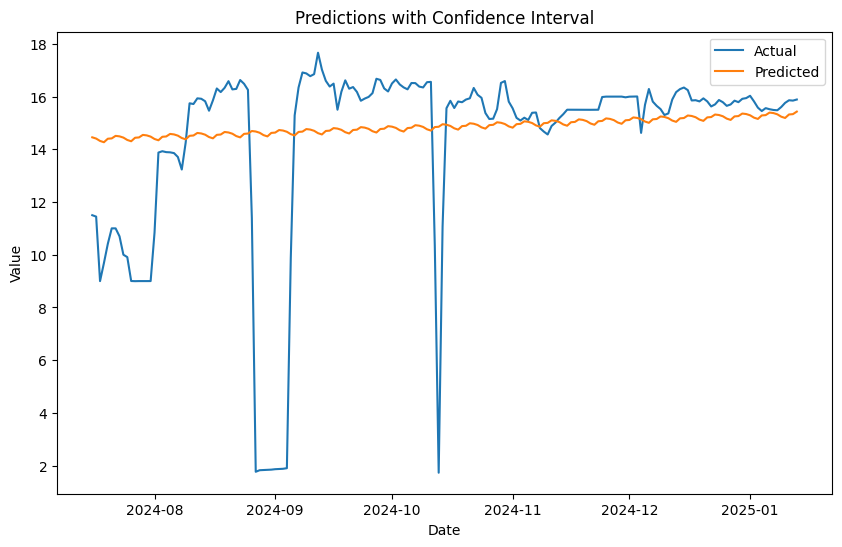

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(final_forecast['ds'][-len(testDf):],final_forecast['yhat'][-len(testDf):], label='Predicted')
#plt.fill_between(test.index, conx`fint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
m = Prophet()
m.fit(trainDf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/506andnz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v3wkzs0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94278', 'data', 'file=/tmp/tmpp90twyik/506andnz.json', 'init=/tmp/tmpp90twyik/v3wkzs0l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbywzfjam/prophet_model-20250124131404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
futtureDf=pd.DataFrame()
futtureDf['ds']=testDf['ds']

In [ ]:
forecast = m.predict(futtureDf)

In [ ]:
rmse = np.sqrt(mean_squared_error(testDf['y'], forecast['yhat']))
mae = mean_absolute_error(testDf['y'], forecast['yhat'])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 4.63382008422934
MAE: 3.0897853520343888


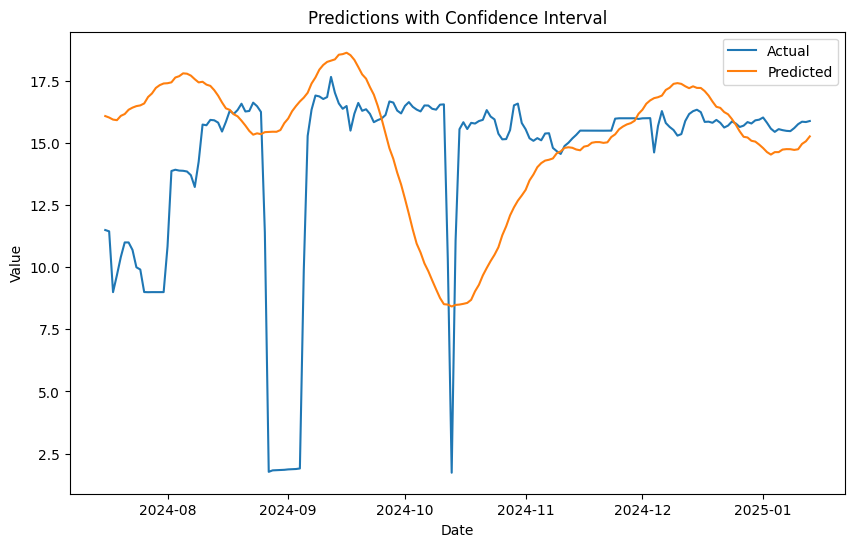

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(forecast['ds'],forecast['yhat'], label='Predicted')
#plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Training With Seasonal Decomposition

#### Seasonal Decomposition

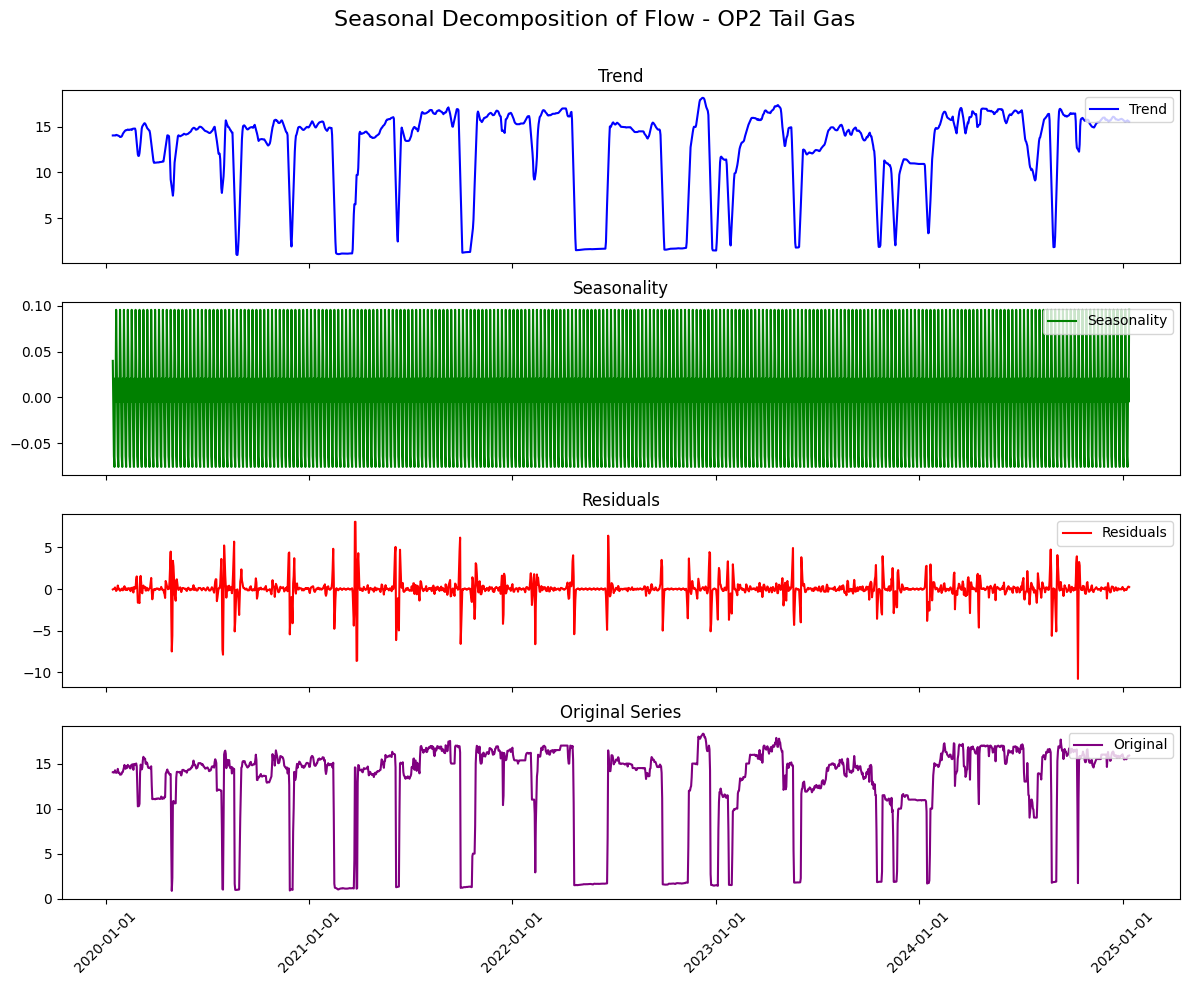

In [ ]:
result=seasonal_decompose_plot('Flow - OP2 Tail Gas')

In [ ]:
decomposed = df['Flow - OP2 Tail Gas']-result.trend - result.seasonal

In [ ]:
decomposed.index=df.index

In [ ]:
# Train Test Split
train = decomposed.iloc[:-int(len(decomposed) * 0.1)]
test = decomposed.iloc[-int(len(decomposed) * 0.1):]

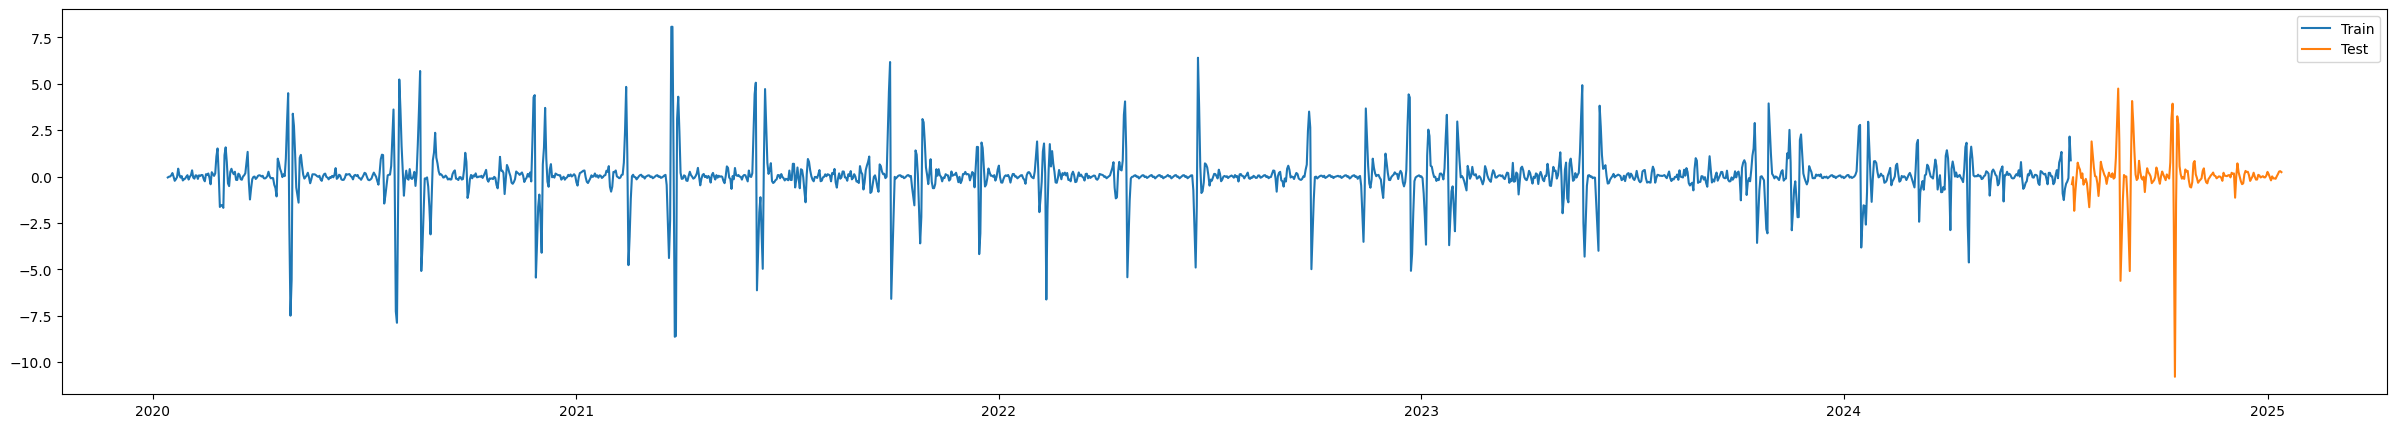

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.show()

#### ADF Test

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(decomposed.values)
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print("*"*20)

ADF Statistic: -14.79015522956205
p-value: 2.1774846186354505e-27
********************


#### Plot PACF and ACF

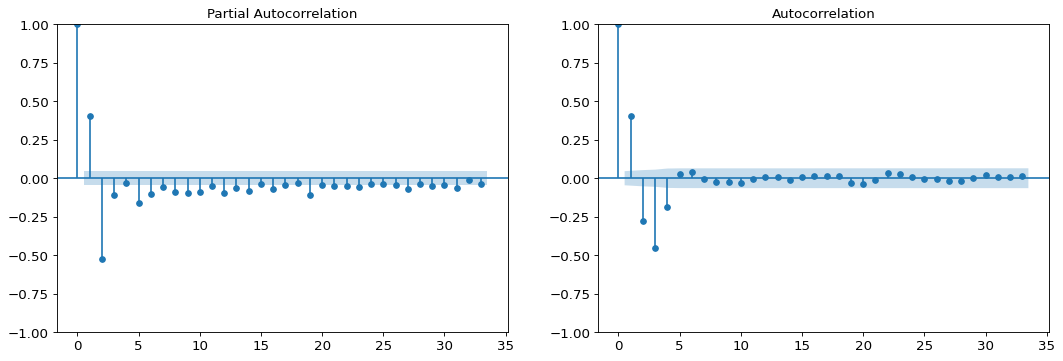

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_pacf(decomposed.values, method='ywm' ,ax=ax1)  # Specify the axis for PACF
plot_acf(decomposed, ax=ax2)  # Specify the axis for ACF
ax2.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='both', labelsize=12)
plt.show()

P Value is less than 0.05 and ADF statistic show a greater negative value so series is stationary

### Training and Testing

#### ARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=False,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=1, # minimum p and q
                      max_p=5, max_q=5, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      max_order=None,
                      error_action='ignore',
                      scoring='mae',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5300.712, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4775.729, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4742.785, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=1.51 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=5.91 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=2.74 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5009.613, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4770.144, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.66 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=2.83 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=6.78 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4495.687, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4466.293, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Tim

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.3640245092393743
MAE: 0.5995207563125056


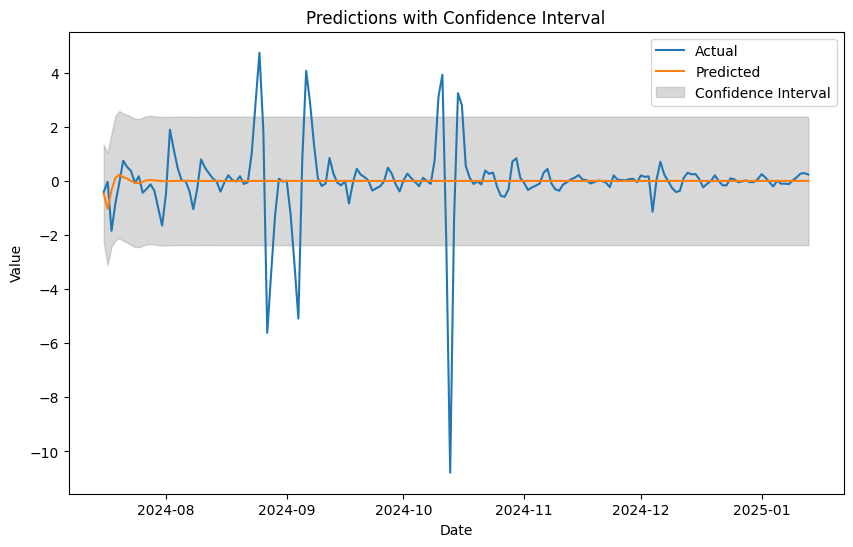

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### SARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=True,     # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0,
                      start_q=0,          # minimum p and q
                      max_p=3,
                      max_q=3,           # maximum p and q
                      D=None,                # let model determine 'D'
                      trace=True,
                      error_action='warn',  # change to 'warn' to see errors
                      suppress_warnings=True,
                      stepwise=False,        # change to False for exhaustive search
                      scoring='mae',
                      max_order=None,
                      # n_jobs=-1,  # Utilize all available CPU cores
                      with_intercept='auto'
                      )

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5302.709, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5303.310, Time=0.40 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=5303.415, Time=0.92 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=5303.401, Time=0.27 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=5302.182, Time=1.22 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=5303.754, Time=5.76 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=5303.705, Time=0.52 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=5303.738, Time=2.08 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=5305.586, Time=4.68 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=4777.728, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4778.508, Time=0.62 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=4777.297, Time=1.12 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=4778.613, Time=0.58 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=4776.190, Time=4.12 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=4777.436, Time=3.53 sec
 ARIMA(0,0

In [ ]:
print(model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1645
Model:             SARIMAX(3, 0, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -2109.484
Date:                                Fri, 24 Jan 2025   AIC                           4238.969
Time:                                        13:32:32   BIC                           4293.024
Sample:                                    01-14-2020   HQIC                          4259.013
                                         - 07-15-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     1.6e-06      0.001      0.002      0.998      -0.002       0.002
ar.

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)

In [ ]:
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.3650057066272039
MAE: 0.6000112834303776


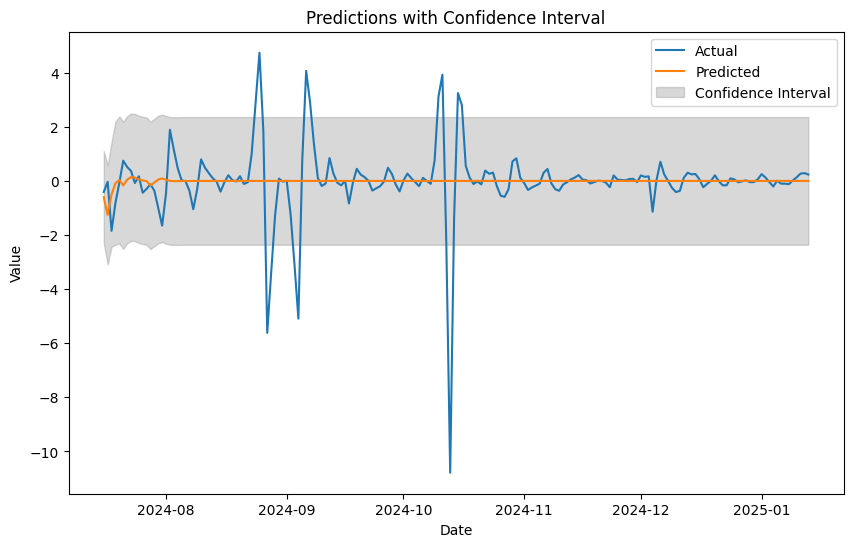

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#### Prophet

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
len(trainDf)

1645

In [ ]:
testDf=pd.DataFrame()
testDf['ds']=test.index
testDf['y']=test.values


In [ ]:
len(testDf)

182

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import itertools

In [ ]:
# }
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]


In [ ]:
best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet(**params)
    trainDf['cap'] = 1.2 * trainDf['y'].max()
    model.fit(trainDf)

    future = model.make_future_dataframe(periods=len(testDf))
    future['cap'] = 1.2 * trainDf['y'].max()
    forecast = model.predict(future)
    rmse = np.sqrt(mean_squared_error(testDf['y'], forecast['yhat'][-len(testDf):]))

    print(f"Parameters: {params}, RMSE: {rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print(f'Best RMSE: {rmse}')
print(f'Best Parameters: {best_params}')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/46894bib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v_8fahk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53762', 'data', 'file=/tmp/tmpp90twyik/46894bib.json', 'init=/tmp/tmpp90twyik/v_8fahk3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelua7g7m3d/prophet_model-20250124133233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1ku206ht.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3686485290378354


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/29zi9loh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91040', 'data', 'file=/tmp/tmpp90twyik/1ku206ht.json', 'init=/tmp/tmpp90twyik/29zi9loh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3263hk8o/prophet_model-20250124133234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pq81zp1a.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3686910666339893


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6l5mlpyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24020', 'data', 'file=/tmp/tmpp90twyik/pq81zp1a.json', 'init=/tmp/tmpp90twyik/6l5mlpyk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb966y6hv/prophet_model-20250124133235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3636104033655359


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0d0pfnt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e9q9y38r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4953', 'data', 'file=/tmp/tmpp90twyik/0d0pfnt7.json', 'init=/tmp/tmpp90twyik/e9q9y38r.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhcfqvshu/prophet_model-20250124133235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j31jta8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2zl9na7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3636373971716949


13:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3jpl7mwt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e09lluqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67583', 'data', 'file=/tmp/tmpp90twyik/3jpl7mwt.json', 'init=/tmp/tmpp90twyik/e09lluqf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqfm8u7a4/prophet_model-20250124133237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3695736367853935


13:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hxsw56ps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hvglqg7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12598', 'data', 'file=/tmp/tmpp90twyik/hxsw56ps.json', 'init=/tmp/tmpp90twyik/hvglqg7l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelov6g53lx/prophet_model-20250124133238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3695901593389181


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cjjwkwap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/niw3i4j_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9932', 'data', 'file=/tmp/tmpp90twyik/cjjwkwap.json', 'init=/tmp/tmpp90twyik/niw3i4j_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model143ml24g/prophet_model-20250124133238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3645749397429452


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/andaf346.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j6zgw8qs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63019', 'data', 'file=/tmp/tmpp90twyik/andaf346.json', 'init=/tmp/tmpp90twyik/j6zgw8qs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt_truce0/prophet_model-20250124133239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


13:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5qbcwjq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n66sga53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28613', 'data', 'file=/tmp/tmpp90twyik/5qbcwjq4.json', 'init=/tmp/tmpp90twyik/n66sga53.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelissm_x62/prophet_model-20250124133239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3686179939138947


13:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s41zda2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uq8exrcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40795', 'data', 'file=/tmp/tmpp90twyik/s41zda2y.json', 'init=/tmp/tmpp90twyik/uq8exrcm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv3pdpkwp/prophet_model-20250124133240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3686377891015618


13:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mks49auk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jfqt8207.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99142', 'data', 'file=/tmp/tmpp90twyik/mks49auk.json', 'init=/tmp/tmpp90twyik/jfqt8207.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmm2i58cx/prophet_model-20250124133240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3636517500389465


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hp61mm7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i3lbk97u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7328', 'data', 'file=/tmp/tmpp90twyik/hp61mm7z.json', 'init=/tmp/tmpp90twyik/i3lbk97u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_stkxvnl/prophet_model-20250124133241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3636383457727548


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lfvr19mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m1y0uwb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42549', 'data', 'file=/tmp/tmpp90twyik/lfvr19mc.json', 'init=/tmp/tmpp90twyik/m1y0uwb7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0dwplas5/prophet_model-20250124133241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3696120609768976


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rd4idi90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gavahfp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78737', 'data', 'file=/tmp/tmpp90twyik/rd4idi90.json', 'init=/tmp/tmpp90twyik/gavahfp1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxj9_sn4b/prophet_model-20250124133242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3696929338369228


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jh3flkyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n2jml5uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67863', 'data', 'file=/tmp/tmpp90twyik/jh3flkyk.json', 'init=/tmp/tmpp90twyik/n2jml5uz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld08o83kb/prophet_model-20250124133242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3645841926611526


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vvj2068a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xo56fmg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6202', 'data', 'file=/tmp/tmpp90twyik/vvj2068a.json', 'init=/tmp/tmpp90twyik/xo56fmg9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelke_39plx/prophet_model-20250124133243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


13:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wb6mzftx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m9td94t0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78624', 'data', 'file=/tmp/tmpp90twyik/wb6mzftx.json', 'init=/tmp/tmpp90twyik/m9td94t0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_b8m1n8b/prophet_model-20250124133243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.368651714493582


13:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qo0gyfqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r2mfpwyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22148', 'data', 'file=/tmp/tmpp90twyik/qo0gyfqy.json', 'init=/tmp/tmpp90twyik/r2mfpwyc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelae2e3mux/prophet_model-20250124133244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3687237060223578


13:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ajyn0xku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6uvnu4m2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5182', 'data', 'file=/tmp/tmpp90twyik/ajyn0xku.json', 'init=/tmp/tmpp90twyik/6uvnu4m2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnbhnb_gm/prophet_model-20250124133245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3636828445338258


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fx40c97d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/729ilyah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42127', 'data', 'file=/tmp/tmpp90twyik/fx40c97d.json', 'init=/tmp/tmpp90twyik/729ilyah.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt9haw190/prophet_model-20250124133245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.363668080219625


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tb8nlmr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cnrr_qu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82511', 'data', 'file=/tmp/tmpp90twyik/tb8nlmr9.json', 'init=/tmp/tmpp90twyik/cnrr_qu3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8t5qhofk/prophet_model-20250124133246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.36968329229034


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7_sd4igs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gwelekfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74070', 'data', 'file=/tmp/tmpp90twyik/7_sd4igs.json', 'init=/tmp/tmpp90twyik/gwelekfq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelycxxpibt/prophet_model-20250124133246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3695851716351406


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8g8sulp2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8dx951h3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37850', 'data', 'file=/tmp/tmpp90twyik/8g8sulp2.json', 'init=/tmp/tmpp90twyik/8dx951h3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldiquxaoq/prophet_model-20250124133247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3646718629710477


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3e4rv9t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2bd8qfl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2261', 'data', 'file=/tmp/tmpp90twyik/3e4rv9t8.json', 'init=/tmp/tmpp90twyik/2bd8qfl2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln11jdowh/prophet_model-20250124133247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


13:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dnefxx99.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3708611884478512


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h5hmgx77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75686', 'data', 'file=/tmp/tmpp90twyik/dnefxx99.json', 'init=/tmp/tmpp90twyik/h5hmgx77.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw_iflnp0/prophet_model-20250124133250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n4fxxwdw.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.371532708823802


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5l7820do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88320', 'data', 'file=/tmp/tmpp90twyik/n4fxxwdw.json', 'init=/tmp/tmpp90twyik/5l7820do.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnurdolms/prophet_model-20250124133252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cxpual12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8p1e2_0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.364173522227696


13:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9dk_y5mn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2b0jv40j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91727', 'data', 'file=/tmp/tmpp90twyik/9dk_y5mn.json', 'init=/tmp/tmpp90twyik/2b0jv40j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhhjqy27l/prophet_model-20250124133255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3665936702550578


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e27x2suy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/65laitk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68442', 'data', 'file=/tmp/tmpp90twyik/e27x2suy.json', 'init=/tmp/tmpp90twyik/65laitk2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6rg7jrpp/prophet_model-20250124133257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3767707886643241


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ev_4qtr9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ecu7eti0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94026', 'data', 'file=/tmp/tmpp90twyik/ev_4qtr9.json', 'init=/tmp/tmpp90twyik/ecu7eti0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldzhu6sao/prophet_model-20250124133259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3744834734192841


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ml5_8b_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a5d8tf94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56694', 'data', 'file=/tmp/tmpp90twyik/ml5_8b_3.json', 'init=/tmp/tmpp90twyik/a5d8tf94.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellfdycl5m/prophet_model-20250124133300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3703291137760392


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t93kfggd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0su0zw7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86006', 'data', 'file=/tmp/tmpp90twyik/t93kfggd.json', 'init=/tmp/tmpp90twyik/0su0zw7f.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models4dhreyv/prophet_model-20250124133301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317


13:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ojlht_50.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3785749918422108


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gh11vemr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57369', 'data', 'file=/tmp/tmpp90twyik/ojlht_50.json', 'init=/tmp/tmpp90twyik/gh11vemr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo117c8t6/prophet_model-20250124133303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9lh8rsa8.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.373704274780132


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7md06831.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10670', 'data', 'file=/tmp/tmpp90twyik/9lh8rsa8.json', 'init=/tmp/tmpp90twyik/7md06831.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpj9bq809/prophet_model-20250124133306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1c4i9ko_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_j5uv0sr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3696706665572032


13:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t_0uaq2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xpa7q4v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91772', 'data', 'file=/tmp/tmpp90twyik/t_0uaq2b.json', 'init=/tmp/tmpp90twyik/xpa7q4v1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh_47ci2s/prophet_model-20250124133309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.367185666754625


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zusicanh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/43xp0t8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89409', 'data', 'file=/tmp/tmpp90twyik/zusicanh.json', 'init=/tmp/tmpp90twyik/43xp0t8c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloj0ucow6/prophet_model-20250124133310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3883122467537272


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qzb868ts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1_9y8_71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47501', 'data', 'file=/tmp/tmpp90twyik/qzb868ts.json', 'init=/tmp/tmpp90twyik/1_9y8_71.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelchi7jiw0/prophet_model-20250124133312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3744206483753398


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4c_orv30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s9fssp8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98479', 'data', 'file=/tmp/tmpp90twyik/4c_orv30.json', 'init=/tmp/tmpp90twyik/s9fssp8t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfpag1kkg/prophet_model-20250124133313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3707982811977224


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/et_gntgf.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uy1w6gtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57417', 'data', 'file=/tmp/tmpp90twyik/et_gntgf.json', 'init=/tmp/tmpp90twyik/uy1w6gtp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2ghfgke3/prophet_model-20250124133315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qbomeuhq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cmq_z5ft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3889105173725096


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pntg15xl.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3735452800018264


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kojja85c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86667', 'data', 'file=/tmp/tmpp90twyik/pntg15xl.json', 'init=/tmp/tmpp90twyik/kojja85c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfdij3w3s/prophet_model-20250124133318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/djc6w48g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tuyz0z1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3718149725191244


13:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qb2lb190.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eqgatnc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43133', 'data', 'file=/tmp/tmpp90twyik/qb2lb190.json', 'init=/tmp/tmpp90twyik/eqgatnc9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model04boqfw9/prophet_model-20250124133322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3672658512272178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/19mm53x6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lor5turf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92611', 'data', 'file=/tmp/tmpp90twyik/19mm53x6.json', 'init=/tmp/tmpp90twyik/lor5turf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljxvxzdm9/prophet_model-20250124133324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.385303408849774


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zt_5qi3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rxs03mag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91925', 'data', 'file=/tmp/tmpp90twyik/zt_5qi3s.json', 'init=/tmp/tmpp90twyik/rxs03mag.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp7q43hwn/prophet_model-20250124133325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.374543019639792


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vj5qht70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nnz07x50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58089', 'data', 'file=/tmp/tmpp90twyik/vj5qht70.json', 'init=/tmp/tmpp90twyik/nnz07x50.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmug8cklz/prophet_model-20250124133327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.369959539978511


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ivj338gp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q0srwntb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72029', 'data', 'file=/tmp/tmpp90twyik/ivj338gp.json', 'init=/tmp/tmpp90twyik/q0srwntb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcor8w9zx/prophet_model-20250124133328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317


13:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pk3apcvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a555upxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54499', 'data', 'file=/tmp/tmpp90twyik/pk3apcvt.json', 'init=/tmp/tmpp90twyik/a555upxw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7v4pkkv8/prophet_model-20250124133329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3645774004114037


13:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fmzc9s75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tn3cym22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11704', 'data', 'file=/tmp/tmpp90twyik/fmzc9s75.json', 'init=/tmp/tmpp90twyik/tn3cym22.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6frqrudb/prophet_model-20250124133329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3645991418253662


13:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0lvenqg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/glkclgtl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49087', 'data', 'file=/tmp/tmpp90twyik/0lvenqg7.json', 'init=/tmp/tmpp90twyik/glkclgtl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model36b84388/prophet_model-20250124133330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3645614418281893


13:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_fkob7wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yomm736h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76196', 'data', 'file=/tmp/tmpp90twyik/_fkob7wo.json', 'init=/tmp/tmpp90twyik/yomm736h.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt8qt6q93/prophet_model-20250124133330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646057844160477


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kwh9c68s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8idth711.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57613', 'data', 'file=/tmp/tmpp90twyik/kwh9c68s.json', 'init=/tmp/tmpp90twyik/8idth711.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1vtj99sm/prophet_model-20250124133331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.364598677110729


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0bg6xam7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5nhnhgk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56586', 'data', 'file=/tmp/tmpp90twyik/0bg6xam7.json', 'init=/tmp/tmpp90twyik/5nhnhgk2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli1at3y80/prophet_model-20250124133331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3646047438033522


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0fs8l6_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ics1bg8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25029', 'data', 'file=/tmp/tmpp90twyik/0fs8l6_k.json', 'init=/tmp/tmpp90twyik/ics1bg8a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5l7n_zd2/prophet_model-20250124133332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3645791661165365


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/id5cupuy.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j8nd7ynd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98960', 'data', 'file=/tmp/tmpp90twyik/id5cupuy.json', 'init=/tmp/tmpp90twyik/j8nd7ynd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb4q4tep_/prophet_model-20250124133333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6avlj1zj.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3646625758059283


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/debe7msu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48385', 'data', 'file=/tmp/tmpp90twyik/6avlj1zj.json', 'init=/tmp/tmpp90twyik/debe7msu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model208wpxf4/prophet_model-20250124133333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ae4xwa0g.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.364611311067587


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o6vjt1x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32900', 'data', 'file=/tmp/tmpp90twyik/ae4xwa0g.json', 'init=/tmp/tmpp90twyik/o6vjt1x9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm7j5xloj/prophet_model-20250124133334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s7zihkr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s4t0khwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3646401740342837


13:33:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oleaj_1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y07ehb3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46312', 'data', 'file=/tmp/tmpp90twyik/oleaj_1u.json', 'init=/tmp/tmpp90twyik/y07ehb3t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj32ce97s/prophet_model-20250124133336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3645786927098333


13:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/86aq5snu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pr9m2aos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41945', 'data', 'file=/tmp/tmpp90twyik/86aq5snu.json', 'init=/tmp/tmpp90twyik/pr9m2aos.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelncqw4n5m/prophet_model-20250124133336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3645879273665023


13:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i8ikj9ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qt89gywe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74182', 'data', 'file=/tmp/tmpp90twyik/i8ikj9ct.json', 'init=/tmp/tmpp90twyik/qt89gywe.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljnc2x98x/prophet_model-20250124133337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3645845183041374


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c6nt0ow1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pu9nryqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49378', 'data', 'file=/tmp/tmpp90twyik/c6nt0ow1.json', 'init=/tmp/tmpp90twyik/pu9nryqw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmi5cgmxr/prophet_model-20250124133337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3646275051435297


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8ybe802s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/25i8y8vx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70280', 'data', 'file=/tmp/tmpp90twyik/8ybe802s.json', 'init=/tmp/tmpp90twyik/25i8y8vx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvpop78cu/prophet_model-20250124133338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


13:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/juw_en3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6o1vgaf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92748', 'data', 'file=/tmp/tmpp90twyik/juw_en3f.json', 'init=/tmp/tmpp90twyik/6o1vgaf2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models37a_go7/prophet_model-20250124133339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.364590719790392


13:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wsxb6he2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6wj8qlwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64277', 'data', 'file=/tmp/tmpp90twyik/wsxb6he2.json', 'init=/tmp/tmpp90twyik/6wj8qlwt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2uu10zeq/prophet_model-20250124133339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.364615479053736


13:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mzuckh60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3uwfeww3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38920', 'data', 'file=/tmp/tmpp90twyik/mzuckh60.json', 'init=/tmp/tmpp90twyik/3uwfeww3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modela6tw578m/prophet_model-20250124133340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.364595934614434


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/so6n513v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xll0xim5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91263', 'data', 'file=/tmp/tmpp90twyik/so6n513v.json', 'init=/tmp/tmpp90twyik/xll0xim5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvxepn1yj/prophet_model-20250124133340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646004485626866


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ej081ttg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/en7iasvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65832', 'data', 'file=/tmp/tmpp90twyik/ej081ttg.json', 'init=/tmp/tmpp90twyik/en7iasvc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxvo6og5x/prophet_model-20250124133341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3646664043997339


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qm8vzs8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j3j07iks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72915', 'data', 'file=/tmp/tmpp90twyik/qm8vzs8t.json', 'init=/tmp/tmpp90twyik/j3j07iks.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpvpaiet6/prophet_model-20250124133341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3645630580734134


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4q_11yhi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l5btoy1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69428', 'data', 'file=/tmp/tmpp90twyik/4q_11yhi.json', 'init=/tmp/tmpp90twyik/l5btoy1g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelszcrwqio/prophet_model-20250124133342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3646090633783565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u00v4y4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7ee7lu26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56836', 'data', 'file=/tmp/tmpp90twyik/u00v4y4p.json', 'init=/tmp/tmpp90twyik/7ee7lu26.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldgw5zw8b/prophet_model-20250124133342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3646165623207263


13:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xurs696c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lef74tbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25780', 'data', 'file=/tmp/tmpp90twyik/xurs696c.json', 'init=/tmp/tmpp90twyik/lef74tbi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnryhcjjj/prophet_model-20250124133344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3749192198972189


13:33:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bif1c8ix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gin0ko5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9652', 'data', 'file=/tmp/tmpp90twyik/bif1c8ix.json', 'init=/tmp/tmpp90twyik/gin0ko5t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldv3wt82i/prophet_model-20250124133345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3680265281225348


13:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jmg8f8dq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5iengfig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49105', 'data', 'file=/tmp/tmpp90twyik/jmg8f8dq.json', 'init=/tmp/tmpp90twyik/5iengfig.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt_rb4ia9/prophet_model-20250124133347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3744158801704645


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/us17mbou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/btizcgwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8792', 'data', 'file=/tmp/tmpp90twyik/us17mbou.json', 'init=/tmp/tmpp90twyik/btizcgwk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_k1dav31/prophet_model-20250124133349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3678322821086057


13:33:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i_j0p_b1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qy8rqr5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81456', 'data', 'file=/tmp/tmpp90twyik/i_j0p_b1.json', 'init=/tmp/tmpp90twyik/qy8rqr5h.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp66tg8ml/prophet_model-20250124133351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3740681723892603


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kvhrcrgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sic_ssvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73946', 'data', 'file=/tmp/tmpp90twyik/kvhrcrgk.json', 'init=/tmp/tmpp90twyik/sic_ssvk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqwo0r_gu/prophet_model-20250124133353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3677830703643825


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fzdrmw0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8pc3pgja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41502', 'data', 'file=/tmp/tmpp90twyik/fzdrmw0y.json', 'init=/tmp/tmpp90twyik/8pc3pgja.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldtwsyevz/prophet_model-20250124133354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3739643936810677


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bn_9a6ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jc4nk96o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83148', 'data', 'file=/tmp/tmpp90twyik/bn_9a6ng.json', 'init=/tmp/tmpp90twyik/jc4nk96o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsek09y0u/prophet_model-20250124133356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317


13:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/abp68q5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ap4rdb2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83315', 'data', 'file=/tmp/tmpp90twyik/abp68q5e.json', 'init=/tmp/tmpp90twyik/ap4rdb2u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvioz6ps3/prophet_model-20250124133357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3661655696467048


13:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wq5i83dn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qnsf3z78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67667', 'data', 'file=/tmp/tmpp90twyik/wq5i83dn.json', 'init=/tmp/tmpp90twyik/qnsf3z78.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz27tzz9p/prophet_model-20250124133358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3680636600740086


13:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s_sdma8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yx35yy3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98363', 'data', 'file=/tmp/tmpp90twyik/s_sdma8z.json', 'init=/tmp/tmpp90twyik/yx35yy3k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvhlb3a1s/prophet_model-20250124133400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3658578509359864


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ieysj5fy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6lc8cluh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70884', 'data', 'file=/tmp/tmpp90twyik/ieysj5fy.json', 'init=/tmp/tmpp90twyik/6lc8cluh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9gg8wxus/prophet_model-20250124133401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3678195052252715


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sme2kd1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3_m5d3l5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8282', 'data', 'file=/tmp/tmpp90twyik/sme2kd1w.json', 'init=/tmp/tmpp90twyik/3_m5d3l5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgajcxda9/prophet_model-20250124133403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3659840572578406


13:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nfzik1jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zkmlfdz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52690', 'data', 'file=/tmp/tmpp90twyik/nfzik1jx.json', 'init=/tmp/tmpp90twyik/zkmlfdz8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzq16jkma/prophet_model-20250124133405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3677894708964158


13:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h1zfnrxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4aahmmkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63285', 'data', 'file=/tmp/tmpp90twyik/h1zfnrxj.json', 'init=/tmp/tmpp90twyik/4aahmmkt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1zbtwefs/prophet_model-20250124133407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3654742501474884


13:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8pguguns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i_knmfup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26815', 'data', 'file=/tmp/tmpp90twyik/8pguguns.json', 'init=/tmp/tmpp90twyik/i_knmfup.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgtclwgo_/prophet_model-20250124133409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317


13:34:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nfi46ol8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jre3zss2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62653', 'data', 'file=/tmp/tmpp90twyik/nfi46ol8.json', 'init=/tmp/tmpp90twyik/jre3zss2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelr5it968q/prophet_model-20250124133410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3661467278978956


13:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/iaoif6a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i3h3itu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14215', 'data', 'file=/tmp/tmpp90twyik/iaoif6a7.json', 'init=/tmp/tmpp90twyik/i3h3itu4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1u3yta4c/prophet_model-20250124133412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.3680745626907416


13:34:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/iprmkedu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nr3fyqlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44964', 'data', 'file=/tmp/tmpp90twyik/iprmkedu.json', 'init=/tmp/tmpp90twyik/nr3fyqlt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelg3cmul2e/prophet_model-20250124133413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3656504922317982


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jqna24kx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rf3yxsds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35598', 'data', 'file=/tmp/tmpp90twyik/jqna24kx.json', 'init=/tmp/tmpp90twyik/rf3yxsds.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqlwk3jia/prophet_model-20250124133415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.367827956844088


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_ygkkz6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aoe7ph5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97543', 'data', 'file=/tmp/tmpp90twyik/_ygkkz6c.json', 'init=/tmp/tmpp90twyik/aoe7ph5x.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellqw7726a/prophet_model-20250124133416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True}, RMSE: 1.3657919547689836


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v_ciw1ib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4nnet3ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40019', 'data', 'file=/tmp/tmpp90twyik/v_ciw1ib.json', 'init=/tmp/tmpp90twyik/4nnet3ty.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli65a7ptt/prophet_model-20250124133418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}, RMSE: 1.367794487065252


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9s8yy01_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y6hn7d8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14538', 'data', 'file=/tmp/tmpp90twyik/9s8yy01_.json', 'init=/tmp/tmpp90twyik/y6hn7d8a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliyhb5jlt/prophet_model-20250124133420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True}, RMSE: 1.3654276263498664
Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False}, RMSE: 1.3673823841427317
Best RMSE: 1.3673823841427317
Best Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}


In [ ]:
best_params

{'seasonality_mode': 'additive',
 'growth': 'linear',
 'seasonality_prior_scale': 0.1,
 'yearly_seasonality': True,
 'weekly_seasonality': False,
 'daily_seasonality': True}

In [ ]:
final_model = Prophet(**best_params)
final_model.fit(trainDf)

# Forecasting with the final model
final_future = final_model.make_future_dataframe(periods=len(testDf))
final_forecast = final_model.predict(final_future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jhej21os.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/anmtcsf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74631', 'data', 'file=/tmp/tmpp90twyik/jhej21os.json', 'init=/tmp/tmpp90twyik/anmtcsf2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8ctslrl_/prophet_model-20250124133422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# m = Prophet(growth='logistic',cap=)
# m.fit(trainDf)

In [ ]:
# futtureDf=pd.DataFrame()
# futtureDf['ds']=testDf['ds']

In [ ]:
# forecast = m.predict(futtureDf)

In [ ]:
final_forecast[-len(testDf):].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1645,2024-07-16,-0.029553,-1.512854,1.677928,-0.029553,-0.029553,0.030573,0.030573,0.030573,0.037314,0.037314,0.037314,-0.006741,-0.006741,-0.006741,0.0,0.0,0.0,0.001019
1646,2024-07-17,-0.029546,-1.550700,1.598881,-0.029546,-0.029546,0.027310,0.027310,0.027310,0.037314,0.037314,0.037314,-0.010004,-0.010004,-0.010004,0.0,0.0,0.0,-0.002235
1647,2024-07-18,-0.029538,-1.622836,1.570984,-0.029538,-0.029538,0.024868,0.024868,0.024868,0.037314,0.037314,0.037314,-0.012446,-0.012446,-0.012446,0.0,0.0,0.0,-0.004670
1648,2024-07-19,-0.029530,-1.549133,1.630330,-0.029530,-0.029530,0.023301,0.023301,0.023301,0.037314,0.037314,0.037314,-0.014013,-0.014013,-0.014013,0.0,0.0,0.0,-0.006229
1649,2024-07-20,-0.029522,-1.524523,1.498066,-0.029522,-0.029522,0.022641,0.022641,0.022641,0.037314,0.037314,0.037314,-0.014673,-0.014673,-0.014673,0.0,0.0,0.0,-0.006882


In [ ]:
testDf.head()

,ds,y
0,2024-07-16,-0.408105
1,2024-07-17,-0.031131
2,2024-07-18,-1.844872
3,2024-07-19,-0.816272
4,2024-07-20,-0.069828


In [ ]:
len(testDf)

182

In [ ]:
rmse = np.sqrt(mean_squared_error(testDf['y'], final_forecast['yhat'][-len(testDf):]))
mae = mean_absolute_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
mape = mean_absolute_percentage_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MAPE: 1.8458086775038034
RMSE: 1.3636104033655359
MAE: 0.6029877607002244


In [ ]:
testDf['yhat']=final_forecast['yhat'][-len(testDf):].values

In [ ]:
testDf

,ds,y,yhat
0,2024-07-16,-5.183189,0.014270
1,2024-07-17,-2.311694,0.014285
2,2024-07-18,-5.946893,0.014390
3,2024-07-19,2.788393,0.014871
4,2024-07-20,3.261286,0.014497
...,...,...,...
177,2025-01-09,-0.948212,0.015885
178,2025-01-10,-0.819524,0.016363
179,2025-01-11,0.840121,0.015884
180,2025-01-12,1.044780,0.015832


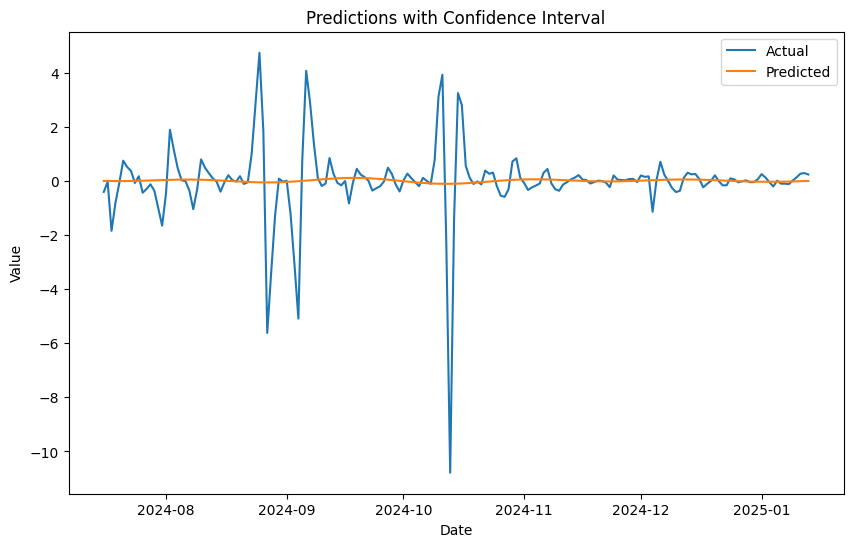

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(final_forecast['ds'][-len(testDf):],final_forecast['yhat'][-len(testDf):], label='Predicted')
#plt.fill_between(test.index, conx`fint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Training With Transformation

### Calculate Variance and Mean

In [ ]:
start_date = df.index.min()
end_date = df.index.max()

# Ensure the DataFrame is within the desired date range
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Resample data annually and calculate means and variances for each year
yearly_stats = {
    year: {
        'mean': df[df.index.year == year]['Flow - OP2 Tail Gas'].mean(),
        'variance': df[df.index.year == year]['Flow - OP2 Tail Gas'].var()
    }
    for year in range(start_date.year, end_date.year + 1)
}

# Accessing the means and variances
for year, stats in yearly_stats.items():
    print(f"Year: {year}, Mean: {stats['mean']}, Variance: {stats['variance']}")

Year: 2020, Mean: 13.265868717215296, Variance: 10.943208739307146
Year: 2021, Mean: 12.687374122572605, Variance: 31.92599638166749
Year: 2022, Mean: 10.953103620282192, Variance: 42.522404243067434
Year: 2023, Mean: 12.067642212550684, Variance: 17.878908981668523
Year: 2024, Mean: 14.679584542642075, Variance: 11.342470662639775
Year: 2025, Mean: 15.684708571538462, Variance: 0.036203858080016534


We will apply transformation to get consistency in Variance and Mean

#### Differencing

In [ ]:
df['Flow - OP2 Tail Gas_diff'] = np.sqrt(df['Flow - OP2 Tail Gas']).diff()

In [ ]:
start_date = df.index.min()
end_date = df.index.max()

# Ensure the DataFrame is within the desired date range
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Resample data annually and calculate means and variances for each year
yearly_stats = {
    year: {
        'mean': df[df.index.year == year]['Flow - OP2 Tail Gas_diff'].mean(),
        'variance': df[df.index.year == year]['Flow - OP2 Tail Gas_diff'].var()
    }
    for year in range(start_date.year, end_date.year + 1)
}

# Accessing the means and variances
for year, stats in yearly_stats.items():
    print(f"Year: {year}, Mean: {stats['mean']}, Variance: {stats['variance']}")

Year: 2020, Mean: 0.00032542864593615347, Variance: 0.10405585388063424
Year: 2021, Mean: 0.000593606713951562, Variance: 0.11867866827625996
Year: 2022, Mean: -0.007836209181592715, Variance: 0.06675572353202706
Year: 2023, Mean: 0.005718120966261707, Variance: 0.06568139301771066
Year: 2024, Mean: 0.001879809674061147, Variance: 0.06964377223267297
Year: 2025, Mean: -0.000518542240355097, Variance: 0.00025413073104383856


#### ADF Test

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['Flow - OP2 Tail Gas_diff'][2:])
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print("*"*20)

ADF Statistic: -15.831799819092673
p-value: 9.923366500611472e-29
********************


#### Plot PACF and ACF

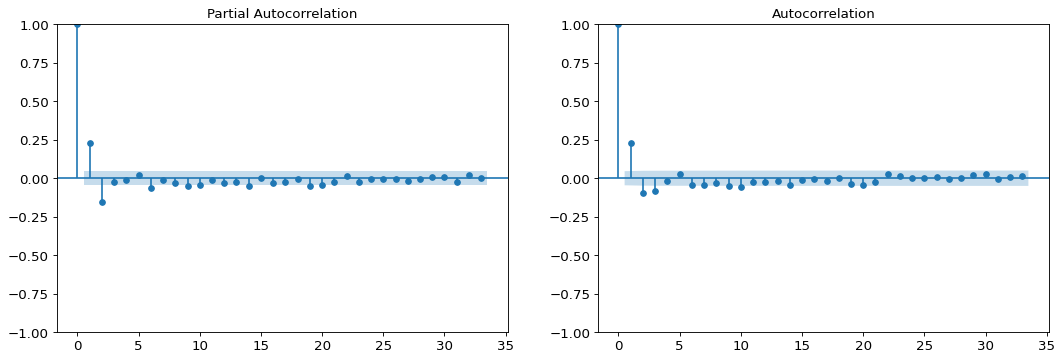

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_pacf(df['Flow - OP2 Tail Gas_diff'][2:], method='ywm' ,ax=ax1)  # Specify the axis for PACF
plot_acf(df['Flow - OP2 Tail Gas_diff'][2:], ax=ax2)  # Specify the axis for ACF
ax2.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='both', labelsize=12)
plt.show()


P value is less than 0.05 so data is stationary

##### Training with differencing

In [ ]:
# Train Test Split
train = df['Flow - OP2 Tail Gas_diff'].iloc[:-int(len(df['Flow - OP2 Tail Gas_diff']) * 0.1)]
test = df['Flow - OP2 Tail Gas_diff'].iloc[-int(len(df['Flow - OP2 Tail Gas_diff']) * 0.1):]

In [ ]:
train=train[2:]

###### ARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=False,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=1, # minimum p and q
                      max_p=2, max_q=2, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      max_order=None,
                      error_action='ignore',
                      scoring='mae',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=564.250, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=436.392, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=433.054, Time=4.35 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=464.382, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=434.799, Time=0.80 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=2.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=423.742, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=424.657, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=426.611, Time=3.53 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 12.224 seconds


In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.3136820324213726
MAE: 0.09187025713486491


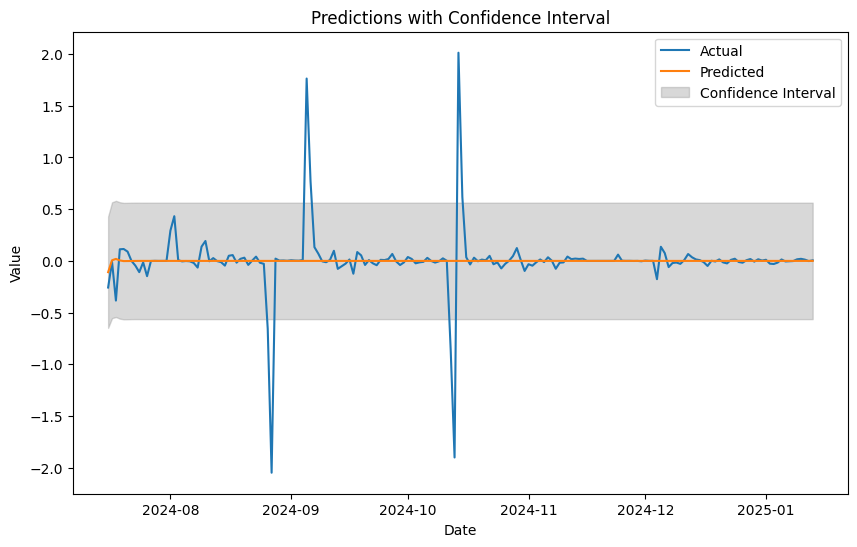

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

###### SARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=True,     # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0,
                      start_q=0,          # minimum p and q
                      max_p=2,
                      max_q=2,           # maximum p and q
                      D=None,                # let model determine 'D'
                      trace=True,
                      error_action='warn',  # change to 'warn' to see errors
                      suppress_warnings=True,
                      stepwise=False,        # change to False for exhaustive search
                      scoring='mae',
                      max_order=None,
                      # n_jobs=-1,  # Utilize all available CPU cores
                      with_intercept='auto'
                      )

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=566.250, Time=0.28 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=563.623, Time=0.49 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=560.620, Time=1.32 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=564.129, Time=0.26 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=559.191, Time=4.68 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=560.844, Time=5.40 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=561.315, Time=1.14 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=560.851, Time=12.09 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=562.902, Time=5.76 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=438.392, Time=0.93 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=439.090, Time=2.95 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=436.597, Time=6.35 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=439.225, Time=1.08 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=435.929, Time=6.58 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=436.988, Time=10.50 sec
 ARIMA(0,0,1)(2,0,0)[7]

In [ ]:
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1643
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 7)   Log Likelihood                -194.706
Date:                           Fri, 24 Jan 2025   AIC                            405.412
Time:                                   13:48:20   BIC                            448.646
Sample:                               01-16-2020   HQIC                           421.445
                                    - 07-15-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.592e-06      0.000      0.015      0.988      -0.001       0.001
ar.L1          0.9139      0.054     16.997

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)

In [ ]:
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.31370046950485464
MAE: 0.09253772567362806


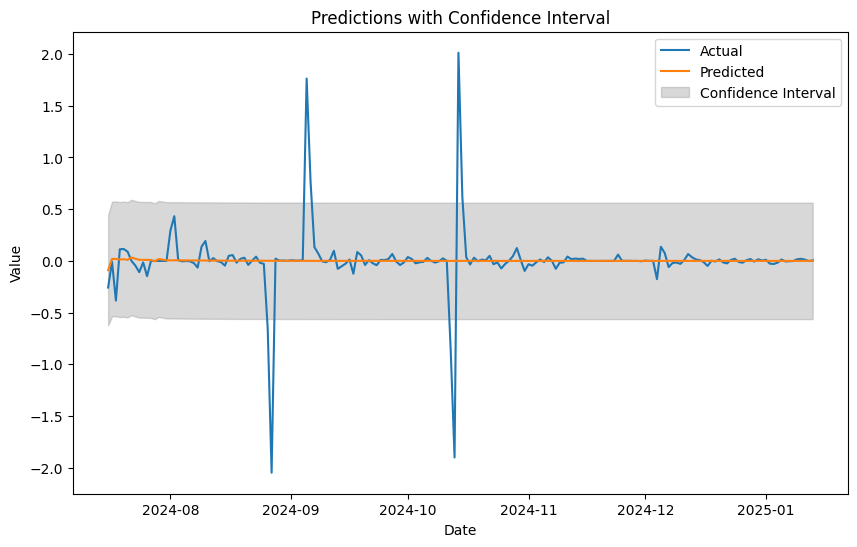

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

###### Prophet

In [ ]:
# Train Test Split
train = df['Flow - OP2 Tail Gas_diff'].iloc[:-int(len(df['Flow - OP2 Tail Gas_diff']) * 0.1)]
test = df['Flow - OP2 Tail Gas_diff'].iloc[-int(len(df['Flow - OP2 Tail Gas_diff']) * 0.1):]

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
param_grid = {
    # 'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    # 'holidays_prior_scale': [0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'interval_width': [0.8, 0.9, 0.95],
    # 'n_changepoints': [10, 25, 50],
    # 'changepoint_range': [0.8, 0.9, 1.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [ ]:
best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet(**params)
    trainDf['cap'] = 1.2 * trainDf['y'].max()
    model.fit(trainDf)

    future = model.make_future_dataframe(periods=len(testDf))
    future['cap'] = 1.2 * trainDf['y'].max()
    forecast = model.predict(future)
    rmse = np.sqrt(mean_squared_error(testDf['y'], forecast['yhat'][-len(testDf):]))



    # # Make future predictions (adjust periods as needed)
    # future = model.make_future_dataframe(periods=len(trainDf))
    # future['cap'] = 1.2 * trainDf['y'].max()
    # forecast = model.predict(future)

    # # Calculate MAPE or any other metric
    # # mape = mean_absolute_percentage_error(trainDf['y'], forecast['yhat'][:len(trainDf)])  # Adjust as necessary
    # rmse = np.sqrt(mean_squared_error(trainDf['y'], forecast['yhat'][:len(trainDf)]))

    print(f"Parameters: {params}, RMSE: {rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print(f'Best RMSE: {rmse}')
print(f'Best Parameters: {best_params}')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f37ig3r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mt3_u86v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36938', 'data', 'file=/tmp/tmpp90twyik/f37ig3r9.json', 'init=/tmp/tmpp90twyik/mt3_u86v.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj5une_tt/prophet_model-20250124140420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/utpyf9xk.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3654531492146194


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s270o0lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60053', 'data', 'file=/tmp/tmpp90twyik/utpyf9xk.json', 'init=/tmp/tmpp90twyik/s270o0lt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw9zt1z93/prophet_model-20250124140421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0308u7xu.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3654531492146194


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7o6m4gi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98918', 'data', 'file=/tmp/tmpp90twyik/0308u7xu.json', 'init=/tmp/tmpp90twyik/7o6m4gi3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcemqglnp/prophet_model-20250124140422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wd9o4jb1.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3654531492146194


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i57_omiz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39181', 'data', 'file=/tmp/tmpp90twyik/wd9o4jb1.json', 'init=/tmp/tmpp90twyik/i57_omiz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw3i4ydg_/prophet_model-20250124140423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c517gvp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9da6rrrb.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3654555721142636


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84924', 'data', 'file=/tmp/tmpp90twyik/c517gvp_.json', 'init=/tmp/tmpp90twyik/9da6rrrb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model75ytiq5s/prophet_model-20250124140424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ws5xsjls.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3654555721142636


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/69ug8j65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61605', 'data', 'file=/tmp/tmpp90twyik/ws5xsjls.json', 'init=/tmp/tmpp90twyik/69ug8j65.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2h4wyx3z/prophet_model-20250124140425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ry5joxmd.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3654555721142636


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/txs5ik_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66084', 'data', 'file=/tmp/tmpp90twyik/ry5joxmd.json', 'init=/tmp/tmpp90twyik/txs5ik_0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzr94imm2/prophet_model-20250124140426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3micwsx3.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3657367761136032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8qe1xrx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9539', 'data', 'file=/tmp/tmpp90twyik/3micwsx3.json', 'init=/tmp/tmpp90twyik/8qe1xrx4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_9q3zlg8/prophet_model-20250124140427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w01vvn15.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3657367761136032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8hy77hrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44518', 'data', 'file=/tmp/tmpp90twyik/w01vvn15.json', 'init=/tmp/tmpp90twyik/8hy77hrg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsxxy6jdm/prophet_model-20250124140427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jq1wy036.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/iygp0n1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3657367761136032


14:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dt62slu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qhm8zco5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31811', 'data', 'file=/tmp/tmpp90twyik/dt62slu0.json', 'init=/tmp/tmpp90twyik/qhm8zco5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm6dhyc9w/prophet_model-20250124140429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657415408478542


14:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7e0o3xy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p03_neq0.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657415408478542


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22579', 'data', 'file=/tmp/tmpp90twyik/7e0o3xy9.json', 'init=/tmp/tmpp90twyik/p03_neq0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzcorhapd/prophet_model-20250124140430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8_tldfo3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g8uu_zdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49578', 'data', 'file=/tmp/tmpp90twyik/8_t

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657415408478542


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/puwlkbp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8btfmnb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38786', 'data', 'file=/tmp/tmpp90twyik/puwlkbp5.json', 'init=/tmp/tmpp90twyik/8btfmnb0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model03nc0t1_/prophet_model-20250124140431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642313958540588


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_co5fgcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hmsqorck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21143', 'data', 'file=/tmp/tmpp90twyik/_co5fgcd.json', 'init=/tmp/tmpp90twyik/hmsqorck.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9l93uws7/prophet_model-20250124140432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642313958540588


14:04:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6lj4q_kr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dokcb9v0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52576', 'data', 'file=/tmp/tmpp90twyik/6lj4q_kr.json', 'init=/tmp/tmpp90twyik/dokcb9v0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1mg02om9/prophet_model-20250124140433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642313958540588


14:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a8q1w4yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kdl8ij5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90059', 'data', 'file=/tmp/tmpp90twyik/a8q1w4yc.json', 'init=/tmp/tmpp90twyik/kdl8ij5p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbv777u9e/prophet_model-20250124140433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642377980097102


14:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/07a647vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xwty1x44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35182', 'data', 'file=/tmp/tmpp90twyik/07a647vf.json', 'init=/tmp/tmpp90twyik/xwty1x44.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelaxrstrqv/prophet_model-20250124140434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642377980097102


14:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sv5tonph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q9zwnkjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45683', 'data', 'file=/tmp/tmpp90twyik/sv5tonph.json', 'init=/tmp/tmpp90twyik/q9zwnkjw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model50x0n8nk/prophet_model-20250124140435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642377980097102


14:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tiaksd5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2a2k7pex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85442', 'data', 'file=/tmp/tmpp90twyik/tiaksd5a.json', 'init=/tmp/tmpp90twyik/2a2k7pex.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzp2cqnyd/prophet_model-20250124140435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645137237415679


14:04:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645137237415679


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/857t5sbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jmzsp79e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68603', 'data', 'file=/tmp/tmpp90twyik/857t5sbu.json', 'init=/tmp/tmpp90twyik/jmzsp79e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model43z7x7bs/prophet_model-20250124140436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/suzayhr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dqn6fo6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645137237415679


14:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/db566l1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8y1mdruq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51967', 'data', 'file=/tmp/tmpp90twyik/db566l1o.json', 'init=/tmp/tmpp90twyik/8y1mdruq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelypoqt0mv/prophet_model-20250124140438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


14:04:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/flog4dd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0t4piyex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54953', 'data', 'file=/tmp/tmpp90twyik/flog4dd2.json', 'init=/tmp/tmpp90twyik/0t4piyex.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelstk60kkj/prophet_model-20250124140439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


14:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k4w4tv07.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3t5gj0ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78699', 'data', 'file=/tmp/tmpp90twyik/k4w4tv07.json', 'init=/tmp/tmpp90twyik/3t5gj0ht.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model341w5aei/prophet_model-20250124140440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ak6z6dg5.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3654586195861136


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ni5uv5sr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38453', 'data', 'file=/tmp/tmpp90twyik/ak6z6dg5.json', 'init=/tmp/tmpp90twyik/ni5uv5sr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5_v5w0io/prophet_model-20250124140441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aiapx6s4.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3654586195861136


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u2pzcs1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93920', 'data', 'file=/tmp/tmpp90twyik/aiapx6s4.json', 'init=/tmp/tmpp90twyik/u2pzcs1z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8xjjz2u8/prophet_model-20250124140441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4h0kv24n.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3654586195861136


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5i3jap8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16157', 'data', 'file=/tmp/tmpp90twyik/4h0kv24n.json', 'init=/tmp/tmpp90twyik/5i3jap8_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk990u3b3/prophet_model-20250124140442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k0ytustv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hib46icq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3654536853383683


14:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k8pehhlm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dornvi8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75753', 'data', 'file=/tmp/tmpp90twyik/k8pehhlm.json', 'init=/tmp/tmpp90twyik/dornvi8z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgcqp9s0v/prophet_model-20250124140444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3654536853383683


14:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e1l0qdg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pjrhc6p6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32351', 'data', 'file=/tmp/tmpp90twyik/e1l0qdg_.json', 'init=/tmp/tmpp90twyik/pjrhc6p6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeluvtgpe8t/prophet_model-20250124140444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3654536853383683


14:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mxlz09ft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bwuvcc34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41431', 'data', 'file=/tmp/tmpp90twyik/mxlz09ft.json', 'init=/tmp/tmpp90twyik/bwuvcc34.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1s9z0jp4/prophet_model-20250124140445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3657462815053985


14:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uidyl75k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_tl3hcv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90553', 'data', 'file=/tmp/tmpp90twyik/uidyl75k.json', 'init=/tmp/tmpp90twyik/_tl3hcv5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelr7_neyxb/prophet_model-20250124140445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3657462815053985


14:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tq2aumll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nbjj0f71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67467', 'data', 'file=/tmp/tmpp90twyik/tq2aumll.json', 'init=/tmp/tmpp90twyik/nbjj0f71.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelybyimyur/prophet_model-20250124140446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3657462815053985


14:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oetfcmlc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/th_25jh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7534', 'data', 'file=/tmp/tmpp90twyik/oetfcmlc.json', 'init=/tmp/tmpp90twyik/th_25jh3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modela2q7vgqq/prophet_model-20250124140447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657370566978355


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wbrv8qmy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0njxvkgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70739', 'data', 'file=/tmp/tmpp90twyik/wbrv8qmy.json', 'init=/tmp/tmpp90twyik/0njxvkgy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model102nzvxj/prophet_model-20250124140447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657370566978355


14:04:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_8o9chbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_fv1wm8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4348', 'data', 'file=/tmp/tmpp90twyik/_8o9chbw.json', 'init=/tmp/tmpp90twyik/_fv1wm8a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelltxml_gt/prophet_model-20250124140448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657370566978355


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qtsjf4nd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sfolxj8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89831', 'data', 'file=/tmp/tmpp90twyik/qtsjf4nd.json', 'init=/tmp/tmpp90twyik/sfolxj8p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8mwu38gy/prophet_model-20250124140448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642324241028791


14:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3t7x1eqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9ij87bu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22453', 'data', 'file=/tmp/tmpp90twyik/3t7x1eqg.json', 'init=/tmp/tmpp90twyik/9ij87bu1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc29a7x47/prophet_model-20250124140449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642324241028791


14:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/csdvw1vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uvo60i2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10534', 'data', 'file=/tmp/tmpp90twyik/csdvw1vk.json', 'init=/tmp/tmpp90twyik/uvo60i2b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1u5kjy__/prophet_model-20250124140449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642324241028791


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1z7hggur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2ha9se9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28206', 'data', 'file=/tmp/tmpp90twyik/1z7hggur.json', 'init=/tmp/tmpp90twyik/2ha9se9y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgdz59y73/prophet_model-20250124140450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642287456053128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7md0ir_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ef_1wr97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42465', 'data', 'file=/tmp/tmpp90twyik/7md0ir_s.json', 'init=/tmp/tmpp90twyik/ef_1wr97.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5gua6mf5/prophet_model-20250124140450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642287456053128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j2xg17lk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ob1ysit4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52077', 'data', 'file=/tmp/tmpp90twyik/j2xg17lk.json', 'init=/tmp/tmpp90twyik/ob1ysit4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelipti09hj/prophet_model-20250124140451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642287456053128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mvyjjds7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pvonezjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89345', 'data', 'file=/tmp/tmpp90twyik/mvyjjds7.json', 'init=/tmp/tmpp90twyik/pvonezjq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnnjfc4p7/prophet_model-20250124140452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645137768538647


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n9ofemwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v8xwld5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36369', 'data', 'file=/tmp/tmpp90twyik/n9ofemwi.json', 'init=/tmp/tmpp90twyik/v8xwld5g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9_nsmog_/prophet_model-20250124140452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645137768538647


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/33kg_hs8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0dxecs80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30488', 'data', 'file=/tmp/tmpp90twyik/33kg_hs8.json', 'init=/tmp/tmpp90twyik/0dxecs80.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeladyn2mxb/prophet_model-20250124140453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645137768538647


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sdqlbnhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2i21un6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25944', 'data', 'file=/tmp/tmpp90twyik/sdqlbnhc.json', 'init=/tmp/tmpp90twyik/2i21un6l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli_uz_llu/prophet_model-20250124140453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2b56c4s7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/40qrk1zn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37758', 'data', 'file=/tmp/tmpp90twyik/2b56c4s7.json', 'init=/tmp/tmpp90twyik/40qrk1zn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbu9yql_d/prophet_model-20250124140454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


14:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9pfqj716.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nws3lsd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89787', 'data', 'file=/tmp/tmpp90twyik/9pfqj716.json', 'init=/tmp/tmpp90twyik/nws3lsd8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbugxmbzy/prophet_model-20250124140456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5r97qw0l.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3654585212270072


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/29bnm_dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27892', 'data', 'file=/tmp/tmpp90twyik/5r97qw0l.json', 'init=/tmp/tmpp90twyik/29bnm_dr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6q07i12h/prophet_model-20250124140458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bftse_24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c_qpxbx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3654585212270072


14:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jtqlwq3i.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3654585212270072


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vdewql9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16326', 'data', 'file=/tmp/tmpp90twyik/jtqlwq3i.json', 'init=/tmp/tmpp90twyik/vdewql9f.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgspyz12a/prophet_model-20250124140500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yzkr37rs.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3654542431078664


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o1imy40p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67107', 'data', 'file=/tmp/tmpp90twyik/yzkr37rs.json', 'init=/tmp/tmpp90twyik/o1imy40p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely2nu91_0/prophet_model-20250124140501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lpky4cvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r2d4xias.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3654542431078664


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85294', 'data', 'file=/tmp/tmpp90twyik/lpky4cvu.json', 'init=/tmp/tmpp90twyik/r2d4xias.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldqgl051x/prophet_model-20250124140502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e0xydzot.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3654542431078664


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1lh4ni97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33502', 'data', 'file=/tmp/tmpp90twyik/e0xydzot.json', 'init=/tmp/tmpp90twyik/1lh4ni97.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models5xb_2ab/prophet_model-20250124140503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bmvzgsxc.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3657352071105824


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1jpsdu21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18031', 'data', 'file=/tmp/tmpp90twyik/bmvzgsxc.json', 'init=/tmp/tmpp90twyik/1jpsdu21.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7ss_w3jd/prophet_model-20250124140504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m7rcez5d.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3657352071105824


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nkhv2r1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11472', 'data', 'file=/tmp/tmpp90twyik/m7rcez5d.json', 'init=/tmp/tmpp90twyik/nkhv2r1y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnopj46z9/prophet_model-20250124140505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sz6glnoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kwyr8id_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3657352071105824


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jx9f3ogc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/adcw5v50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91974', 'data', 'file=/tmp/tmpp90twyik/jx9f3ogc.json', 'init=/tmp/tmpp90twyik/adcw5v50.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeleo6mx965/prophet_model-20250124140507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657403853686099


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hjldy3nn.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657403853686099


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8tti9i2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4718', 'data', 'file=/tmp/tmpp90twyik/hjldy3nn.json', 'init=/tmp/tmpp90twyik/8tti9i2y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models8abs208/prophet_model-20250124140507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g6tx23vk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ryz0rd_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bi

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657403853686099


14:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6fctppcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s6ip6zrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66972', 'data', 'file=/tmp/tmpp90twyik/6fctppcq.json', 'init=/tmp/tmpp90twyik/s6ip6zrz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljmxz0n6a/prophet_model-20250124140509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642388812861133


14:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p0n2e0bc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x823i6rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27612', 'data', 'file=/tmp/tmpp90twyik/p0n2e0bc.json', 'init=/tmp/tmpp90twyik/x823i6rv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpr3onu6o/prophet_model-20250124140509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642388812861133


14:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fxva42ds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ggonq11q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52757', 'data', 'file=/tmp/tmpp90twyik/fxva42ds.json', 'init=/tmp/tmpp90twyik/ggonq11q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4z9q7tlt/prophet_model-20250124140510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642388812861133


14:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fti_czos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uxb5xsug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15688', 'data', 'file=/tmp/tmpp90twyik/fti_czos.json', 'init=/tmp/tmpp90twyik/uxb5xsug.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxsfh9rda/prophet_model-20250124140511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642296881831322


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wz9_jqr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i_dbgn4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28080', 'data', 'file=/tmp/tmpp90twyik/wz9_jqr_.json', 'init=/tmp/tmpp90twyik/i_dbgn4m.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm622rb8s/prophet_model-20250124140512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642296881831322


14:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ispqwtk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cfeukmjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21293', 'data', 'file=/tmp/tmpp90twyik/ispqwtk_.json', 'init=/tmp/tmpp90twyik/cfeukmjc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8bo9mmo7/prophet_model-20250124140512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642296881831322


14:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ewoalce9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rq60s59o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74662', 'data', 'file=/tmp/tmpp90twyik/ewoalce9.json', 'init=/tmp/tmpp90twyik/rq60s59o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqpya57pf/prophet_model-20250124140513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364511929045604


14:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xfmnmi1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/931l_3zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33352', 'data', 'file=/tmp/tmpp90twyik/xfmnmi1k.json', 'init=/tmp/tmpp90twyik/931l_3zz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5v6fax1n/prophet_model-20250124140514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364511929045604


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kzn_qyap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rj304mt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12006', 'data', 'file=/tmp/tmpp90twyik/kzn_qyap.json', 'init=/tmp/tmpp90twyik/rj304mt9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelf8fxsbsp/prophet_model-20250124140514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364511929045604


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1icc94sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/smljc2yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80911', 'data', 'file=/tmp/tmpp90twyik/1icc94sq.json', 'init=/tmp/tmpp90twyik/smljc2yc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelf_qj0y7s/prophet_model-20250124140515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/szy97tfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7pxh7tgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58262', 'data', 'file=/tmp/tmpp90twyik/szy97tfb.json', 'init=/tmp/tmpp90twyik/7pxh7tgq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6vbvpm5e/prophet_model-20250124140515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a70r39o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5whmk8ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57577', 'data', 'file=/tmp/tmpp90twyik/a70r39o1.json', 'init=/tmp/tmpp90twyik/5whmk8ld.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfb8p1u1c/prophet_model-20250124140516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


14:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t77hu_xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kfc6r3vd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63290', 'data', 'file=/tmp/tmpp90twyik/t77hu_xp.json', 'init=/tmp/tmpp90twyik/kfc6r3vd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgg3jem4n/prophet_model-20250124140518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3654589248539684


14:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0rvb6ksy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/18be2o22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75501', 'data', 'file=/tmp/tmpp90twyik/0rvb6ksy.json', 'init=/tmp/tmpp90twyik/18be2o22.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8n742_7u/prophet_model-20250124140519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3654589248539684


14:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c3uq4l15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f86r70qf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94617', 'data', 'file=/tmp/tmpp90twyik/c3uq4l15.json', 'init=/tmp/tmpp90twyik/f86r70qf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgd5n1pb6/prophet_model-20250124140521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3654589248539684


14:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1jfh6sj8.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3654769692242623


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ttkmm1t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45856', 'data', 'file=/tmp/tmpp90twyik/1jfh6sj8.json', 'init=/tmp/tmpp90twyik/ttkmm1t_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3z5uc9fm/prophet_model-20250124140524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/99kgoyka.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3654769692242623


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ric45sdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44378', 'data', 'file=/tmp/tmpp90twyik/99kgoyka.json', 'init=/tmp/tmpp90twyik/ric45sdn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model35jnr15b/prophet_model-20250124140529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/03anb8_3.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3654769692242623


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q4a43w3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89750', 'data', 'file=/tmp/tmpp90twyik/03anb8_3.json', 'init=/tmp/tmpp90twyik/q4a43w3_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqrmdhqv2/prophet_model-20250124140532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6r9dyu6t.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3657429119054163


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/knhmksz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81162', 'data', 'file=/tmp/tmpp90twyik/6r9dyu6t.json', 'init=/tmp/tmpp90twyik/knhmksz7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelye2c2scn/prophet_model-20250124140534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/15awdy7r.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3657429119054163


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8qqngakn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35920', 'data', 'file=/tmp/tmpp90twyik/15awdy7r.json', 'init=/tmp/tmpp90twyik/8qqngakn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7m6a_9z2/prophet_model-20250124140536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/52wkmps0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hclv9nku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3657429119054163


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gj24586w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g9_jugxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37135', 'data', 'file=/tmp/tmpp90twyik/gj24586w.json', 'init=/tmp/tmpp90twyik/g9_jugxy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelul4uolqw/prophet_model-20250124140540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657494792917726


14:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l46bjyw9.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657494792917726


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zvkfq_hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11290', 'data', 'file=/tmp/tmpp90twyik/l46bjyw9.json', 'init=/tmp/tmpp90twyik/zvkfq_hx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltq6tdnaf/prophet_model-20250124140544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wrc6nq2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_yw7w7xo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657494792917726


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hsug39er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5mvx5vk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26839', 'data', 'file=/tmp/tmpp90twyik/hsug39er.json', 'init=/tmp/tmpp90twyik/5mvx5vk2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2utpr0e0/prophet_model-20250124140549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642241917028652


14:05:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n6c4ga0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lqy3vkdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95180', 'data', 'file=/tmp/tmpp90twyik/n6c4ga0h.json', 'init=/tmp/tmpp90twyik/lqy3vkdn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_v9hykeq/prophet_model-20250124140551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642241917028652


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7l_fxr4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kp8wb0va.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25567', 'data', 'file=/tmp/tmpp90twyik/7l_fxr4g.json', 'init=/tmp/tmpp90twyik/kp8wb0va.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbkgnxtfo/prophet_model-20250124140553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642241917028652


14:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e4akqkxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yfwop1az.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70824', 'data', 'file=/tmp/tmpp90twyik/e4akqkxv.json', 'init=/tmp/tmpp90twyik/yfwop1az.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw9dgi5zg/prophet_model-20250124140556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:56 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642425656284571


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/px3fhhnh.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642425656284571


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9gvq3171.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79419', 'data', 'file=/tmp/tmpp90twyik/px3fhhnh.json', 'init=/tmp/tmpp90twyik/9gvq3171.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelidg_6ydx/prophet_model-20250124140559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dfbvekab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6xu3gk8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642425656284571


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/46ty3zde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l3yu78d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2550', 'data', 'file=/tmp/tmpp90twyik/46ty3zde.json', 'init=/tmp/tmpp90twyik/l3yu78d3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0kjxpl1f/prophet_model-20250124140603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364511243212469


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pid4lw1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l2nrz4ak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36750', 'data', 'file=/tmp/tmpp90twyik/pid4lw1t.json', 'init=/tmp/tmpp90twyik/l2nrz4ak.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7480fomk/prophet_model-20250124140605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364511243212469


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9lvtgrdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e616f459.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48095', 'data', 'file=/tmp/tmpp90twyik/9lvtgrdd.json', 'init=/tmp/tmpp90twyik/e616f459.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhh1s4b8w/prophet_model-20250124140607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364511243212469


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nms51vwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q_bm0z8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37734', 'data', 'file=/tmp/tmpp90twyik/nms51vwe.json', 'init=/tmp/tmpp90twyik/q_bm0z8n.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelow5logii/prophet_model-20250124140608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jcfwywh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gzss5ib6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72222', 'data', 'file=/tmp/tmpp90twyik/jcfwywh2.json', 'init=/tmp/tmpp90twyik/gzss5ib6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyob_5v1b/prophet_model-20250124140610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vkkgl5qz.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6utrkykz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54280', 'data', 'file=/tmp/tmpp90twyik/vkkgl5qz.json', 'init=/tmp/tmpp90twyik/6utrkykz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwd0gy574/prophet_model-20250124140612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v_jneagp.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3654618570649248


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0hwy_jbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38604', 'data', 'file=/tmp/tmpp90twyik/v_jneagp.json', 'init=/tmp/tmpp90twyik/0hwy_jbk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzrgsul18/prophet_model-20250124140615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7hidwzsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5zz_6x2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3654618570649248


14:06:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6or9bla4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ia72ps_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88547', 'data', 'file=/tmp/tmpp90twyik/6or9bla4.json', 'init=/tmp/tmpp90twyik/ia72ps_k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwosyxqxb/prophet_model-20250124140618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3654618570649248


14:06:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5n5ex4r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f3km7f7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50930', 'data', 'file=/tmp/tmpp90twyik/5n5ex4r1.json', 'init=/tmp/tmpp90twyik/f3km7f7b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelukecrlqf/prophet_model-20250124140620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3654682701252514


14:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vafbb7wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e69ffsp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78074', 'data', 'file=/tmp/tmpp90twyik/vafbb7wi.json', 'init=/tmp/tmpp90twyik/e69ffsp9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld0a22zlr/prophet_model-20250124140622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3654682701252514


14:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1crzmf6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/odmxisw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4965', 'data', 'file=/tmp/tmpp90twyik/1crzmf6_.json', 'init=/tmp/tmpp90twyik/odmxisw_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model08n9pzag/prophet_model-20250124140624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3654682701252514


14:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rp16t88e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/25fk_6ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55087', 'data', 'file=/tmp/tmpp90twyik/rp16t88e.json', 'init=/tmp/tmpp90twyik/25fk_6ar.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model89ykq6t9/prophet_model-20250124140625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.365745310254774


14:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wuh9c80y.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.365745310254774


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yy8u9_v6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27417', 'data', 'file=/tmp/tmpp90twyik/wuh9c80y.json', 'init=/tmp/tmpp90twyik/yy8u9_v6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloju72cmn/prophet_model-20250124140628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mmzcime9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j_r53k1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.365745310254774


14:06:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4welpp6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kbmr2eze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31855', 'data', 'file=/tmp/tmpp90twyik/4welpp6p.json', 'init=/tmp/tmpp90twyik/kbmr2eze.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9y4gljm6/prophet_model-20250124140632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657471124038054


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1oqfc1pi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8twou0ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5368', 'data', 'file=/tmp/tmpp90twyik/1oqfc1pi.json', 'init=/tmp/tmpp90twyik/8twou0ug.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelael8noue/prophet_model-20250124140634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657471124038054


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lkotab3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jjh39lpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60299', 'data', 'file=/tmp/tmpp90twyik/lkotab3b.json', 'init=/tmp/tmpp90twyik/jjh39lpj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld2bwsgl9/prophet_model-20250124140635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657471124038054


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3rbuk9ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e8un5jaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39747', 'data', 'file=/tmp/tmpp90twyik/3rbuk9ka.json', 'init=/tmp/tmpp90twyik/e8un5jaw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9m4gfv1s/prophet_model-20250124140637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642224930213114


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mudbi0xv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/30xltrwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46291', 'data', 'file=/tmp/tmpp90twyik/mudbi0xv.json', 'init=/tmp/tmpp90twyik/30xltrwu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc3fbnksr/prophet_model-20250124140638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642224930213114


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eswweknm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9kpa6iq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12461', 'data', 'file=/tmp/tmpp90twyik/eswweknm.json', 'init=/tmp/tmpp90twyik/9kpa6iq1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelse_yj3kh/prophet_model-20250124140640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642224930213114


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gceiieki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tqxct2_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10291', 'data', 'file=/tmp/tmpp90twyik/gceiieki.json', 'init=/tmp/tmpp90twyik/tqxct2_y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu4lxoimd/prophet_model-20250124140642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642418722318093


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ttrfyna_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kgll0qrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88418', 'data', 'file=/tmp/tmpp90twyik/ttrfyna_.json', 'init=/tmp/tmpp90twyik/kgll0qrv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model07qtozoq/prophet_model-20250124140644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642418722318093


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q64vjuno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t66nlr5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58612', 'data', 'file=/tmp/tmpp90twyik/q64vjuno.json', 'init=/tmp/tmpp90twyik/t66nlr5b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln5br0fva/prophet_model-20250124140646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642418722318093


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tnv_ye6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xvnv_rw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78718', 'data', 'file=/tmp/tmpp90twyik/tnv_ye6m.json', 'init=/tmp/tmpp90twyik/xvnv_rw0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu_janccb/prophet_model-20250124140648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645113844618786


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/op5k4gkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c912o7_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51499', 'data', 'file=/tmp/tmpp90twyik/op5k4gkc.json', 'init=/tmp/tmpp90twyik/c912o7_q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpl8ql5xx/prophet_model-20250124140650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645113844618786


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mp_zt176.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1h_mrxy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62491', 'data', 'file=/tmp/tmpp90twyik/mp_zt176.json', 'init=/tmp/tmpp90twyik/1h_mrxy7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcuap_yga/prophet_model-20250124140652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645113844618786


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i2eoizbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3kkdpe51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66382', 'data', 'file=/tmp/tmpp90twyik/i2eoizbi.json', 'init=/tmp/tmpp90twyik/3kkdpe51.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2lcgk5x2/prophet_model-20250124140653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pbnq_6jo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_8an0mr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45154', 'data', 'file=/tmp/tmpp90twyik/pbnq_6jo.json', 'init=/tmp/tmpp90twyik/_8an0mr_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloo_aorot/prophet_model-20250124140655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xvmn1c11.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/07n8uwe9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63489', 'data', 'file=/tmp/tmpp90twyik/xvmn1c11.json', 'init=/tmp/tmpp90twyik/07n8uwe9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelf8qc1j1g/prophet_model-20250124140657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i1txz8px.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.365461887889291


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q666qyzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68254', 'data', 'file=/tmp/tmpp90twyik/i1txz8px.json', 'init=/tmp/tmpp90twyik/q666qyzo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely7k4nvwa/prophet_model-20250124140659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:06:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/twf3jyx_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5pan3h3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.365461887889291


14:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ih6095jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zzdghgda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27595', 'data', 'file=/tmp/tmpp90twyik/ih6095jt.json', 'init=/tmp/tmpp90twyik/zzdghgda.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrr5kfc0c/prophet_model-20250124140703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.365461887889291


14:07:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oq7hi_r8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b91j246y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52059', 'data', 'file=/tmp/tmpp90twyik/oq7hi_r8.json', 'init=/tmp/tmpp90twyik/b91j246y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfgqxwr4u/prophet_model-20250124140705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.365468546702958


14:07:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vnmmxx61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/grh2e8o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22457', 'data', 'file=/tmp/tmpp90twyik/vnmmxx61.json', 'init=/tmp/tmpp90twyik/grh2e8o_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb0f_vjxw/prophet_model-20250124140706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.365468546702958


14:07:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n3ap094b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/187ai5g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79145', 'data', 'file=/tmp/tmpp90twyik/n3ap094b.json', 'init=/tmp/tmpp90twyik/187ai5g5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model40ip91xn/prophet_model-20250124140708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.365468546702958


14:07:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jurwylhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z44077ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17874', 'data', 'file=/tmp/tmpp90twyik/jurwylhg.json', 'init=/tmp/tmpp90twyik/z44077ie.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp28o9lhd/prophet_model-20250124140710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3657454043803403


14:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fmi1cfgp.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3657454043803403


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2n1ehswu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81231', 'data', 'file=/tmp/tmpp90twyik/fmi1cfgp.json', 'init=/tmp/tmpp90twyik/2n1ehswu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8cpi2zsf/prophet_model-20250124140712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7i39desv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f2o2xfax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3657454043803403


14:07:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gmxxng3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2y1lb52s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74765', 'data', 'file=/tmp/tmpp90twyik/gmxxng3q.json', 'init=/tmp/tmpp90twyik/2y1lb52s.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1_osnx5f/prophet_model-20250124140717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3657468994539699


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zka5v_ms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/62u_cspp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89801', 'data', 'file=/tmp/tmpp90twyik/zka5v_ms.json', 'init=/tmp/tmpp90twyik/62u_cspp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8swq9hq5/prophet_model-20250124140718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3657468994539699


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hfeleqng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c_ck9j2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94361', 'data', 'file=/tmp/tmpp90twyik/hfeleqng.json', 'init=/tmp/tmpp90twyik/c_ck9j2u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model74htjvcv/prophet_model-20250124140720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3657468994539699


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/790b9_m1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2ko7y7z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40669', 'data', 'file=/tmp/tmpp90twyik/790b9_m1.json', 'init=/tmp/tmpp90twyik/2ko7y7z_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7w3ud2h6/prophet_model-20250124140722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3642224719551175


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n92zzob9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4qt4kash.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13669', 'data', 'file=/tmp/tmpp90twyik/n92zzob9.json', 'init=/tmp/tmpp90twyik/4qt4kash.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellvkhwg0c/prophet_model-20250124140723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3642224719551175


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6i5k0fq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rrandvw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46012', 'data', 'file=/tmp/tmpp90twyik/6i5k0fq8.json', 'init=/tmp/tmpp90twyik/rrandvw5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh6mgjgdh/prophet_model-20250124140725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3642224719551175


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o9thdybm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bc9ap15u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56651', 'data', 'file=/tmp/tmpp90twyik/o9thdybm.json', 'init=/tmp/tmpp90twyik/bc9ap15u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model99kx8twe/prophet_model-20250124140727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3642414489790546


14:07:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jq2fbcyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c0n5xxos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83099', 'data', 'file=/tmp/tmpp90twyik/jq2fbcyd.json', 'init=/tmp/tmpp90twyik/c0n5xxos.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5znf4mb3/prophet_model-20250124140729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3642414489790546


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8ipuj_8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/krnwgkmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39621', 'data', 'file=/tmp/tmpp90twyik/8ipuj_8a.json', 'init=/tmp/tmpp90twyik/krnwgkmp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgfkp0db8/prophet_model-20250124140731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3642414489790546


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b0cln342.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x_rzbhbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67528', 'data', 'file=/tmp/tmpp90twyik/b0cln342.json', 'init=/tmp/tmpp90twyik/x_rzbhbh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsoui8ipw/prophet_model-20250124140733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645113748033753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/us3x47eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/srb4d7l5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21957', 'data', 'file=/tmp/tmpp90twyik/us3x47eu.json', 'init=/tmp/tmpp90twyik/srb4d7l5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeluq9bvsrw/prophet_model-20250124140735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645113748033753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ngt5p49q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x55tp6ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77947', 'data', 'file=/tmp/tmpp90twyik/ngt5p49q.json', 'init=/tmp/tmpp90twyik/x55tp6ky.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model07db6scm/prophet_model-20250124140736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645113748033753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/joglzeqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/87q044hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88256', 'data', 'file=/tmp/tmpp90twyik/joglzeqd.json', 'init=/tmp/tmpp90twyik/87q044hn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modela6meccze/prophet_model-20250124140738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vimmhsjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eod7uerw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99005', 'data', 'file=/tmp/tmpp90twyik/vimmhsjm.json', 'init=/tmp/tmpp90twyik/eod7uerw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model30s2xoqv/prophet_model-20250124140739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vzema4hw.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e8fb38_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66243', 'data', 'file=/tmp/tmpp90twyik/vzema4hw.json', 'init=/tmp/tmpp90twyik/e8fb38_f.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelr3g868wn/prophet_model-20250124140742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fidb4eva.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645121920827323


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/exmjrcx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82637', 'data', 'file=/tmp/tmpp90twyik/fidb4eva.json', 'init=/tmp/tmpp90twyik/exmjrcx5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp09mv1pi/prophet_model-20250124140743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2o28lshn.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645121920827323


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/njnclace.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77528', 'data', 'file=/tmp/tmpp90twyik/2o28lshn.json', 'init=/tmp/tmpp90twyik/njnclace.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz3o53_zf/prophet_model-20250124140744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qb_ej3nt.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645121920827323


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_3pe73tr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95075', 'data', 'file=/tmp/tmpp90twyik/qb_ej3nt.json', 'init=/tmp/tmpp90twyik/_3pe73tr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model17ok4oqu/prophet_model-20250124140744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0sv_0uqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vgs9ztuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645123240714687


14:07:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o_k7yf88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3gsonkqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20644', 'data', 'file=/tmp/tmpp90twyik/o_k7yf88.json', 'init=/tmp/tmpp90twyik/3gsonkqm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo2ajo2ff/prophet_model-20250124140746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645123240714687


14:07:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kyn9j8ln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6ixa3kvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=672', 'data', 'file=/tmp/tmpp90twyik/kyn9j8ln.json', 'init=/tmp/tmpp90twyik/6ixa3kvs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljp8flhg3/prophet_model-20250124140746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645123240714687


14:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wqb0mcj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oifp9339.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34539', 'data', 'file=/tmp/tmpp90twyik/wqb0mcj8.json', 'init=/tmp/tmpp90twyik/oifp9339.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele5acaqa4/prophet_model-20250124140747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645123040557972


14:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mpzxvv2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6g0ffnoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32818', 'data', 'file=/tmp/tmpp90twyik/mpzxvv2h.json', 'init=/tmp/tmpp90twyik/6g0ffnoz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model47xmaxl3/prophet_model-20250124140748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645123040557972


14:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yra9av4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qmtgb3zv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10013', 'data', 'file=/tmp/tmpp90twyik/yra9av4c.json', 'init=/tmp/tmpp90twyik/qmtgb3zv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhfjlr_aa/prophet_model-20250124140748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645123040557972


14:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1ovqrvo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/71pd7s3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83232', 'data', 'file=/tmp/tmpp90twyik/1ovqrvo_.json', 'init=/tmp/tmpp90twyik/71pd7s3z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_rxkraco/prophet_model-20250124140749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645122357279325


14:07:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6h6irkg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/in778cpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37362', 'data', 'file=/tmp/tmpp90twyik/6h6irkg7.json', 'init=/tmp/tmpp90twyik/in778cpk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld1kb80bs/prophet_model-20250124140750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645122357279325


14:07:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qwper1de.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sithdo62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70053', 'data', 'file=/tmp/tmpp90twyik/qwper1de.json', 'init=/tmp/tmpp90twyik/sithdo62.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc6iqgijg/prophet_model-20250124140750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645122357279325


14:07:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kbzh93e4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/76ba7xw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62776', 'data', 'file=/tmp/tmpp90twyik/kbzh93e4.json', 'init=/tmp/tmpp90twyik/76ba7xw4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln7d4i_u7/prophet_model-20250124140751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364508572503927


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oq6lhxo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w82bnvtr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85620', 'data', 'file=/tmp/tmpp90twyik/oq6lhxo6.json', 'init=/tmp/tmpp90twyik/w82bnvtr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld3uy2te1/prophet_model-20250124140751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364508572503927


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kwhufl3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e3n5z_89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9743', 'data', 'file=/tmp/tmpp90twyik/kwhufl3s.json', 'init=/tmp/tmpp90twyik/e3n5z_89.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj88osr3_/prophet_model-20250124140752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364508572503927


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rsmqpvgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xum6kkqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86658', 'data', 'file=/tmp/tmpp90twyik/rsmqpvgr.json', 'init=/tmp/tmpp90twyik/xum6kkqx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvkxagr6j/prophet_model-20250124140752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645124440667822


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dxxlhzgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2a1ygo3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43488', 'data', 'file=/tmp/tmpp90twyik/dxxlhzgr.json', 'init=/tmp/tmpp90twyik/2a1ygo3x.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo43s5vuk/prophet_model-20250124140753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645124440667822


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m8tour2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9wh1h7t6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48776', 'data', 'file=/tmp/tmpp90twyik/m8tour2x.json', 'init=/tmp/tmpp90twyik/9wh1h7t6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models48y1m3w/prophet_model-20250124140753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645124440667822


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mg4uuz0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eydnc6c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42798', 'data', 'file=/tmp/tmpp90twyik/mg4uuz0p.json', 'init=/tmp/tmpp90twyik/eydnc6c1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloalbqtva/prophet_model-20250124140754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165004931943


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fvt6pb5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vmggsegn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82062', 'data', 'file=/tmp/tmpp90twyik/fvt6pb5r.json', 'init=/tmp/tmpp90twyik/vmggsegn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4amd62ns/prophet_model-20250124140754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165004931943


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ysigyk8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/013t5q2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14848', 'data', 'file=/tmp/tmpp90twyik/ysigyk8f.json', 'init=/tmp/tmpp90twyik/013t5q2i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model894jzp17/prophet_model-20250124140755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165004931943


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gnng7vgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/34dqp17g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23689', 'data', 'file=/tmp/tmpp90twyik/gnng7vgg.json', 'init=/tmp/tmpp90twyik/34dqp17g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8d02kh63/prophet_model-20250124140756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aot4ycxb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7gixh728.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4515', 'data', 'file=/tmp/tmpp90twyik/aot4ycxb.json', 'init=/tmp/tmpp90twyik/7gixh728.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltlfmy6y8/prophet_model-20250124140756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jio6vtf8.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/porodlw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92027', 'data', 'file=/tmp/tmpp90twyik/jio6vtf8.json', 'init=/tmp/tmpp90twyik/porodlw6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2jqiigy_/prophet_model-20250124140757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1unv62u3.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645080189116152


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vmpvbu6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6645', 'data', 'file=/tmp/tmpp90twyik/1unv62u3.json', 'init=/tmp/tmpp90twyik/vmpvbu6x.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwncm64qf/prophet_model-20250124140758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/24iemkzs.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645080189116152


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fu806iz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17583', 'data', 'file=/tmp/tmpp90twyik/24iemkzs.json', 'init=/tmp/tmpp90twyik/fu806iz3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliddayimk/prophet_model-20250124140759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1oz_2mfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hjtlihtd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645080189116152


14:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k4490jfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n06bi2cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63985', 'data', 'file=/tmp/tmpp90twyik/k4490jfb.json', 'init=/tmp/tmpp90twyik/n06bi2cf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_6iwb8pm/prophet_model-20250124140801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645157845814964


14:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hag3ey4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eynf_v3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47399', 'data', 'file=/tmp/tmpp90twyik/hag3ey4j.json', 'init=/tmp/tmpp90twyik/eynf_v3m.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzkgqv9e4/prophet_model-20250124140801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645157845814964


14:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/53z3lmis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dw_0xqxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30411', 'data', 'file=/tmp/tmpp90twyik/53z3lmis.json', 'init=/tmp/tmpp90twyik/dw_0xqxx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhwzynfcr/prophet_model-20250124140802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645157845814964


14:08:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4efs46af.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8k88gvlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9155', 'data', 'file=/tmp/tmpp90twyik/4efs46af.json', 'init=/tmp/tmpp90twyik/8k88gvlt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljvdl303o/prophet_model-20250124140802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645130502534404


14:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dz5mvauw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1cv63a4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59831', 'data', 'file=/tmp/tmpp90twyik/dz5mvauw.json', 'init=/tmp/tmpp90twyik/1cv63a4y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelskatubt_/prophet_model-20250124140803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645130502534404


14:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k9go328n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sws40enn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63357', 'data', 'file=/tmp/tmpp90twyik/k9go328n.json', 'init=/tmp/tmpp90twyik/sws40enn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelldgfq8do/prophet_model-20250124140804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645130502534404


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ry433qwr.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364516433322177


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/temkg55i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74814', 'data', 'file=/tmp/tmpp90twyik/ry433qwr.json', 'init=/tmp/tmpp90twyik/temkg55i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6i1q5xl9/prophet_model-20250124140804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bsl2nfh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i1hwwbqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364516433322177


14:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sq1zfez8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/73g5xl8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58397', 'data', 'file=/tmp/tmpp90twyik/sq1zfez8.json', 'init=/tmp/tmpp90twyik/73g5xl8y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcunbiigk/prophet_model-20250124140806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364516433322177


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/snbj0npr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m_8suey4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33244', 'data', 'file=/tmp/tmpp90twyik/snbj0npr.json', 'init=/tmp/tmpp90twyik/m_8suey4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln91veirj/prophet_model-20250124140806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364511914704116


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2sbbzznt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_pjaymqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60643', 'data', 'file=/tmp/tmpp90twyik/2sbbzznt.json', 'init=/tmp/tmpp90twyik/_pjaymqc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbglbc_mm/prophet_model-20250124140807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364511914704116


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1yfpnyyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fi8yrn49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27289', 'data', 'file=/tmp/tmpp90twyik/1yfpnyyy.json', 'init=/tmp/tmpp90twyik/fi8yrn49.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5sj_yvhp/prophet_model-20250124140807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364511914704116


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ddmom4k8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h77knnjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63039', 'data', 'file=/tmp/tmpp90twyik/ddmom4k8.json', 'init=/tmp/tmpp90twyik/h77knnjd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfbj6v89u/prophet_model-20250124140808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645155220849494


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j9uv2a4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_f4dalxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27291', 'data', 'file=/tmp/tmpp90twyik/j9uv2a4w.json', 'init=/tmp/tmpp90twyik/_f4dalxb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpjnwp87u/prophet_model-20250124140808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645155220849494


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zojcpxa8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ulr0j_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97954', 'data', 'file=/tmp/tmpp90twyik/zojcpxa8.json', 'init=/tmp/tmpp90twyik/0ulr0j_u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models_hbd2fj/prophet_model-20250124140809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645155220849494


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1hw62b5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/35lqk089.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16624', 'data', 'file=/tmp/tmpp90twyik/1hw62b5x.json', 'init=/tmp/tmpp90twyik/35lqk089.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln53k8dsc/prophet_model-20250124140809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364515203570458


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h_pm6avu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w565o1xy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53754', 'data', 'file=/tmp/tmpp90twyik/h_pm6avu.json', 'init=/tmp/tmpp90twyik/w565o1xy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz2_c_qbx/prophet_model-20250124140810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364515203570458


14:08:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oahrod2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7dfngji_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65219', 'data', 'file=/tmp/tmpp90twyik/oahrod2q.json', 'init=/tmp/tmpp90twyik/7dfngji_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0lw12e9d/prophet_model-20250124140811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364515203570458


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l2mz8f5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6ylm_4ek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88143', 'data', 'file=/tmp/tmpp90twyik/l2mz8f5g.json', 'init=/tmp/tmpp90twyik/6ylm_4ek.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbclo4v2r/prophet_model-20250124140811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ytloce_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_fp969ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82063', 'data', 'file=/tmp/tmpp90twyik/ytloce_0.json', 'init=/tmp/tmpp90twyik/_fp969ps.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_6f_om2k/prophet_model-20250124140812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aut58wy4.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fpm_c4ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11622', 'data', 'file=/tmp/tmpp90twyik/aut58wy4.json', 'init=/tmp/tmpp90twyik/fpm_c4ra.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltpi6m3p0/prophet_model-20250124140813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/muj2ok25.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645104261127128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pbzza1h6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25147', 'data', 'file=/tmp/tmpp90twyik/muj2ok25.json', 'init=/tmp/tmpp90twyik/pbzza1h6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljjd_kzfz/prophet_model-20250124140814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u1u_y43w.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645104261127128


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5vzw6bxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24890', 'data', 'file=/tmp/tmpp90twyik/u1u_y43w.json', 'init=/tmp/tmpp90twyik/5vzw6bxf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0lsy3ri1/prophet_model-20250124140815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ruwg2qb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d76f7h_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645104261127128


14:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l1rsb_wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/az8w2f84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83025', 'data', 'file=/tmp/tmpp90twyik/l1rsb_wf.json', 'init=/tmp/tmpp90twyik/az8w2f84.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxeordp57/prophet_model-20250124140816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364513589995018


14:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hc7ou72z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/76jtga4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13532', 'data', 'file=/tmp/tmpp90twyik/hc7ou72z.json', 'init=/tmp/tmpp90twyik/76jtga4i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0u_0uxre/prophet_model-20250124140817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364513589995018


14:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5sihmf6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hklnl6co.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26578', 'data', 'file=/tmp/tmpp90twyik/5sihmf6n.json', 'init=/tmp/tmpp90twyik/hklnl6co.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhf_h3gh5/prophet_model-20250124140817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364513589995018


14:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8v4tv3t2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rrg1_bs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10150', 'data', 'file=/tmp/tmpp90twyik/8v4tv3t2.json', 'init=/tmp/tmpp90twyik/rrg1_bs6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj688z0ei/prophet_model-20250124140818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645102425614108


14:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wqyoukyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hq7rrikj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90334', 'data', 'file=/tmp/tmpp90twyik/wqyoukyb.json', 'init=/tmp/tmpp90twyik/hq7rrikj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvey5oynf/prophet_model-20250124140819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645102425614108


14:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/95rczq7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9zvfbb6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86977', 'data', 'file=/tmp/tmpp90twyik/95rczq7k.json', 'init=/tmp/tmpp90twyik/9zvfbb6j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model87yori8p/prophet_model-20250124140819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645102425614108


14:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j_rn26lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4vmhvuml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90667', 'data', 'file=/tmp/tmpp90twyik/j_rn26lz.json', 'init=/tmp/tmpp90twyik/4vmhvuml.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0huqhuhm/prophet_model-20250124140820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645171315419664


14:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fhq7oyap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/blap5ihj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35926', 'data', 'file=/tmp/tmpp90twyik/fhq7oyap.json', 'init=/tmp/tmpp90twyik/blap5ihj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model663drwbj/prophet_model-20250124140821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645171315419664


14:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/odur19zd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cwuxwzad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59969', 'data', 'file=/tmp/tmpp90twyik/odur19zd.json', 'init=/tmp/tmpp90twyik/cwuxwzad.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6mtpbmal/prophet_model-20250124140821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645171315419664


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gbrot46_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yl7pke9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81644', 'data', 'file=/tmp/tmpp90twyik/gbrot46_.json', 'init=/tmp/tmpp90twyik/yl7pke9b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9u_qe1qn/prophet_model-20250124140822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364514091520613


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k_lphq7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/guhsqdr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19579', 'data', 'file=/tmp/tmpp90twyik/k_lphq7j.json', 'init=/tmp/tmpp90twyik/guhsqdr7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljdsf08ed/prophet_model-20250124140822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364514091520613


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zulh63v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b409_bns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81872', 'data', 'file=/tmp/tmpp90twyik/zulh63v0.json', 'init=/tmp/tmpp90twyik/b409_bns.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfv2yryml/prophet_model-20250124140823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364514091520613


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n7kgvn9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1s4r342c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4060', 'data', 'file=/tmp/tmpp90twyik/n7kgvn9i.json', 'init=/tmp/tmpp90twyik/1s4r342c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpo0h4y77/prophet_model-20250124140823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645129143563712


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d13zo_4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zgy5pafi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84096', 'data', 'file=/tmp/tmpp90twyik/d13zo_4h.json', 'init=/tmp/tmpp90twyik/zgy5pafi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkg3__959/prophet_model-20250124140824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645129143563712


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i5cz28cb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1uww4ncj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10756', 'data', 'file=/tmp/tmpp90twyik/i5cz28cb.json', 'init=/tmp/tmpp90twyik/1uww4ncj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbu8cm9lx/prophet_model-20250124140824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645129143563712


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9ascs13_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dk52fsr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54030', 'data', 'file=/tmp/tmpp90twyik/9ascs13_.json', 'init=/tmp/tmpp90twyik/dk52fsr0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloooh790p/prophet_model-20250124140825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.364512127624844


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yquilerk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v62uy3z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28378', 'data', 'file=/tmp/tmpp90twyik/yquilerk.json', 'init=/tmp/tmpp90twyik/v62uy3z1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz1jgmo03/prophet_model-20250124140825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.364512127624844


14:08:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aabjht63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f9r0w4za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46811', 'data', 'file=/tmp/tmpp90twyik/aabjht63.json', 'init=/tmp/tmpp90twyik/f9r0w4za.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5ma3e9dp/prophet_model-20250124140826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.364512127624844


14:08:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4iumzrsr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kvmc7so5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15941', 'data', 'file=/tmp/tmpp90twyik/4iumzrsr.json', 'init=/tmp/tmpp90twyik/kvmc7so5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelev74f5re/prophet_model-20250124140827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364515180887082


14:08:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0btv3goq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9mad4038.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33400', 'data', 'file=/tmp/tmpp90twyik/0btv3goq.json', 'init=/tmp/tmpp90twyik/9mad4038.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzzldh_lm/prophet_model-20250124140827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364515180887082


14:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rbri7s1m.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364515180887082


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ifcevala.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55811', 'data', 'file=/tmp/tmpp90twyik/rbri7s1m.json', 'init=/tmp/tmpp90twyik/ifcevala.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljl9u64q2/prophet_model-20250124140828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2hfdxrnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_l6axqnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165061082818


14:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3vz6uhqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kmwv0jpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49717', 'data', 'file=/tmp/tmpp90twyik/3vz6uhqk.json', 'init=/tmp/tmpp90twyik/kmwv0jpl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelid2zklpa/prophet_model-20250124140832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165061082818


14:08:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cb378b85.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165061082818


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/repzep75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92400', 'data', 'file=/tmp/tmpp90twyik/cb378b85.json', 'init=/tmp/tmpp90twyik/repzep75.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh04pqag5/prophet_model-20250124140835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w2ttuoul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pwi71vzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164802755492


14:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c5bz0xxe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8twhuqcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14828', 'data', 'file=/tmp/tmpp90twyik/c5bz0xxe.json', 'init=/tmp/tmpp90twyik/8twhuqcr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsusfu0g8/prophet_model-20250124140838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164802755492


14:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/crxmpjun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uih9apbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41021', 'data', 'file=/tmp/tmpp90twyik/crxmpjun.json', 'init=/tmp/tmpp90twyik/uih9apbo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellpe7l0ff/prophet_model-20250124140840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164802755492


14:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u4wpzaer.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165113386293


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nslsb0hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67994', 'data', 'file=/tmp/tmpp90twyik/u4wpzaer.json', 'init=/tmp/tmpp90twyik/nslsb0hh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj7vx9wul/prophet_model-20250124140842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/td0u2_ur.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165113386293


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qcqvegvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94675', 'data', 'file=/tmp/tmpp90twyik/td0u2_ur.json', 'init=/tmp/tmpp90twyik/qcqvegvk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrxcecdgb/prophet_model-20250124140844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9l_cip8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k224ja_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165113386293


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5vkoc7ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7cp8zk_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40886', 'data', 'file=/tmp/tmpp90twyik/5vkoc7ar.json', 'init=/tmp/tmpp90twyik/7cp8zk_y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellprjljym/prophet_model-20250124140848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:48 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645165052457315


INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eb8qo4a1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wbo9nokm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86724', 'data', 'file=/tmp/tmpp90twyik/eb8qo4a1.json', 'init=/tmp/tmpp90twyik/wbo9nokm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele9nk_vg4/prophet_model-20250124140850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645165052457315


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cooj8x81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/frh0krib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73254', 'data', 'file=/tmp/tmpp90twyik/cooj8x81.json', 'init=/tmp/tmpp90twyik/frh0krib.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely44xadzu/prophet_model-20250124140851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645165052457315


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f3z329qx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rz4l9zra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40973', 'data', 'file=/tmp/tmpp90twyik/f3z329qx.json', 'init=/tmp/tmpp90twyik/rz4l9zra.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxjizr95k/prophet_model-20250124140853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164895673514


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/28xze1lw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rspvhu5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82124', 'data', 'file=/tmp/tmpp90twyik/28xze1lw.json', 'init=/tmp/tmpp90twyik/rspvhu5m.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt9qontro/prophet_model-20250124140855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164895673514


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7hpdw3ki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1cs8qvfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79912', 'data', 'file=/tmp/tmpp90twyik/7hpdw3ki.json', 'init=/tmp/tmpp90twyik/1cs8qvfx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelljv6joqw/prophet_model-20250124140857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164895673514


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ee9st2pi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2yy8g1rd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65802', 'data', 'file=/tmp/tmpp90twyik/ee9st2pi.json', 'init=/tmp/tmpp90twyik/2yy8g1rd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkr2l_b0k/prophet_model-20250124140859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164821731914


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w7k29eca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bym6b9xa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86775', 'data', 'file=/tmp/tmpp90twyik/w7k29eca.json', 'init=/tmp/tmpp90twyik/bym6b9xa.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelanc8whbz/prophet_model-20250124140901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164821731914


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vsw3thzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ivfz4_dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41976', 'data', 'file=/tmp/tmpp90twyik/vsw3thzp.json', 'init=/tmp/tmpp90twyik/ivfz4_dq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelopermkxc/prophet_model-20250124140903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164821731914


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6zgfcya8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1429y6gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68622', 'data', 'file=/tmp/tmpp90twyik/6zgfcya8.json', 'init=/tmp/tmpp90twyik/1429y6gi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltdmg6lvo/prophet_model-20250124140904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164742773368


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kpuspvq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jzrwmfva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59839', 'data', 'file=/tmp/tmpp90twyik/kpuspvq8.json', 'init=/tmp/tmpp90twyik/jzrwmfva.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldjiq5sj7/prophet_model-20250124140906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164742773368


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ffciox53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l10tfolb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27402', 'data', 'file=/tmp/tmpp90twyik/ffciox53.json', 'init=/tmp/tmpp90twyik/l10tfolb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsuf3dw0n/prophet_model-20250124140907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164742773368


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jov016x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jhrqe9du.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25240', 'data', 'file=/tmp/tmpp90twyik/jov016x5.json', 'init=/tmp/tmpp90twyik/jhrqe9du.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelln2yp2kf/prophet_model-20250124140909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j1mfqs3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x14fe3nn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89553', 'data', 'file=/tmp/tmpp90twyik/j1mfqs3z.json', 'init=/tmp/tmpp90twyik/x14fe3nn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldmmfvzis/prophet_model-20250124140911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gcorrrsc.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gdds09nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95970', 'data', 'file=/tmp/tmpp90twyik/gcorrrsc.json', 'init=/tmp/tmpp90twyik/gdds09nq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelndc3_ljl/prophet_model-20250124140913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oyz7xl5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zu_sw3zp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165346360724


14:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kl90hrkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1cp67jcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98114', 'data', 'file=/tmp/tmpp90twyik/kl90hrkw.json', 'init=/tmp/tmpp90twyik/1cp67jcf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7f1zlogb/prophet_model-20250124140917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165346360724


14:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uy_i5rmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5j5cjt6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4283', 'data', 'file=/tmp/tmpp90twyik/uy_i5rmk.json', 'init=/tmp/tmpp90twyik/5j5cjt6h.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_jpxs16w/prophet_model-20250124140919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165346360724


14:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f6w_l6e1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a77h39gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98908', 'data', 'file=/tmp/tmpp90twyik/f6w_l6e1.json', 'init=/tmp/tmpp90twyik/a77h39gs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv71te3ah/prophet_model-20250124140921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164707743056


14:09:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u2xe90d3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_k9fl9_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81208', 'data', 'file=/tmp/tmpp90twyik/u2xe90d3.json', 'init=/tmp/tmpp90twyik/_k9fl9_5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4amnn6u7/prophet_model-20250124140922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164707743056


14:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g2v_s5xi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/13r52_0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12331', 'data', 'file=/tmp/tmpp90twyik/g2v_s5xi.json', 'init=/tmp/tmpp90twyik/13r52_0t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhp54alne/prophet_model-20250124140924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164707743056


14:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lji091rq.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165055878608


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gsmnhux4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99463', 'data', 'file=/tmp/tmpp90twyik/lji091rq.json', 'init=/tmp/tmpp90twyik/gsmnhux4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld_hgn0an/prophet_model-20250124140926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pd74hbis.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165055878608


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zbuc20ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24763', 'data', 'file=/tmp/tmpp90twyik/pd74hbis.json', 'init=/tmp/tmpp90twyik/zbuc20ob.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkn2ev0rr/prophet_model-20250124140929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pbkaxwx9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j_6mg6da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165055878608


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ja1orwg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e6r40qfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11819', 'data', 'file=/tmp/tmpp90twyik/ja1orwg9.json', 'init=/tmp/tmpp90twyik/e6r40qfd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models_nk9g8_/prophet_model-20250124140932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.36451648335729


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pytxq4uk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4a2p9b7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5889', 'data', 'file=/tmp/tmpp90twyik/pytxq4uk.json', 'init=/tmp/tmpp90twyik/4a2p9b7p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx425d7us/prophet_model-20250124140934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.36451648335729


14:09:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tgw8vvuh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8gmlnf_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78331', 'data', 'file=/tmp/tmpp90twyik/tgw8vvuh.json', 'init=/tmp/tmpp90twyik/8gmlnf_r.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9l6mq3zi/prophet_model-20250124140936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.36451648335729


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6_pwkj24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9vc97tho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78574', 'data', 'file=/tmp/tmpp90twyik/6_pwkj24.json', 'init=/tmp/tmpp90twyik/9vc97tho.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model03asfaox/prophet_model-20250124140937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164942662413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zfnmqxdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/338mzppx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92674', 'data', 'file=/tmp/tmpp90twyik/zfnmqxdn.json', 'init=/tmp/tmpp90twyik/338mzppx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhqyq4n5_/prophet_model-20250124140939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164942662413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k0kghxz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9pd0n2_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57424', 'data', 'file=/tmp/tmpp90twyik/k0kghxz4.json', 'init=/tmp/tmpp90twyik/9pd0n2_i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7t4r0t3j/prophet_model-20250124140941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164942662413


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fncpcfi2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3jnqe24i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55667', 'data', 'file=/tmp/tmpp90twyik/fncpcfi2.json', 'init=/tmp/tmpp90twyik/3jnqe24i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsbt_kjdf/prophet_model-20250124140943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164853464715


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bt03slq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e06d175t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13042', 'data', 'file=/tmp/tmpp90twyik/bt03slq0.json', 'init=/tmp/tmpp90twyik/e06d175t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm6h684yq/prophet_model-20250124140945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164853464715


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/22gwdoh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/531v9cug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51874', 'data', 'file=/tmp/tmpp90twyik/22gwdoh7.json', 'init=/tmp/tmpp90twyik/531v9cug.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln3qgy98d/prophet_model-20250124140947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164853464715


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cjc7_6dw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1dp1u1cm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70377', 'data', 'file=/tmp/tmpp90twyik/cjc7_6dw.json', 'init=/tmp/tmpp90twyik/1dp1u1cm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelof5_esbn/prophet_model-20250124140949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164689220748


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fq7_b6_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bhrjpe54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2677', 'data', 'file=/tmp/tmpp90twyik/fq7_b6_n.json', 'init=/tmp/tmpp90twyik/bhrjpe54.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljk0iioxh/prophet_model-20250124140950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164689220748


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v_x6ld4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hllo1p2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86041', 'data', 'file=/tmp/tmpp90twyik/v_x6ld4s.json', 'init=/tmp/tmpp90twyik/hllo1p2u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldj4k48am/prophet_model-20250124140952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164689220748


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bmuwnnd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sn7a1swb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91839', 'data', 'file=/tmp/tmpp90twyik/bmuwnnd6.json', 'init=/tmp/tmpp90twyik/sn7a1swb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model14bdgksa/prophet_model-20250124140954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


14:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9hlkikar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z0d_sjw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79482', 'data', 'file=/tmp/tmpp90twyik/9hlkikar.json', 'init=/tmp/tmpp90twyik/z0d_sjw1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbxlj02yb/prophet_model-20250124140955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gqd7isoh.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/giois79k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85442', 'data', 'file=/tmp/tmpp90twyik/gqd7isoh.json', 'init=/tmp/tmpp90twyik/giois79k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqkw6um8h/prophet_model-20250124140957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c9pt9hbi.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165346823964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v4c9426n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97895', 'data', 'file=/tmp/tmpp90twyik/c9pt9hbi.json', 'init=/tmp/tmpp90twyik/v4c9426n.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4woouyef/prophet_model-20250124141000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zun7oy1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4suxv7np.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165346823964


14:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/antf95n1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5j7qvy5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99095', 'data', 'file=/tmp/tmpp90twyik/antf95n1.json', 'init=/tmp/tmpp90twyik/5j7qvy5e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsj8u9cib/prophet_model-20250124141003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165346823964


14:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3xarh1zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kd2n7lyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54193', 'data', 'file=/tmp/tmpp90twyik/3xarh1zn.json', 'init=/tmp/tmpp90twyik/kd2n7lyy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljsvfz038/prophet_model-20250124141005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164706063104


14:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/69iif7p2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ce356spj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45721', 'data', 'file=/tmp/tmpp90twyik/69iif7p2.json', 'init=/tmp/tmpp90twyik/ce356spj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelelq459sf/prophet_model-20250124141007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164706063104


14:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zd62nhab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gr4danxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48287', 'data', 'file=/tmp/tmpp90twyik/zd62nhab.json', 'init=/tmp/tmpp90twyik/gr4danxb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkriaj2yt/prophet_model-20250124141008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164706063104


14:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1w3wv9rv.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645165413894884


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r1__82pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16413', 'data', 'file=/tmp/tmpp90twyik/1w3wv9rv.json', 'init=/tmp/tmpp90twyik/r1__82pk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0w0r88ay/prophet_model-20250124141010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vv8dkoxs.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645165413894884


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b366ohi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48560', 'data', 'file=/tmp/tmpp90twyik/vv8dkoxs.json', 'init=/tmp/tmpp90twyik/b366ohi9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbha_izmx/prophet_model-20250124141013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/52mwom08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ylir7iet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645165413894884


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qw_420xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vm2f311p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97511', 'data', 'file=/tmp/tmpp90twyik/qw_420xc.json', 'init=/tmp/tmpp90twyik/vm2f311p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrm0h_q3_/prophet_model-20250124141017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364516483444876


14:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_wh72n8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7yxeqcfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34779', 'data', 'file=/tmp/tmpp90twyik/_wh72n8b.json', 'init=/tmp/tmpp90twyik/7yxeqcfe.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2s80rz7_/prophet_model-20250124141018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364516483444876


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2tx7q4u_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6wz4wu3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62932', 'data', 'file=/tmp/tmpp90twyik/2tx7q4u_.json', 'init=/tmp/tmpp90twyik/6wz4wu3s.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1x30rh_8/prophet_model-20250124141021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364516483444876


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wwrkowv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ww04si5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98292', 'data', 'file=/tmp/tmpp90twyik/wwrkowv2.json', 'init=/tmp/tmpp90twyik/ww04si5t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc5ew9kre/prophet_model-20250124141022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164941770818


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pdhc4srk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5ovgp1e6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94750', 'data', 'file=/tmp/tmpp90twyik/pdhc4srk.json', 'init=/tmp/tmpp90twyik/5ovgp1e6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpczmw9y4/prophet_model-20250124141024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164941770818


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1v9ss9tj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/76upytpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16066', 'data', 'file=/tmp/tmpp90twyik/1v9ss9tj.json', 'init=/tmp/tmpp90twyik/76upytpl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9s2p8lp0/prophet_model-20250124141026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164941770818


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7nzjgjjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3bcp9j8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43434', 'data', 'file=/tmp/tmpp90twyik/7nzjgjjv.json', 'init=/tmp/tmpp90twyik/3bcp9j8n.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj15460a7/prophet_model-20250124141028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.364516485330076


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/80agknuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nd4na8su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30015', 'data', 'file=/tmp/tmpp90twyik/80agknuu.json', 'init=/tmp/tmpp90twyik/nd4na8su.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7yni8ra0/prophet_model-20250124141030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.364516485330076


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vzvrmpu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hkex1qa9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38111', 'data', 'file=/tmp/tmpp90twyik/vzvrmpu8.json', 'init=/tmp/tmpp90twyik/hkex1qa9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelipko9yk7/prophet_model-20250124141032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.364516485330076


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0nczaemn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d_cz3zsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1026', 'data', 'file=/tmp/tmpp90twyik/0nczaemn.json', 'init=/tmp/tmpp90twyik/d_cz3zsc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhphot0o6/prophet_model-20250124141034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 1.3645164688983242


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q2gjq2ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/esfh5j73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37199', 'data', 'file=/tmp/tmpp90twyik/q2gjq2ai.json', 'init=/tmp/tmpp90twyik/esfh5j73.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell1p9g9jw/prophet_model-20250124141035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 1.3645164688983242


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/li2j8q7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q6g16r35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33021', 'data', 'file=/tmp/tmpp90twyik/li2j8q7g.json', 'init=/tmp/tmpp90twyik/q6g16r35.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelta2rn_wh/prophet_model-20250124141037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 1.3645164688983242


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_gsox31w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2fiyx269.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24491', 'data', 'file=/tmp/tmpp90twyik/_gsox31w.json', 'init=/tmp/tmpp90twyik/2fiyx269.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0oyqd8cy/prophet_model-20250124141038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 1.3645164565664079


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_j6n948u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8zthcv9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69449', 'data', 'file=/tmp/tmpp90twyik/_j6n948u.json', 'init=/tmp/tmpp90twyik/8zthcv9b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldrqz2ol0/prophet_model-20250124141040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 1.3645164565664079
Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 1.3645164565664079
Best RMSE: 1.3645164565664079
Best Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}


In [ ]:
final_model = Prophet(**best_params)
final_model.fit(trainDf)

# Forecasting with the final model
final_future = final_model.make_future_dataframe(periods=len(testDf))
final_future['cap'] = 3.2 * trainDf['y'].max()
final_forecast = final_model.predict(final_future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rat66nnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hk5bduc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63142', 'data', 'file=/tmp/tmpp90twyik/rat66nnc.json', 'init=/tmp/tmpp90twyik/hk5bduc4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk99nc4f2/prophet_model-20250124141044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
rmse = np.sqrt(mean_squared_error(testDf['y'], final_forecast['yhat'][-len(testDf):]))
mae = mean_absolute_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
mape = mean_absolute_percentage_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MAPE: 1.2116438479016653
RMSE: 1.3643379223188123
MAE: 0.5986949323591932


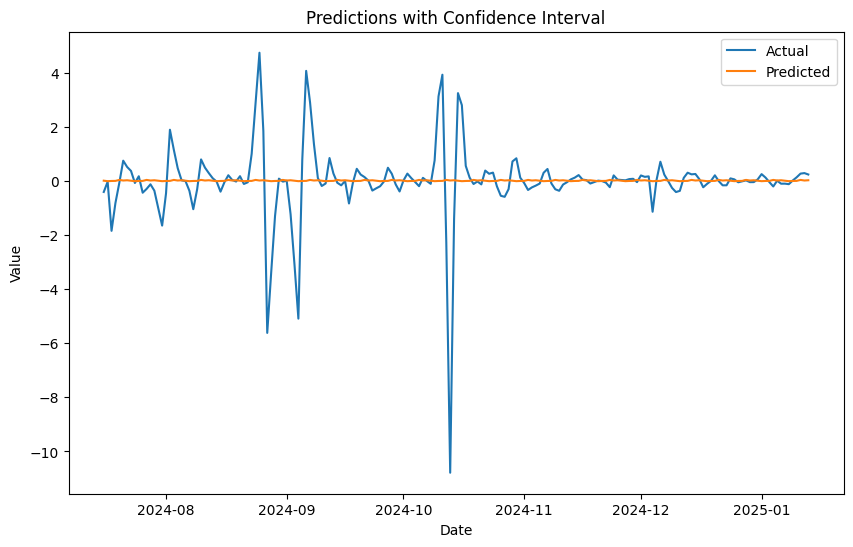

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(final_forecast['ds'][-len(testDf):],final_forecast['yhat'][-len(testDf):], label='Predicted')
#plt.fill_between(test.index, conx`fint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Square Root Transformation

In [ ]:
df['Flow - OP2 Tail Gas_sqrt'] = np.sqrt(df['Flow - OP2 Tail Gas'])

In [ ]:
start_date = df.index.min()
end_date = df.index.max()

# Ensure the DataFrame is within the desired date range
df = df[(df.index >= start_date) & (df.index <= end_date)]

# Resample data annually and calculate means and variances for each year
yearly_stats = {
    year: {
        'mean': df[df.index.year == year]['Flow - OP2 Tail Gas_sqrt'].mean(),
        'variance': df[df.index.year == year]['Flow - OP2 Tail Gas_sqrt'].var()
    }
    for year in range(start_date.year, end_date.year + 1)
}

# Accessing the means and variances
for year, stats in yearly_stats.items():
    print(f"Year: {year}, Mean: {stats['mean']}, Variance: {stats['variance']}")

Year: 2020, Mean: 3.583868960224951, Variance: 0.42295015222288085
Year: 2021, Mean: 3.3876337167550155, Variance: 1.2146397036873071
Year: 2022, Mean: 3.069751465935305, Variance: 1.5339321114000986
Year: 2023, Mean: 3.383700119202734, Variance: 0.6199141106818755
Year: 2024, Mean: 3.787279880031545, Variance: 0.33701646295840526
Year: 2025, Mean: 3.9603253527568905, Variance: 0.0005759778369292258


#### ADF Test

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['Flow - OP2 Tail Gas_sqrt'])
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print("*"*20)

ADF Statistic: -7.340651500213045
p-value: 1.0674061851702618e-10
********************


#### Plot PACF and ACF

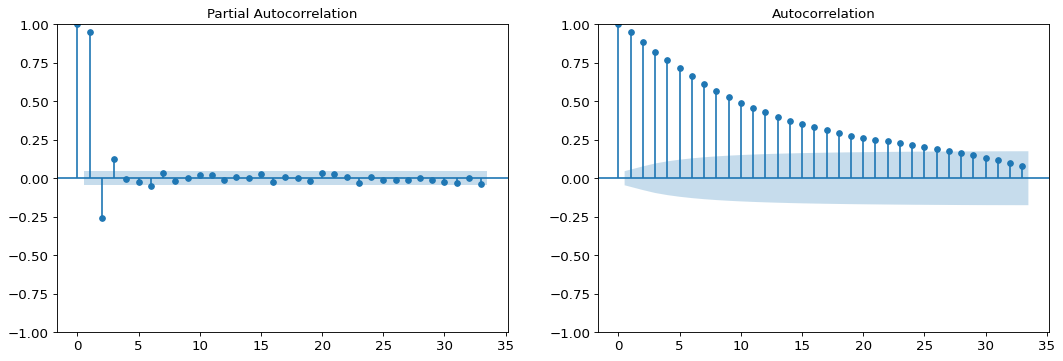

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_pacf(df['Flow - OP2 Tail Gas_sqrt'], method='ywm' ,ax=ax1)  # Specify the axis for PACF
plot_acf(df['Flow - OP2 Tail Gas_sqrt'], ax=ax2)  # Specify the axis for ACF
ax2.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='both', labelsize=12)
plt.show()


##### Training With Square Root Tranformation

In [ ]:
# Train Test Split
train = df['Flow - OP2 Tail Gas_sqrt'].iloc[:-int(len(df['Flow - OP2 Tail Gas_sqrt']) * 0.1)]
test = df['Flow - OP2 Tail Gas_sqrt'].iloc[-int(len(df['Flow - OP2 Tail Gas_sqrt']) * 0.1):]

###### ARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=False,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=1, start_q=1, # minimum p and q
                      max_p=2, max_q=2, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      max_order=None,
                      error_action='ignore',
                      scoring='mae',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8834.264, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6677.353, Time=1.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5014.201, Time=3.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=438.854, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=436.059, Time=3.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=437.589, Time=1.99 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.41 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 14.456 seconds


In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.645562447852722
MAE: 1.518745259547314


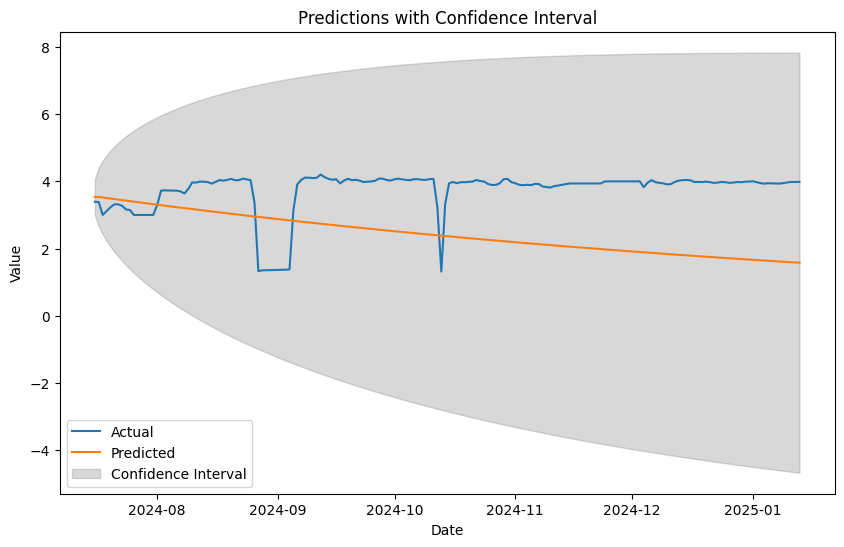

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, prediction, label='Predicted')
plt.fill_between(test.index, confint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

###### SARIMA

In [ ]:
model = pm.auto_arima(train,
                      m=7,               # frequency of series
                      seasonal=True,     # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0,
                      start_q=0,          # minimum p and q
                      max_p=2,
                      max_q=2,           # maximum p and q
                      D=None,                # let model determine 'D'
                      trace=True,
                      error_action='warn',  # change to 'warn' to see errors
                      suppress_warnings=True,
                      stepwise=False,        # change to False for exhaustive search
                      scoring='mae',
                      max_order=None,
                      # n_jobs=-1,  # Utilize all available CPU cores
                      with_intercept='auto'
                      )

 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4536.253, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3927.793, Time=2.19 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=3772.340, Time=3.09 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=3704.839, Time=2.80 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=3706.608, Time=2.41 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=3707.935, Time=10.26 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=3706.625, Time=5.78 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=3698.325, Time=10.17 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=3709.935, Time=8.79 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2705.938, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2318.195, Time=1.77 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=2197.261, Time=5.97 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=2147.852, Time=2.22 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=2144.168, Time=3.37 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=2147.065, Time=11.95 sec
 ARIMA(

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1645
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -187.562
Date:                Fri, 24 Jan 2025   AIC                            383.124
Time:                        13:59:17   BIC                            404.746
Sample:                    01-14-2020   HQIC                           391.142
                         - 07-15-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2447      0.038      6.364      0.000       0.169       0.320
ar.L1          0.9284      0.016     58.723      0.000       0.897       0.959
ma.L1          0.3289      0.013     24.789      0.0

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)

In [ ]:
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.7134079511050646
MAE: 0.6078240940266189


In [ ]:
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

rmse = np.sqrt(mean_squared_error(test, prediction))
mae = mean_absolute_error(test, prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.7134079511050646
MAE: 0.6078240940266189


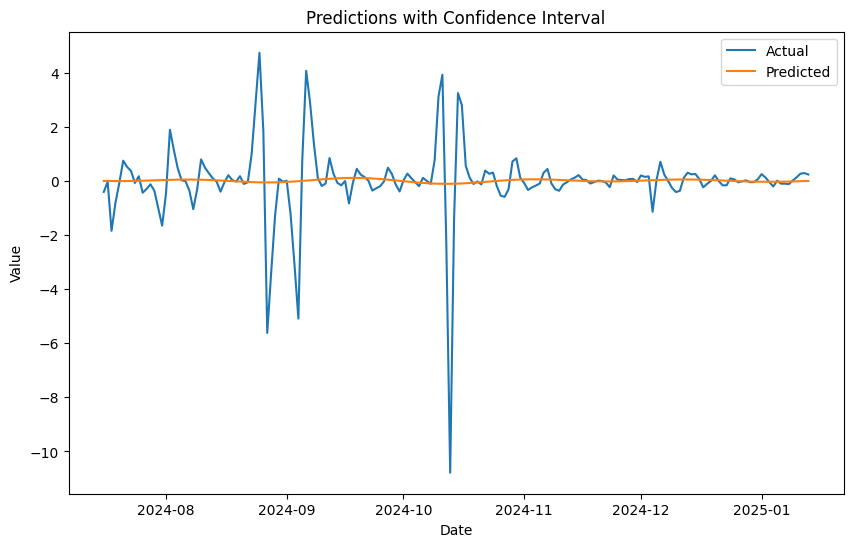

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(final_forecast['ds'][-len(testDf):],final_forecast['yhat'][-len(testDf):], label='Predicted')
#plt.fill_between(test.index, conx`fint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


###### Prophet

In [ ]:
# Train Test Split
train = df['Flow - OP2 Tail Gas_sqrt'].iloc[:-int(len(df['Flow - OP2 Tail Gas_sqrt']) * 0.1)]
test = df['Flow - OP2 Tail Gas_sqrt'].iloc[-int(len(df['Flow - OP2 Tail Gas_sqrt']) * 0.1):]

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
trainDf=pd.DataFrame()
trainDf['ds']=train.index
trainDf['y']=train.values

In [ ]:
param_grid = {
    # 'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative'],
    'growth': ['linear', 'logistic'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    # 'holidays_prior_scale': [0.1, 1.0, 10.0],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'interval_width': [0.8, 0.9, 0.95],
    # 'n_changepoints': [10, 25, 50],
    # 'changepoint_range': [0.8, 0.9, 1.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [ ]:
best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet(**params)
    trainDf['cap'] = 1.2 * trainDf['y'].max()
    model.fit(trainDf)

    future = model.make_future_dataframe(periods=len(testDf))
    future['cap'] = 1.2 * trainDf['y'].max()
    forecast = model.predict(future)
    rmse = np.sqrt(mean_squared_error(testDf['y'], forecast['yhat'][-len(testDf):]))



    # # Make future predictions (adjust periods as needed)
    # future = model.make_future_dataframe(periods=len(trainDf))
    # future['cap'] = 1.2 * trainDf['y'].max()
    # forecast = model.predict(future)

    # # Calculate MAPE or any other metric
    # # mape = mean_absolute_percentage_error(trainDf['y'], forecast['yhat'][:len(trainDf)])  # Adjust as necessary
    # rmse = np.sqrt(mean_squared_error(trainDf['y'], forecast['yhat'][:len(trainDf)]))

    print(f"Parameters: {params}, RMSE: {rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print(f'Best RMSE: {rmse}')
print(f'Best Parameters: {best_params}')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/saxyx7mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j4xhymw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63040', 'data', 'file=/tmp/tmpp90twyik/saxyx7mc.json', 'init=/tmp/tmpp90twyik/j4xhymw7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb6khd66y/prophet_model-20250124141046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/glxqqpze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e9e2liy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.196207611088178


14:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n0e1wqe8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/krp63gzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40041', 'data', 'file=/tmp/tmpp90twyik/n0e1wqe8.json', 'init=/tmp/tmpp90twyik/krp63gzo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2298r1xv/prophet_model-20250124141048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.196207611088178


14:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qlodjdvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jtnuq5_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24470', 'data', 'file=/tmp/tmpp90twyik/qlodjdvp.json', 'init=/tmp/tmpp90twyik/jtnuq5_7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7llghtpv/prophet_model-20250124141048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.196207611088178


14:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tmb2h1i3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xletj9s3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49914', 'data', 'file=/tmp/tmpp90twyik/tmb2h1i3.json', 'init=/tmp/tmpp90twyik/xletj9s3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6p7afq0x/prophet_model-20250124141049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.205814787736046


14:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yhjwtwn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4vg4rrj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84031', 'data', 'file=/tmp/tmpp90twyik/yhjwtwn6.json', 'init=/tmp/tmpp90twyik/4vg4rrj4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelutbu8_i5/prophet_model-20250124141050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.205814787736046


14:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/435yjexe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hiu5udah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5051', 'data', 'file=/tmp/tmpp90twyik/435yjexe.json', 'init=/tmp/tmpp90twyik/hiu5udah.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx6eyry5h/prophet_model-20250124141051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.205814787736046


14:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0w0i61n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l0mzohsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85748', 'data', 'file=/tmp/tmpp90twyik/0w0i61n9.json', 'init=/tmp/tmpp90twyik/l0mzohsr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model21drxyiw/prophet_model-20250124141051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.197833128849575


14:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rzcty8x1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lleu8s37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41170', 'data', 'file=/tmp/tmpp90twyik/rzcty8x1.json', 'init=/tmp/tmpp90twyik/lleu8s37.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj1_runq5/prophet_model-20250124141052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.197833128849575


14:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fnsde8p6.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.197833128849575


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f3wpb73b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86045', 'data', 'file=/tmp/tmpp90twyik/fnsde8p6.json', 'init=/tmp/tmpp90twyik/f3wpb73b.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrrw4peso/prophet_model-20250124141053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t8q34b9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ufxvolck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.201827850491316


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pcpkn9xj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rspkw6id.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22929', 'data', 'file=/tmp/tmpp90twyik/pcpkn9xj.json', 'init=/tmp/tmpp90twyik/rspkw6id.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5wa39myi/prophet_model-20250124141054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.201827850491316


14:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3ym1vm11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2wqsmntl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47834', 'data', 'file=/tmp/tmpp90twyik/3ym1vm11.json', 'init=/tmp/tmpp90twyik/2wqsmntl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model04l6hh0t/prophet_model-20250124141055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.201827850491316


14:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/54b2ivqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/blbnq8bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40786', 'data', 'file=/tmp/tmpp90twyik/54b2ivqh.json', 'init=/tmp/tmpp90twyik/blbnq8bc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvc7a770j/prophet_model-20250124141055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.138067447565333


14:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6giy2q72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lyavu3s6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97197', 'data', 'file=/tmp/tmpp90twyik/6giy2q72.json', 'init=/tmp/tmpp90twyik/lyavu3s6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4e_klof9/prophet_model-20250124141056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.138067447565333


14:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/85kin3lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z9ozre03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3431', 'data', 'file=/tmp/tmpp90twyik/85kin3lm.json', 'init=/tmp/tmpp90twyik/z9ozre03.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellq7110en/prophet_model-20250124141057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.138067447565333


14:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0llq4ou6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/52ao__dd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49866', 'data', 'file=/tmp/tmpp90twyik/0llq4ou6.json', 'init=/tmp/tmpp90twyik/52ao__dd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsv2jbazy/prophet_model-20250124141058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.1444891635386165


14:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/es8jf5c7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vp09rymy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87154', 'data', 'file=/tmp/tmpp90twyik/es8jf5c7.json', 'init=/tmp/tmpp90twyik/vp09rymy.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelr702r4rk/prophet_model-20250124141058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.1444891635386165


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vj3mz5wn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fqpro4xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61706', 'data', 'file=/tmp/tmpp90twyik/vj3mz5wn.json', 'init=/tmp/tmpp90twyik/fqpro4xp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqxt6qbwg/prophet_model-20250124141059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.1444891635386165


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bdksxs_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cpu4ldbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4042', 'data', 'file=/tmp/tmpp90twyik/bdksxs_5.json', 'init=/tmp/tmpp90twyik/cpu4ldbz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4m93fr1u/prophet_model-20250124141059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.14830386446498


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r9adlx5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/br_bkdk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34384', 'data', 'file=/tmp/tmpp90twyik/r9adlx5d.json', 'init=/tmp/tmpp90twyik/br_bkdk3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell9m2o4al/prophet_model-20250124141100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.14830386446498


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tqg41ila.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5l1mo0hk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79476', 'data', 'file=/tmp/tmpp90twyik/tqg41ila.json', 'init=/tmp/tmpp90twyik/5l1mo0hk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_gktch1k/prophet_model-20250124141100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.14830386446498


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/aj1fvc70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vky69lb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85074', 'data', 'file=/tmp/tmpp90twyik/aj1fvc70.json', 'init=/tmp/tmpp90twyik/vky69lb_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0z99nsmn/prophet_model-20250124141101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4ipe2g65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d5a5u2ry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61519', 'data', 'file=/tmp/tmpp90twyik/4ipe2g65.json', 'init=/tmp/tmpp90twyik/d5a5u2ry.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb8p328r5/prophet_model-20250124141101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zl_pl5s9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lw246muw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12181', 'data', 'file=/tmp/tmpp90twyik/zl_pl5s9.json', 'init=/tmp/tmpp90twyik/lw246muw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfy6xakit/prophet_model-20250124141102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


14:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nk_wwk_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uq1ewl1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53775', 'data', 'file=/tmp/tmpp90twyik/nk_wwk_j.json', 'init=/tmp/tmpp90twyik/uq1ewl1u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelp1qygkpm/prophet_model-20250124141102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.19932349834922


14:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n90z6i43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ramrcq8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34128', 'data', 'file=/tmp/tmpp90twyik/n90z6i43.json', 'init=/tmp/tmpp90twyik/ramrcq8m.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9evhlvvf/prophet_model-20250124141103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.19932349834922


14:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nsu3k0cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tfywh41a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9768', 'data', 'file=/tmp/tmpp90twyik/nsu3k0cu.json', 'init=/tmp/tmpp90twyik/tfywh41a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljha24pvn/prophet_model-20250124141104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.19932349834922


14:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vi18egin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l4hu8o2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29604', 'data', 'file=/tmp/tmpp90twyik/vi18egin.json', 'init=/tmp/tmpp90twyik/l4hu8o2q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelse1_86fw/prophet_model-20250124141104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.204693142717245


14:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_hbeum1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/khgm2w07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92027', 'data', 'file=/tmp/tmpp90twyik/_hbeum1k.json', 'init=/tmp/tmpp90twyik/khgm2w07.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsctylcxl/prophet_model-20250124141105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.204693142717245


14:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u5wewiy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lmfhee5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81455', 'data', 'file=/tmp/tmpp90twyik/u5wewiy4.json', 'init=/tmp/tmpp90twyik/lmfhee5j.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeluyc7sej1/prophet_model-20250124141106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.204693142717245


14:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nla6174l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nrwi7o2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33328', 'data', 'file=/tmp/tmpp90twyik/nla6174l.json', 'init=/tmp/tmpp90twyik/nrwi7o2i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5zw0r3rs/prophet_model-20250124141106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.200462032314602


14:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vin41v1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/guexm4dm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70430', 'data', 'file=/tmp/tmpp90twyik/vin41v1q.json', 'init=/tmp/tmpp90twyik/guexm4dm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliluqpair/prophet_model-20250124141107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.200462032314602


14:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9axp5p9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gd9pragd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56410', 'data', 'file=/tmp/tmpp90twyik/9axp5p9x.json', 'init=/tmp/tmpp90twyik/gd9pragd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1_2883_p/prophet_model-20250124141108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.200462032314602


14:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9ck_jdwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4gi9z0h5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52711', 'data', 'file=/tmp/tmpp90twyik/9ck_jdwr.json', 'init=/tmp/tmpp90twyik/4gi9z0h5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell14jtayx/prophet_model-20250124141109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.200717788676027


14:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/opvx8bfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gpcjagk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47787', 'data', 'file=/tmp/tmpp90twyik/opvx8bfn.json', 'init=/tmp/tmpp90twyik/gpcjagk5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelg_rogcn4/prophet_model-20250124141109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.200717788676027


14:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wovptmdm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vxfa58q2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63532', 'data', 'file=/tmp/tmpp90twyik/wovptmdm.json', 'init=/tmp/tmpp90twyik/vxfa58q2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelusbx1xf2/prophet_model-20250124141110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.200717788676027


14:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kcb_7sn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mx37e36t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87374', 'data', 'file=/tmp/tmpp90twyik/kcb_7sn6.json', 'init=/tmp/tmpp90twyik/mx37e36t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb_nrnv4g/prophet_model-20250124141111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.150651558793385


14:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4jddwfwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kik4i1w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18545', 'data', 'file=/tmp/tmpp90twyik/4jddwfwx.json', 'init=/tmp/tmpp90twyik/kik4i1w9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliz38omng/prophet_model-20250124141112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.150651558793385


14:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5986ki7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g9sgyo44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88834', 'data', 'file=/tmp/tmpp90twyik/5986ki7m.json', 'init=/tmp/tmpp90twyik/g9sgyo44.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellpwonk9r/prophet_model-20250124141113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.150651558793385


14:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hvgsbbbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6u3b0fzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46790', 'data', 'file=/tmp/tmpp90twyik/hvgsbbbg.json', 'init=/tmp/tmpp90twyik/6u3b0fzx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk7ahv3fn/prophet_model-20250124141113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.150587077202928


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/06lbq8t4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m6da_z3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32037', 'data', 'file=/tmp/tmpp90twyik/06lbq8t4.json', 'init=/tmp/tmpp90twyik/m6da_z3a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx3go6unk/prophet_model-20250124141114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.150587077202928


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1nb734tg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zyyr0vav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=568', 'data', 'file=/tmp/tmpp90twyik/1nb734tg.json', 'init=/tmp/tmpp90twyik/zyyr0vav.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcbbm44vc/prophet_model-20250124141115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.150587077202928


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4yleg0sw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i0592owl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25415', 'data', 'file=/tmp/tmpp90twyik/4yleg0sw.json', 'init=/tmp/tmpp90twyik/i0592owl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1b2fomis/prophet_model-20250124141115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.141474648849561


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6m6srhut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/iiuql12v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31516', 'data', 'file=/tmp/tmpp90twyik/6m6srhut.json', 'init=/tmp/tmpp90twyik/iiuql12v.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model52jd9miu/prophet_model-20250124141116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.141474648849561


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rgbksrlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9auazuzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64997', 'data', 'file=/tmp/tmpp90twyik/rgbksrlb.json', 'init=/tmp/tmpp90twyik/9auazuzw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj4q1r4zk/prophet_model-20250124141116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.141474648849561


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4wm65_zh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pzdyi5vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60937', 'data', 'file=/tmp/tmpp90twyik/4wm65_zh.json', 'init=/tmp/tmpp90twyik/pzdyi5vb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model5d8usf3w/prophet_model-20250124141117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_fyrhq1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c_1ccu8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97495', 'data', 'file=/tmp/tmpp90twyik/_fyrhq1n.json', 'init=/tmp/tmpp90twyik/c_1ccu8i.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw7nwlh4i/prophet_model-20250124141117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kkdhvqbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ohll7zyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47142', 'data', 'file=/tmp/tmpp90twyik/kkdhvqbw.json', 'init=/tmp/tmpp90twyik/ohll7zyh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwhy740u6/prophet_model-20250124141118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


14:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cw4bdbzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6r3467kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38249', 'data', 'file=/tmp/tmpp90twyik/cw4bdbzj.json', 'init=/tmp/tmpp90twyik/6r3467kc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkrv6l3wa/prophet_model-20250124141118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.206513839565324


14:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lcgc0sa0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h8cgjlmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96591', 'data', 'file=/tmp/tmpp90twyik/lcgc0sa0.json', 'init=/tmp/tmpp90twyik/h8cgjlmr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelto28ojmr/prophet_model-20250124141119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.206513839565324


14:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s3f50eae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yjod4cij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=608', 'data', 'file=/tmp/tmpp90twyik/s3f50eae.json', 'init=/tmp/tmpp90twyik/yjod4cij.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk73dz9h5/prophet_model-20250124141120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.206513839565324


14:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ugxyn1z5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3swfe_yh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74442', 'data', 'file=/tmp/tmpp90twyik/ugxyn1z5.json', 'init=/tmp/tmpp90twyik/3swfe_yh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8x946hxl/prophet_model-20250124141120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.204127909327926


14:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eq0_kku1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m7nb6y6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27920', 'data', 'file=/tmp/tmpp90twyik/eq0_kku1.json', 'init=/tmp/tmpp90twyik/m7nb6y6v.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv1fc_y4o/prophet_model-20250124141121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.204127909327926


14:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wos8n8ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mpxgc0ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8927', 'data', 'file=/tmp/tmpp90twyik/wos8n8ph.json', 'init=/tmp/tmpp90twyik/mpxgc0ed.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxufn2wmk/prophet_model-20250124141122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.204127909327926


14:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8wa315o1.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.1978719804881255


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_zg5im21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12302', 'data', 'file=/tmp/tmpp90twyik/8wa315o1.json', 'init=/tmp/tmpp90twyik/_zg5im21.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1sl5zapc/prophet_model-20250124141123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kbuabwde.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.1978719804881255


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bcc34pkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38882', 'data', 'file=/tmp/tmpp90twyik/kbuabwde.json', 'init=/tmp/tmpp90twyik/bcc34pkt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhm1n94vh/prophet_model-20250124141123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c6mrod0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ik26k7_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.1978719804881255


14:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/632hdq08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/83miso6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68430', 'data', 'file=/tmp/tmpp90twyik/632hdq08.json', 'init=/tmp/tmpp90twyik/83miso6l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljpwjv_81/prophet_model-20250124141125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.203087470397645


14:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pxhewe1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6tv4_g2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26941', 'data', 'file=/tmp/tmpp90twyik/pxhewe1t.json', 'init=/tmp/tmpp90twyik/6tv4_g2k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1b5v3rxh/prophet_model-20250124141126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.203087470397645


14:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/heh8mlvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bv5j9rns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26556', 'data', 'file=/tmp/tmpp90twyik/heh8mlvw.json', 'init=/tmp/tmpp90twyik/bv5j9rns.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqsdqxvhf/prophet_model-20250124141127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.203087470397645


14:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jx0abfm2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/izh45py0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19958', 'data', 'file=/tmp/tmpp90twyik/jx0abfm2.json', 'init=/tmp/tmpp90twyik/izh45py0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1c1g1jkv/prophet_model-20250124141128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.1460162638653975


14:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pbwja07c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ydm9wf2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60852', 'data', 'file=/tmp/tmpp90twyik/pbwja07c.json', 'init=/tmp/tmpp90twyik/ydm9wf2w.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model58ss6tu7/prophet_model-20250124141129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.1460162638653975


14:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yrqmeg1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oj90_f4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14315', 'data', 'file=/tmp/tmpp90twyik/yrqmeg1_.json', 'init=/tmp/tmpp90twyik/oj90_f4o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3ikgo5ie/prophet_model-20250124141129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.1460162638653975


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6b9kuteb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c1kvrqyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74483', 'data', 'file=/tmp/tmpp90twyik/6b9kuteb.json', 'init=/tmp/tmpp90twyik/c1kvrqyw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell0z8f3ls/prophet_model-20250124141130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.145835504320607


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u6y9tewo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dytvule2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67595', 'data', 'file=/tmp/tmpp90twyik/u6y9tewo.json', 'init=/tmp/tmpp90twyik/dytvule2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxi2_ctp4/prophet_model-20250124141130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.145835504320607


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wk34n9hz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_c3g03y8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22389', 'data', 'file=/tmp/tmpp90twyik/wk34n9hz.json', 'init=/tmp/tmpp90twyik/_c3g03y8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcghvnrpm/prophet_model-20250124141131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.145835504320607


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nbmzkl9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wmam7ao6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65094', 'data', 'file=/tmp/tmpp90twyik/nbmzkl9u.json', 'init=/tmp/tmpp90twyik/wmam7ao6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelf2k5u9ok/prophet_model-20250124141131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.146539917170808


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rx2p7jsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oy56a4j6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37466', 'data', 'file=/tmp/tmpp90twyik/rx2p7jsb.json', 'init=/tmp/tmpp90twyik/oy56a4j6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2x_dco5m/prophet_model-20250124141132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.146539917170808


14:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fb9532dn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zj9s__i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65248', 'data', 'file=/tmp/tmpp90twyik/fb9532dn.json', 'init=/tmp/tmpp90twyik/zj9s__i8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2ul67z0p/prophet_model-20250124141132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.146539917170808


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ygk3y4m0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yayt7do8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52727', 'data', 'file=/tmp/tmpp90twyik/ygk3y4m0.json', 'init=/tmp/tmpp90twyik/yayt7do8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelybiofe63/prophet_model-20250124141133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0d011qwd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u2pv0ebf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71728', 'data', 'file=/tmp/tmpp90twyik/0d011qwd.json', 'init=/tmp/tmpp90twyik/u2pv0ebf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloothh10h/prophet_model-20250124141133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b_udo0_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p1i1m6bu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16064', 'data', 'file=/tmp/tmpp90twyik/b_udo0_d.json', 'init=/tmp/tmpp90twyik/p1i1m6bu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelevj1c77u/prophet_model-20250124141134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


14:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kmka6kme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_iu1zyzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12315', 'data', 'file=/tmp/tmpp90twyik/kmka6kme.json', 'init=/tmp/tmpp90twyik/_iu1zyzc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhyxua2qd/prophet_model-20250124141136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.845387563013253


14:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vorhj1fn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dbsvptqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37431', 'data', 'file=/tmp/tmpp90twyik/vorhj1fn.json', 'init=/tmp/tmpp90twyik/dbsvptqf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_q6xfg5v/prophet_model-20250124141138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.845387563013253


14:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2_dyzg2y.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.845387563013253


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nysnrymv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93184', 'data', 'file=/tmp/tmpp90twyik/2_dyzg2y.json', 'init=/tmp/tmpp90twyik/nysnrymv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelscycev23/prophet_model-20250124141140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7ywn1z_7.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8154244465131786


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p9x_cqtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76080', 'data', 'file=/tmp/tmpp90twyik/7ywn1z_7.json', 'init=/tmp/tmpp90twyik/p9x_cqtx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_models1mezgn3/prophet_model-20250124141143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/339ooubk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wvzzm32w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8154244465131786


14:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jewlq771.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gkl6337p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77631', 'data', 'file=/tmp/tmpp90twyik/jewlq771.json', 'init=/tmp/tmpp90twyik/gkl6337p.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqecim045/prophet_model-20250124141146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8154244465131786


14:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xf_nyv4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/og6krz33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77363', 'data', 'file=/tmp/tmpp90twyik/xf_nyv4i.json', 'init=/tmp/tmpp90twyik/og6krz33.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsv1dc8te/prophet_model-20250124141148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.840239494443974


14:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ewqmmjqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q3emiwnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72931', 'data', 'file=/tmp/tmpp90twyik/ewqmmjqy.json', 'init=/tmp/tmpp90twyik/q3emiwnd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeld39yvx3c/prophet_model-20250124141150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.840239494443974


14:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rvakd_wh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qz3m2t69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58392', 'data', 'file=/tmp/tmpp90twyik/rvakd_wh.json', 'init=/tmp/tmpp90twyik/qz3m2t69.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelk8lnd3bn/prophet_model-20250124141152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.840239494443974


14:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0v5p4h0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a3q4dtpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73168', 'data', 'file=/tmp/tmpp90twyik/0v5p4h0o.json', 'init=/tmp/tmpp90twyik/a3q4dtpn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4ic64cvy/prophet_model-20250124141154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.832876900501763


14:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cfjz0ky7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/faqyx6zo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6990', 'data', 'file=/tmp/tmpp90twyik/cfjz0ky7.json', 'init=/tmp/tmpp90twyik/faqyx6zo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb_ji9xmb/prophet_model-20250124141157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.832876900501763


14:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mhhxwhs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/53im31q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93443', 'data', 'file=/tmp/tmpp90twyik/mhhxwhs4.json', 'init=/tmp/tmpp90twyik/53im31q0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelskm2qicf/prophet_model-20250124141159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.832876900501763


14:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n37sl9gb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5not6rzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59714', 'data', 'file=/tmp/tmpp90twyik/n37sl9gb.json', 'init=/tmp/tmpp90twyik/5not6rzc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model__dl2jq9/prophet_model-20250124141200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.801498548749183


14:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hzcjumh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2mfsljwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25566', 'data', 'file=/tmp/tmpp90twyik/hzcjumh8.json', 'init=/tmp/tmpp90twyik/2mfsljwo.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj8jm5w53/prophet_model-20250124141202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.801498548749183


14:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w9c5fqfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1ypaz_ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85077', 'data', 'file=/tmp/tmpp90twyik/w9c5fqfr.json', 'init=/tmp/tmpp90twyik/1ypaz_ni.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb8ikoeyy/prophet_model-20250124141204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.801498548749183


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7s07u0ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4e78g35e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3505', 'data', 'file=/tmp/tmpp90twyik/7s07u0ui.json', 'init=/tmp/tmpp90twyik/4e78g35e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1uzdmb3u/prophet_model-20250124141205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.792785421205844


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bs2yddvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6v0p2pfg.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.792785421205844


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96627', 'data', 'file=/tmp/tmpp90twyik/bs2yddvg.json', 'init=/tmp/tmpp90twyik/6v0p2pfg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkklf20dc/prophet_model-20250124141207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ds7laf1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4cpg7gm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35038', 'data', 'file=/tmp/tmpp90twyik/ds7

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.792785421205844


14:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3ff0tkq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/19aj7hyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26352', 'data', 'file=/tmp/tmpp90twyik/3ff0tkq4.json', 'init=/tmp/tmpp90twyik/19aj7hyw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelh_chco42/prophet_model-20250124141212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8104381579206446


14:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gx7u71re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mqz0yj7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25157', 'data', 'file=/tmp/tmpp90twyik/gx7u71re.json', 'init=/tmp/tmpp90twyik/mqz0yj7y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrrm4_gv_/prophet_model-20250124141214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8104381579206446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1floitfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xtnxmfjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10975', 'data', 'file=/tmp/tmpp90twyik/1floitfx.json', 'init=/tmp/tmpp90twyik/xtnxmfjc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkchx3pwo/prophet_model-20250124141215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8104381579206446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/myyh6krg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sovefpip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93132', 'data', 'file=/tmp/tmpp90twyik/myyh6krg.json', 'init=/tmp/tmpp90twyik/sovefpip.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8ol7z_69/prophet_model-20250124141217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8zhagdu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6v6zg1q7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11619', 'data', 'file=/tmp/tmpp90twyik/8zhagdu2.json', 'init=/tmp/tmpp90twyik/6v6zg1q7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxjf7pzfg/prophet_model-20250124141218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p50u2uh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bsem1269.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71181', 'data', 'file=/tmp/tmpp90twyik/p50u2uh8.json', 'init=/tmp/tmpp90twyik/bsem1269.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7g10z3q7/prophet_model-20250124141220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565


14:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lnnrq5_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uk8hbyr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6738', 'data', 'file=/tmp/tmpp90twyik/lnnrq5_0.json', 'init=/tmp/tmpp90twyik/uk8hbyr2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxxkklbrj/prophet_model-20250124141222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.849712562580566


14:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f7vqctkt.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.849712562580566


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e1q6nbmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83314', 'data', 'file=/tmp/tmpp90twyik/f7vqctkt.json', 'init=/tmp/tmpp90twyik/e1q6nbmi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_d9ur7qo/prophet_model-20250124141225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v612dzu8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r2fk7b6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.849712562580566


14:12:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m3qwmlg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ryebu785.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21684', 'data', 'file=/tmp/tmpp90twyik/m3qwmlg3.json', 'init=/tmp/tmpp90twyik/ryebu785.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6o4cymok/prophet_model-20250124141229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.830536223011284


14:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h8htb4_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lq68ow8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40861', 'data', 'file=/tmp/tmpp90twyik/h8htb4_8.json', 'init=/tmp/tmpp90twyik/lq68ow8_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model44i276fq/prophet_model-20250124141231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.830536223011284


14:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2mkr2hv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dt80t2tr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85892', 'data', 'file=/tmp/tmpp90twyik/2mkr2hv3.json', 'init=/tmp/tmpp90twyik/dt80t2tr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnha50piy/prophet_model-20250124141232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.830536223011284


14:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_q8wy3nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5m2pioa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99845', 'data', 'file=/tmp/tmpp90twyik/_q8wy3nz.json', 'init=/tmp/tmpp90twyik/5m2pioa1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljvnlf5pg/prophet_model-20250124141234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.855755154943803


14:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qyn6xpck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gj16v2e0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38421', 'data', 'file=/tmp/tmpp90twyik/qyn6xpck.json', 'init=/tmp/tmpp90twyik/gj16v2e0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model48t95ip5/prophet_model-20250124141236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.855755154943803


14:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e6kub3h_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vlmfwvy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46457', 'data', 'file=/tmp/tmpp90twyik/e6kub3h_.json', 'init=/tmp/tmpp90twyik/vlmfwvy6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqn38i28l/prophet_model-20250124141238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.855755154943803


14:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4ckoh2sm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n65rz1iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11158', 'data', 'file=/tmp/tmpp90twyik/4ckoh2sm.json', 'init=/tmp/tmpp90twyik/n65rz1iw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelte61jgd_/prophet_model-20250124141241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.841203300279944


14:12:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ah5xk2ky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ac4914ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86744', 'data', 'file=/tmp/tmpp90twyik/ah5xk2ky.json', 'init=/tmp/tmpp90twyik/ac4914ku.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3at4yqth/prophet_model-20250124141243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.841203300279944


14:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hmqcwz1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hc_hlpue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70599', 'data', 'file=/tmp/tmpp90twyik/hmqcwz1a.json', 'init=/tmp/tmpp90twyik/hc_hlpue.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelw6ga1spa/prophet_model-20250124141245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.841203300279944


14:12:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6myxg78b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l39k9rlz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92423', 'data', 'file=/tmp/tmpp90twyik/6myxg78b.json', 'init=/tmp/tmpp90twyik/l39k9rlz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmef5thr5/prophet_model-20250124141246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.821687286746843


14:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r2_smxh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ffn5a139.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13685', 'data', 'file=/tmp/tmpp90twyik/r2_smxh0.json', 'init=/tmp/tmpp90twyik/ffn5a139.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyv9u38jv/prophet_model-20250124141248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.821687286746843


14:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ia2i0do2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/talfru49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17712', 'data', 'file=/tmp/tmpp90twyik/ia2i0do2.json', 'init=/tmp/tmpp90twyik/talfru49.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8iqtj9r1/prophet_model-20250124141250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.821687286746843


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zlstji6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/93b82_x_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6920', 'data', 'file=/tmp/tmpp90twyik/zlstji6g.json', 'init=/tmp/tmpp90twyik/93b82_x_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpr1e5kek/prophet_model-20250124141251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7838302856424475


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/eu0ll0jf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/olvkmsgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95734', 'data', 'file=/tmp/tmpp90twyik/eu0ll0jf.json', 'init=/tmp/tmpp90twyik/olvkmsgh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0rkx763v/prophet_model-20250124141253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7838302856424475


14:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1x32ysad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rulsmf31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67298', 'data', 'file=/tmp/tmpp90twyik/1x32ysad.json', 'init=/tmp/tmpp90twyik/rulsmf31.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele7fi6qe1/prophet_model-20250124141256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7838302856424475


14:12:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6wu7gj4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2fmm7ak5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30728', 'data', 'file=/tmp/tmpp90twyik/6wu7gj4r.json', 'init=/tmp/tmpp90twyik/2fmm7ak5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsj_82hp2/prophet_model-20250124141258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8029835367624454


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ct1wo27n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lywhfouc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39753', 'data', 'file=/tmp/tmpp90twyik/ct1wo27n.json', 'init=/tmp/tmpp90twyik/lywhfouc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelqi4r1bvy/prophet_model-20250124141300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8029835367624454


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nijg0ujn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2y5gdpwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69762', 'data', 'file=/tmp/tmpp90twyik/nijg0ujn.json', 'init=/tmp/tmpp90twyik/2y5gdpwf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1feembr5/prophet_model-20250124141301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8029835367624454


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xk8vqquw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j35hg5m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91756', 'data', 'file=/tmp/tmpp90twyik/xk8vqquw.json', 'init=/tmp/tmpp90twyik/j35hg5m4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelocismxt0/prophet_model-20250124141303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a5xjl7o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9kdkpwpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37034', 'data', 'file=/tmp/tmpp90twyik/a5xjl7o2.json', 'init=/tmp/tmpp90twyik/9kdkpwpr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0at58yvr/prophet_model-20250124141304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/44_wu0im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/av_y_iji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22555', 'data', 'file=/tmp/tmpp90twyik/44_wu0im.json', 'init=/tmp/tmpp90twyik/av_y_iji.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model52j38tzs/prophet_model-20250124141306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565


14:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wtys_mfq.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8470821084783795


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cfg20l8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18894', 'data', 'file=/tmp/tmpp90twyik/wtys_mfq.json', 'init=/tmp/tmpp90twyik/cfg20l8z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3r0syc3q/prophet_model-20250124141308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/imwyj218.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8470821084783795


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5piqqcnv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97300', 'data', 'file=/tmp/tmpp90twyik/imwyj218.json', 'init=/tmp/tmpp90twyik/5piqqcnv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8ug8zgrp/prophet_model-20250124141311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mf77pv37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4sljwpk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8470821084783795


14:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7eyveqbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qok84vww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61221', 'data', 'file=/tmp/tmpp90twyik/7eyveqbt.json', 'init=/tmp/tmpp90twyik/qok84vww.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt2x3etcp/prophet_model-20250124141315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.841803848546012


14:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1_xi4jnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kk0c64sz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27224', 'data', 'file=/tmp/tmpp90twyik/1_xi4jnr.json', 'init=/tmp/tmpp90twyik/kk0c64sz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele0e145zj/prophet_model-20250124141316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.841803848546012


14:13:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ygn_so7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ear1nbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69304', 'data', 'file=/tmp/tmpp90twyik/ygn_so7o.json', 'init=/tmp/tmpp90twyik/0ear1nbx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxmsovlz9/prophet_model-20250124141318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.841803848546012


14:13:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rkz6lvre.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8491999416420644


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p6my0hdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12731', 'data', 'file=/tmp/tmpp90twyik/rkz6lvre.json', 'init=/tmp/tmpp90twyik/p6my0hdg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljtv93e81/prophet_model-20250124141320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p399o8ru.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8491999416420644


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ze35wwrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91440', 'data', 'file=/tmp/tmpp90twyik/p399o8ru.json', 'init=/tmp/tmpp90twyik/ze35wwrv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb09ly419/prophet_model-20250124141322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/90bjf918.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hpeh74xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8491999416420644


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yn2pmxot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vwg54_bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18808', 'data', 'file=/tmp/tmpp90twyik/yn2pmxot.json', 'init=/tmp/tmpp90twyik/vwg54_bs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3oz0kyjw/prophet_model-20250124141327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.8429842701162205


14:13:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9wt75ppm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wu7qzi2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27519', 'data', 'file=/tmp/tmpp90twyik/9wt75ppm.json', 'init=/tmp/tmpp90twyik/wu7qzi2s.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelr4wehpol/prophet_model-20250124141329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.8429842701162205


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6c29yw3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q34wixlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7264', 'data', 'file=/tmp/tmpp90twyik/6c29yw3l.json', 'init=/tmp/tmpp90twyik/q34wixlt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelddp0fdum/prophet_model-20250124141330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.8429842701162205


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ns91u__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b77stg1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45633', 'data', 'file=/tmp/tmpp90twyik/0ns91u__.json', 'init=/tmp/tmpp90twyik/b77stg1g.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7_eynwn_/prophet_model-20250124141332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.7987601548224212


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1uavjvv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qu2b7d77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72326', 'data', 'file=/tmp/tmpp90twyik/1uavjvv7.json', 'init=/tmp/tmpp90twyik/qu2b7d77.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv4w29hxd/prophet_model-20250124141334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.7987601548224212


14:13:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nrleab4_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tih729i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59514', 'data', 'file=/tmp/tmpp90twyik/nrleab4_.json', 'init=/tmp/tmpp90twyik/tih729i8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcgcihjuq/prophet_model-20250124141336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.7987601548224212


14:13:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/46hz6f99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vh19mnww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51408', 'data', 'file=/tmp/tmpp90twyik/46hz6f99.json', 'init=/tmp/tmpp90twyik/vh19mnww.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8zt3l5_u/prophet_model-20250124141337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7927080414378014


14:13:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7dklz1ut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ncpsv881.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25837', 'data', 'file=/tmp/tmpp90twyik/7dklz1ut.json', 'init=/tmp/tmpp90twyik/ncpsv881.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm8n4ev0l/prophet_model-20250124141340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7927080414378014


14:13:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yw93rhww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/munv03gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1735', 'data', 'file=/tmp/tmpp90twyik/yw93rhww.json', 'init=/tmp/tmpp90twyik/munv03gd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelid3hsaop/prophet_model-20250124141342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7927080414378014


14:13:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q5lf38ym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/evfzo5tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84965', 'data', 'file=/tmp/tmpp90twyik/q5lf38ym.json', 'init=/tmp/tmpp90twyik/evfzo5tp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3ldrv4d1/prophet_model-20250124141344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.805642830497841


14:13:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zid67l6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ienjnlxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85072', 'data', 'file=/tmp/tmpp90twyik/zid67l6f.json', 'init=/tmp/tmpp90twyik/ienjnlxe.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model03v98hhr/prophet_model-20250124141345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.805642830497841


14:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/byx1p6lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dqjq0lu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74349', 'data', 'file=/tmp/tmpp90twyik/byx1p6lm.json', 'init=/tmp/tmpp90twyik/dqjq0lu7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelremz5kor/prophet_model-20250124141347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.805642830497841


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/72mmw01r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qy2m3j67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54025', 'data', 'file=/tmp/tmpp90twyik/72mmw01r.json', 'init=/tmp/tmpp90twyik/qy2m3j67.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2h1t6jao/prophet_model-20250124141349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/frfabjvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r8csdozr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82225', 'data', 'file=/tmp/tmpp90twyik/frfabjvx.json', 'init=/tmp/tmpp90twyik/r8csdozr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9pb1y61q/prophet_model-20250124141350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fkq9mdcr.json


Parameters: {'seasonality_mode': 'additive', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/56ms6265.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91262', 'data', 'file=/tmp/tmpp90twyik/fkq9mdcr.json', 'init=/tmp/tmpp90twyik/56ms6265.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrkw3z9ve/prophet_model-20250124141352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0_7ju53_.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.140215317710758


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z2um55gt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65551', 'data', 'file=/tmp/tmpp90twyik/0_7ju53_.json', 'init=/tmp/tmpp90twyik/z2um55gt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrrrgts07/prophet_model-20250124141353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ogv5jajr.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.140215317710758


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uohubcgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36479', 'data', 'file=/tmp/tmpp90twyik/ogv5jajr.json', 'init=/tmp/tmpp90twyik/uohubcgw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model88ps8mc0/prophet_model-20250124141354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/99sj94t6.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.140215317710758


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gxy5pp33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62375', 'data', 'file=/tmp/tmpp90twyik/99sj94t6.json', 'init=/tmp/tmpp90twyik/gxy5pp33.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9zvl5j9s/prophet_model-20250124141356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m26mmsnp.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.120995791874256


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/szzq11dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76480', 'data', 'file=/tmp/tmpp90twyik/m26mmsnp.json', 'init=/tmp/tmpp90twyik/szzq11dt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyss9icze/prophet_model-20250124141357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r9e82zq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q433xkc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.120995791874256


14:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/moob0zay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b36gotkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53024', 'data', 'file=/tmp/tmpp90twyik/moob0zay.json', 'init=/tmp/tmpp90twyik/b36gotkh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwhf1lk53/prophet_model-20250124141358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.120995791874256


14:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/14lqr6d3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ql393kwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80663', 'data', 'file=/tmp/tmpp90twyik/14lqr6d3.json', 'init=/tmp/tmpp90twyik/ql393kwd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model08zautcx/prophet_model-20250124141359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.141442325577683


14:13:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2wm4j1f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1011ou1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74771', 'data', 'file=/tmp/tmpp90twyik/2wm4j1f6.json', 'init=/tmp/tmpp90twyik/1011ou1t.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model19jv78mj/prophet_model-20250124141400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.141442325577683


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zcmgmakv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qy42n885.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85172', 'data', 'file=/tmp/tmpp90twyik/zcmgmakv.json', 'init=/tmp/tmpp90twyik/qy42n885.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model7f4uszll/prophet_model-20250124141400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.141442325577683


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vemsv3go.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w1y3v7lx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82858', 'data', 'file=/tmp/tmpp90twyik/vemsv3go.json', 'init=/tmp/tmpp90twyik/w1y3v7lx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9mu8vv56/prophet_model-20250124141401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.135190564217404


14:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2p7u9ler.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qbz9bztf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25341', 'data', 'file=/tmp/tmpp90twyik/2p7u9ler.json', 'init=/tmp/tmpp90twyik/qbz9bztf.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvnwga7tx/prophet_model-20250124141401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.135190564217404


14:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wcnb9sbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w08_yjtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19334', 'data', 'file=/tmp/tmpp90twyik/wcnb9sbj.json', 'init=/tmp/tmpp90twyik/w08_yjtx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelue28gp5o/prophet_model-20250124141402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.135190564217404


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/094a95wq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6bs3ycf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56667', 'data', 'file=/tmp/tmpp90twyik/094a95wq.json', 'init=/tmp/tmpp90twyik/6bs3ycf2.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model98qx28jg/prophet_model-20250124141403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.176524686592721


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/arnfhviq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/91qsrwtd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91852', 'data', 'file=/tmp/tmpp90twyik/arnfhviq.json', 'init=/tmp/tmpp90twyik/91qsrwtd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljz41tzat/prophet_model-20250124141403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.176524686592721


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wrsqubki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gd8vvxx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64012', 'data', 'file=/tmp/tmpp90twyik/wrsqubki.json', 'init=/tmp/tmpp90twyik/gd8vvxx_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model264qqqbz/prophet_model-20250124141404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.176524686592721


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uma9dn3o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r2irzop3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21976', 'data', 'file=/tmp/tmpp90twyik/uma9dn3o.json', 'init=/tmp/tmpp90twyik/r2irzop3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljl5fla5l/prophet_model-20250124141404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.157258099728544


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l_9s6hdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4nibdkzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2435', 'data', 'file=/tmp/tmpp90twyik/l_9s6hdz.json', 'init=/tmp/tmpp90twyik/4nibdkzm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli5cefg51/prophet_model-20250124141405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.157258099728544


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ong1h4eh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fdm60gdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77191', 'data', 'file=/tmp/tmpp90twyik/ong1h4eh.json', 'init=/tmp/tmpp90twyik/fdm60gdh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsnnfbda7/prophet_model-20250124141405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.157258099728544


14:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0mk2j8jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_6recv9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28279', 'data', 'file=/tmp/tmpp90twyik/0mk2j8jl.json', 'init=/tmp/tmpp90twyik/_6recv9r.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsp_3toq4/prophet_model-20250124141406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.1978112352138846


14:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kwsvmodj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xsn62wg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63094', 'data', 'file=/tmp/tmpp90twyik/kwsvmodj.json', 'init=/tmp/tmpp90twyik/xsn62wg3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_mxfx423/prophet_model-20250124141407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.1978112352138846


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/446eb5eq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bulcwnjc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89931', 'data', 'file=/tmp/tmpp90twyik/446eb5eq.json', 'init=/tmp/tmpp90twyik/bulcwnjc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0n1tmkiw/prophet_model-20250124141407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.1978112352138846


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i44i9dbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l_736udt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97331', 'data', 'file=/tmp/tmpp90twyik/i44i9dbb.json', 'init=/tmp/tmpp90twyik/l_736udt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelrlzrsw8x/prophet_model-20250124141408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9e6_e6e2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3_mg8cyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73137', 'data', 'file=/tmp/tmpp90twyik/9e6_e6e2.json', 'init=/tmp/tmpp90twyik/3_mg8cyq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhti6c4m8/prophet_model-20250124141409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/shs7t8rw.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dapdce11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45160', 'data', 'file=/tmp/tmpp90twyik/shs7t8rw.json', 'init=/tmp/tmpp90twyik/dapdce11.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0ertorzr/prophet_model-20250124141409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2mv8e4py.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9hnraoog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.005947359970956


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_obm1t3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_8vw44fe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97756', 'data', 'file=/tmp/tmpp90twyik/_obm1t3f.json', 'init=/tmp/tmpp90twyik/_8vw44fe.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3me6mak4/prophet_model-20250124141416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.005947359970956


14:14:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/sifdslbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/232diid8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85705', 'data', 'file=/tmp/tmpp90twyik/sifdslbv.json', 'init=/tmp/tmpp90twyik/232diid8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelus2scokr/prophet_model-20250124141419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.005947359970956


14:14:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/rnrxur7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wl_6ie1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40367', 'data', 'file=/tmp/tmpp90twyik/rnrxur7g.json', 'init=/tmp/tmpp90twyik/wl_6ie1y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwrrvdmn_/prophet_model-20250124141420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.126563021126959


14:14:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8gph8x4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6xoha10o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76331', 'data', 'file=/tmp/tmpp90twyik/8gph8x4n.json', 'init=/tmp/tmpp90twyik/6xoha10o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxw697tpb/prophet_model-20250124141421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.126563021126959


14:14:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p3g99cph.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.126563021126959


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xirlc_pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33352', 'data', 'file=/tmp/tmpp90twyik/p3g99cph.json', 'init=/tmp/tmpp90twyik/xirlc_pv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelbjkmsdl8/prophet_model-20250124141422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/107qbd_0.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.0210993341620345


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/c5xz3npw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26709', 'data', 'file=/tmp/tmpp90twyik/107qbd_0.json', 'init=/tmp/tmpp90twyik/c5xz3npw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modellsdhj7vs/prophet_model-20250124141426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ox1v9ffu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x4un565j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.0210993341620345


14:14:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/cw23b6nt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/71j1m7tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97198', 'data', 'file=/tmp/tmpp90twyik/cw23b6nt.json', 'init=/tmp/tmpp90twyik/71j1m7tq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modele2g_0pj5/prophet_model-20250124141433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.0210993341620345


14:14:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_nhp0tqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hwgjb8mp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11102', 'data', 'file=/tmp/tmpp90twyik/_nhp0tqa.json', 'init=/tmp/tmpp90twyik/hwgjb8mp.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modela6d5b_3_/prophet_model-20250124141434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.117553232862842


14:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_9mnrbmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7gykuulc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66321', 'data', 'file=/tmp/tmpp90twyik/_9mnrbmn.json', 'init=/tmp/tmpp90twyik/7gykuulc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljb78q226/prophet_model-20250124141434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.117553232862842


14:14:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kpyll0b7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_i34mang.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32085', 'data', 'file=/tmp/tmpp90twyik/kpyll0b7.json', 'init=/tmp/tmpp90twyik/_i34mang.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwawgppvf/prophet_model-20250124141435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.117553232862842


14:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t482b6a2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3l7mcill.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40880', 'data', 'file=/tmp/tmpp90twyik/t482b6a2.json', 'init=/tmp/tmpp90twyik/3l7mcill.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely8eu7q5h/prophet_model-20250124141437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.4652811167756505


14:14:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/17h8f5qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/h28ydd55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88332', 'data', 'file=/tmp/tmpp90twyik/17h8f5qc.json', 'init=/tmp/tmpp90twyik/h28ydd55.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyvf9gier/prophet_model-20250124141441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.4652811167756505


14:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5aax2el3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/io5nvx71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1381', 'data', 'file=/tmp/tmpp90twyik/5aax2el3.json', 'init=/tmp/tmpp90twyik/io5nvx71.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcglzbdtx/prophet_model-20250124141443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.4652811167756505


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k_i9qx8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v9viossz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52930', 'data', 'file=/tmp/tmpp90twyik/k_i9qx8k.json', 'init=/tmp/tmpp90twyik/v9viossz.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldz_5mfpf/prophet_model-20250124141444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.151300672394221


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l688ivrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y4e1k20_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68909', 'data', 'file=/tmp/tmpp90twyik/l688ivrf.json', 'init=/tmp/tmpp90twyik/y4e1k20_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelufe6f972/prophet_model-20250124141444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.151300672394221


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q2vtx1ed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4m8yznwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42362', 'data', 'file=/tmp/tmpp90twyik/q2vtx1ed.json', 'init=/tmp/tmpp90twyik/4m8yznwu.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4dkpq2aa/prophet_model-20250124141445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.151300672394221


14:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7cmcnfpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k8aw4kc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98114', 'data', 'file=/tmp/tmpp90twyik/7cmcnfpr.json', 'init=/tmp/tmpp90twyik/k8aw4kc3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelvi8i061e/prophet_model-20250124141446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.287310749863383


14:14:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0n_m79w9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ytk7j5yn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22563', 'data', 'file=/tmp/tmpp90twyik/0n_m79w9.json', 'init=/tmp/tmpp90twyik/ytk7j5yn.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelzrlh6obf/prophet_model-20250124141447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.287310749863383


14:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d323yg_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/dfc2og9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72736', 'data', 'file=/tmp/tmpp90twyik/d323yg_t.json', 'init=/tmp/tmpp90twyik/dfc2og9e.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwx92g07p/prophet_model-20250124141448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.287310749863383


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/68ie3b2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k7jbbpm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22418', 'data', 'file=/tmp/tmpp90twyik/68ie3b2n.json', 'init=/tmp/tmpp90twyik/k7jbbpm_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelimk10dyv/prophet_model-20250124141448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3vj_7_rx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wtz9knnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93580', 'data', 'file=/tmp/tmpp90twyik/3vj_7_rx.json', 'init=/tmp/tmpp90twyik/wtz9knnh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnkbeelrf/prophet_model-20250124141448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ncco8q3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/umk0llbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23778', 'data', 'file=/tmp/tmpp90twyik/ncco8q3a.json', 'init=/tmp/tmpp90twyik/umk0llbj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelv1kx_4l8/prophet_model-20250124141449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


14:14:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/237lng5r.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.103282515161013


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/bo7cbe1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34673', 'data', 'file=/tmp/tmpp90twyik/237lng5r.json', 'init=/tmp/tmpp90twyik/bo7cbe1a.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelsvt4x_da/prophet_model-20250124141454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4x8uzff3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/433qfzdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.103282515161013


14:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wj82l6x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6kjcmsj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75012', 'data', 'file=/tmp/tmpp90twyik/wj82l6x0.json', 'init=/tmp/tmpp90twyik/6kjcmsj1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model3ghg4g2d/prophet_model-20250124141503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.103282515161013


14:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b1huigl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qn49hvnl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46617', 'data', 'file=/tmp/tmpp90twyik/b1huigl4.json', 'init=/tmp/tmpp90twyik/qn49hvnl.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model8nm99y34/prophet_model-20250124141504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.118418458014578


14:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ill2men.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qvihpf_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43135', 'data', 'file=/tmp/tmpp90twyik/0ill2men.json', 'init=/tmp/tmpp90twyik/qvihpf_h.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model122a6cbu/prophet_model-20250124141505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.118418458014578


14:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/lll52n59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8i97u_17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37297', 'data', 'file=/tmp/tmpp90twyik/lll52n59.json', 'init=/tmp/tmpp90twyik/8i97u_17.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2y0roq7z/prophet_model-20250124141506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.118418458014578


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l_aunbxy.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.210893638628246


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ft8n73k5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42857', 'data', 'file=/tmp/tmpp90twyik/l_aunbxy.json', 'init=/tmp/tmpp90twyik/ft8n73k5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1ugy9tbz/prophet_model-20250124141511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k90xt3wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ma5ebs0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.210893638628246


14:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uivuyzi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_n0gwaan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57070', 'data', 'file=/tmp/tmpp90twyik/uivuyzi8.json', 'init=/tmp/tmpp90twyik/_n0gwaan.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeliqktnbe_/prophet_model-20250124141519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.210893638628246


14:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qvkkjthq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mii3k3eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70676', 'data', 'file=/tmp/tmpp90twyik/qvkkjthq.json', 'init=/tmp/tmpp90twyik/mii3k3eh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelj5bnz2xm/prophet_model-20250124141520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.11709458502464


14:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i4ultnpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/r6w976c3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95574', 'data', 'file=/tmp/tmpp90twyik/i4ultnpg.json', 'init=/tmp/tmpp90twyik/r6w976c3.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6quqc3_m/prophet_model-20250124141521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.11709458502464


14:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vqsp8oh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9w5cccgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8593', 'data', 'file=/tmp/tmpp90twyik/vqsp8oh8.json', 'init=/tmp/tmpp90twyik/9w5cccgt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelidx8wipq/prophet_model-20250124141521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.11709458502464


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2n5zjlyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/clmhv2vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88330', 'data', 'file=/tmp/tmpp90twyik/2n5zjlyz.json', 'init=/tmp/tmpp90twyik/clmhv2vm.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_1uu1m57/prophet_model-20250124141526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.461178051020181


14:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/49nkwu42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/kn_mabzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90509', 'data', 'file=/tmp/tmpp90twyik/49nkwu42.json', 'init=/tmp/tmpp90twyik/kn_mabzx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpl02uy0m/prophet_model-20250124141530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.461178051020181


14:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/hxs8_mj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ni2gxz55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57481', 'data', 'file=/tmp/tmpp90twyik/hxs8_mj0.json', 'init=/tmp/tmpp90twyik/ni2gxz55.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelz9ndt3qm/prophet_model-20250124141533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.461178051020181


14:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nsy8xzju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2jv0g5l5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55050', 'data', 'file=/tmp/tmpp90twyik/nsy8xzju.json', 'init=/tmp/tmpp90twyik/2jv0g5l5.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpb89necb/prophet_model-20250124141534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.143161512621479


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j3bi1dxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p2dd4a17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43355', 'data', 'file=/tmp/tmpp90twyik/j3bi1dxy.json', 'init=/tmp/tmpp90twyik/p2dd4a17.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelt146uiqp/prophet_model-20250124141534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.143161512621479


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/93mwl1kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qgv6vcv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96652', 'data', 'file=/tmp/tmpp90twyik/93mwl1kg.json', 'init=/tmp/tmpp90twyik/qgv6vcv4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelx15xjk3u/prophet_model-20250124141535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.143161512621479


14:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/b4efwep1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7x4kr7jk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40407', 'data', 'file=/tmp/tmpp90twyik/b4efwep1.json', 'init=/tmp/tmpp90twyik/7x4kr7jk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfx_5d1ew/prophet_model-20250124141538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.462179537204418


14:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nsibcyms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/69aoscze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90822', 'data', 'file=/tmp/tmpp90twyik/nsibcyms.json', 'init=/tmp/tmpp90twyik/69aoscze.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1me72_3k/prophet_model-20250124141542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.462179537204418


14:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qeu2_5vy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/37gwcmzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80992', 'data', 'file=/tmp/tmpp90twyik/qeu2_5vy.json', 'init=/tmp/tmpp90twyik/37gwcmzg.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model2bjwj0o3/prophet_model-20250124141545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.462179537204418


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1gt9h0rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gv3x65jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42074', 'data', 'file=/tmp/tmpp90twyik/1gt9h0rg.json', 'init=/tmp/tmpp90twyik/gv3x65jv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4ox09gtt/prophet_model-20250124141546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qpwjvuy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l0nl6jfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67835', 'data', 'file=/tmp/tmpp90twyik/qpwjvuy4.json', 'init=/tmp/tmpp90twyik/l0nl6jfx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyfwmtw2_/prophet_model-20250124141546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 4.146170297210446


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/41ljp6mu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5ru491et.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93916', 'data', 'file=/tmp/tmpp90twyik/41ljp6mu.json', 'init=/tmp/tmpp90twyik/5ru491et.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltuzc29c3/prophet_model-20250124141547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'linear', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 4.146170297210446


14:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nqy3w0u8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9cw7en0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33671', 'data', 'file=/tmp/tmpp90twyik/nqy3w0u8.json', 'init=/tmp/tmpp90twyik/9cw7en0o.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_ij_nvy4/prophet_model-20250124141548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.834584341832458


14:15:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ijobakiu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p3y6c0rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65085', 'data', 'file=/tmp/tmpp90twyik/ijobakiu.json', 'init=/tmp/tmpp90twyik/p3y6c0rx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeli7x3m5_f/prophet_model-20250124141550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.834584341832458


14:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ijxyu3ah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t7xh2s1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88401', 'data', 'file=/tmp/tmpp90twyik/ijxyu3ah.json', 'init=/tmp/tmpp90twyik/t7xh2s1z.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhcfb6qjp/prophet_model-20250124141552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.834584341832458


14:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8otx3zvp.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.801723265366364


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7fk5gd7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84182', 'data', 'file=/tmp/tmpp90twyik/8otx3zvp.json', 'init=/tmp/tmpp90twyik/7fk5gd7w.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelf3ledt65/prophet_model-20250124141554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_ykx0y15.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.801723265366364


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pm3yzj5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54464', 'data', 'file=/tmp/tmpp90twyik/_ykx0y15.json', 'init=/tmp/tmpp90twyik/pm3yzj5y.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelan4xk2by/prophet_model-20250124141556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f23dg9bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ap51cmim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.801723265366364


14:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l6eac7oj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9y3_ypok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14141', 'data', 'file=/tmp/tmpp90twyik/l6eac7oj.json', 'init=/tmp/tmpp90twyik/9y3_ypok.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltyqhquow/prophet_model-20250124141600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.841832747294423


14:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/36qfmq3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9wo7elob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51864', 'data', 'file=/tmp/tmpp90twyik/36qfmq3j.json', 'init=/tmp/tmpp90twyik/9wo7elob.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgv6d_809/prophet_model-20250124141601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.841832747294423


14:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xuoi3u_h.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.841832747294423


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a8dh47jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54718', 'data', 'file=/tmp/tmpp90twyik/xuoi3u_h.json', 'init=/tmp/tmpp90twyik/a8dh47jq.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldeo9a0c8/prophet_model-20250124141603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3a3ha1yw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/poqmenh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.814524884540987


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zejlfajx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4fq3kyuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16440', 'data', 'file=/tmp/tmpp90twyik/zejlfajx.json', 'init=/tmp/tmpp90twyik/4fq3kyuh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9str5x5_/prophet_model-20250124141606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.814524884540987


14:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_kobie80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/506norxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91122', 'data', 'file=/tmp/tmpp90twyik/_kobie80.json', 'init=/tmp/tmpp90twyik/506norxa.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelore3b8gk/prophet_model-20250124141608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.814524884540987


14:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/55r9kz76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/31rzokkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54747', 'data', 'file=/tmp/tmpp90twyik/55r9kz76.json', 'init=/tmp/tmpp90twyik/31rzokkx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelc586dbsr/prophet_model-20250124141610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.8836043384770376


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3y51eppf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/zmz25wew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38735', 'data', 'file=/tmp/tmpp90twyik/3y51eppf.json', 'init=/tmp/tmpp90twyik/zmz25wew.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelg1cpluy_/prophet_model-20250124141612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.8836043384770376


14:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yd7qbew4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6qgr305c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33254', 'data', 'file=/tmp/tmpp90twyik/yd7qbew4.json', 'init=/tmp/tmpp90twyik/6qgr305c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpci4kluw/prophet_model-20250124141614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.8836043384770376


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7ohwq004.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gvus_bb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67906', 'data', 'file=/tmp/tmpp90twyik/7ohwq004.json', 'init=/tmp/tmpp90twyik/gvus_bb1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelaqa_26d9/prophet_model-20250124141615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7906319271455957


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fb1uf56j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6ifmbolh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46551', 'data', 'file=/tmp/tmpp90twyik/fb1uf56j.json', 'init=/tmp/tmpp90twyik/6ifmbolh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyfszryme/prophet_model-20250124141617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7906319271455957


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1o1ztlpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/f9jgzzwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44076', 'data', 'file=/tmp/tmpp90twyik/1o1ztlpq.json', 'init=/tmp/tmpp90twyik/f9jgzzwh.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelnat7ao37/prophet_model-20250124141618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7906319271455957


14:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k99wlxyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/biqm569n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47335', 'data', 'file=/tmp/tmpp90twyik/k99wlxyq.json', 'init=/tmp/tmpp90twyik/biqm569n.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelyc1zpqyu/prophet_model-20250124141620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.901644140372306


14:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pxi66z53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ql8gs0l0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12795', 'data', 'file=/tmp/tmpp90twyik/pxi66z53.json', 'init=/tmp/tmpp90twyik/ql8gs0l0.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeltr534hns/prophet_model-20250124141621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.901644140372306


14:16:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1kz003b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/k8c3ik2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69898', 'data', 'file=/tmp/tmpp90twyik/1kz003b3.json', 'init=/tmp/tmpp90twyik/k8c3ik2l.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfv4jy6bx/prophet_model-20250124141623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.901644140372306


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qfprqqqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2bj_ob97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4681', 'data', 'file=/tmp/tmpp90twyik/qfprqqqm.json', 'init=/tmp/tmpp90twyik/2bj_ob97.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6t_tz2st/prophet_model-20250124141625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/evs8vfua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d6q8p8y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13413', 'data', 'file=/tmp/tmpp90twyik/evs8vfua.json', 'init=/tmp/tmpp90twyik/d6q8p8y9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model__a9r5kz/prophet_model-20250124141627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tmplgsyv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yo3bz3dc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43133', 'data', 'file=/tmp/tmpp90twyik/tmplgsyv.json', 'init=/tmp/tmpp90twyik/yo3bz3dc.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelkptptrup/prophet_model-20250124141628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565


14:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8vnmtwp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o4e2vc5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99771', 'data', 'file=/tmp/tmpp90twyik/8vnmtwp7.json', 'init=/tmp/tmpp90twyik/o4e2vc5x.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelmgyuz7am/prophet_model-20250124141630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.000446590428426


14:16:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tcfw3lah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/oa0b55ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21419', 'data', 'file=/tmp/tmpp90twyik/tcfw3lah.json', 'init=/tmp/tmpp90twyik/oa0b55ii.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldnl5azk0/prophet_model-20250124141632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.000446590428426


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/qoynn8b2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/m_7ffrrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43073', 'data', 'file=/tmp/tmpp90twyik/qoynn8b2.json', 'init=/tmp/tmpp90twyik/m_7ffrrs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelenplcpu0/prophet_model-20250124141633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.000446590428426


14:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4nntbqpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ydyawzvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39032', 'data', 'file=/tmp/tmpp90twyik/4nntbqpa.json', 'init=/tmp/tmpp90twyik/ydyawzvd.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgjpyokqy/prophet_model-20250124141635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.800836562733562


14:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tnqovm43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/p_z_pkjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80563', 'data', 'file=/tmp/tmpp90twyik/tnqovm43.json', 'init=/tmp/tmpp90twyik/p_z_pkjj.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu1hqto7m/prophet_model-20250124141636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.800836562733562


14:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ck6uo7dl.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.800836562733562


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/x2zanl1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14343', 'data', 'file=/tmp/tmpp90twyik/ck6uo7dl.json', 'init=/tmp/tmpp90twyik/x2zanl1r.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelpubcz_0n/prophet_model-20250124141638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/28nksy_9.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 3.9808379543573964


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pjn3neu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15280', 'data', 'file=/tmp/tmpp90twyik/28nksy_9.json', 'init=/tmp/tmpp90twyik/pjn3neu4.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfl23m67h/prophet_model-20250124141641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/47_2ibwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jqzk5q_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 3.9808379543573964


14:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/76u8v3h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9o6dbu72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83767', 'data', 'file=/tmp/tmpp90twyik/76u8v3h8.json', 'init=/tmp/tmpp90twyik/9o6dbu72.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelhvb8btfv/prophet_model-20250124141644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 3.9808379543573964


14:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/yv161_ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/avomh8e6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37062', 'data', 'file=/tmp/tmpp90twyik/yv161_ll.json', 'init=/tmp/tmpp90twyik/avomh8e6.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeloj_by4kn/prophet_model-20250124141646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7993633061748735


14:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0s7r25kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n6e9rscs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57380', 'data', 'file=/tmp/tmpp90twyik/0s7r25kk.json', 'init=/tmp/tmpp90twyik/n6e9rscs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelo5ca964s/prophet_model-20250124141648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7993633061748735


14:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ofi5vc2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0dauyf6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10570', 'data', 'file=/tmp/tmpp90twyik/ofi5vc2p.json', 'init=/tmp/tmpp90twyik/0dauyf6q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model1cpjhryq/prophet_model-20250124141649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7993633061748735


14:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/celkhj66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0ziyv97u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86682', 'data', 'file=/tmp/tmpp90twyik/celkhj66.json', 'init=/tmp/tmpp90twyik/0ziyv97u.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelb561ukcz/prophet_model-20250124141651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.007127760758594


14:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/6ky2tr7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1sy4to91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67337', 'data', 'file=/tmp/tmpp90twyik/6ky2tr7l.json', 'init=/tmp/tmpp90twyik/1sy4to91.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln2y8xegb/prophet_model-20250124141652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.007127760758594


14:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mu_sj090.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/tuto759q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71382', 'data', 'file=/tmp/tmpp90twyik/mu_sj090.json', 'init=/tmp/tmpp90twyik/tuto759q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modell_33ylv9/prophet_model-20250124141655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.007127760758594


14:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w445xcdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e63f4mpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27289', 'data', 'file=/tmp/tmpp90twyik/w445xcdd.json', 'init=/tmp/tmpp90twyik/e63f4mpv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelssi2kf99/prophet_model-20250124141657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.775600950045598


14:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/34jea6s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/a5nj98fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61954', 'data', 'file=/tmp/tmpp90twyik/34jea6s4.json', 'init=/tmp/tmpp90twyik/a5nj98fi.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelcw0qxoig/prophet_model-20250124141658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.775600950045598


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/i8f8jllg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mvor_ili.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88909', 'data', 'file=/tmp/tmpp90twyik/i8f8jllg.json', 'init=/tmp/tmpp90twyik/mvor_ili.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljc48fzhu/prophet_model-20250124141700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.775600950045598


14:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/insb_9nv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4zgec7c9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83352', 'data', 'file=/tmp/tmpp90twyik/insb_9nv.json', 'init=/tmp/tmpp90twyik/4zgec7c9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm23_38z1/prophet_model-20250124141701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.0435025003200185


14:17:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/mf54aa9r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/_dxm6_ip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90438', 'data', 'file=/tmp/tmpp90twyik/mf54aa9r.json', 'init=/tmp/tmpp90twyik/_dxm6_ip.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldzo82vq3/prophet_model-20250124141703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.0435025003200185


14:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d4_3cp1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/z4f4wglt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18277', 'data', 'file=/tmp/tmpp90twyik/d4_3cp1u.json', 'init=/tmp/tmpp90twyik/z4f4wglt.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model6g2_vnn8/prophet_model-20250124141704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.0435025003200185


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9j0h7gqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/u9aqnoim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32670', 'data', 'file=/tmp/tmpp90twyik/9j0h7gqr.json', 'init=/tmp/tmpp90twyik/u9aqnoim.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelwo2hwlg6/prophet_model-20250124141706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/wxqzpzod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/1hjo9swk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48399', 'data', 'file=/tmp/tmpp90twyik/wxqzpzod.json', 'init=/tmp/tmpp90twyik/1hjo9swk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeln26tzaap/prophet_model-20250124141707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/n2tgx8qf.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/g9_baj6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55783', 'data', 'file=/tmp/tmpp90twyik/n2tgx8qf.json', 'init=/tmp/tmpp90twyik/g9_baj6q.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelukfn8jmk/prophet_model-20250124141709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/w94fxft0.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.016095823442781


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/v5r7d7gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76895', 'data', 'file=/tmp/tmpp90twyik/w94fxft0.json', 'init=/tmp/tmpp90twyik/v5r7d7gv.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelaauf7ea1/prophet_model-20250124141712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/obl2eypb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/czjt66b7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.016095823442781


14:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ntuc6oxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/284dbh6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53206', 'data', 'file=/tmp/tmpp90twyik/ntuc6oxx.json', 'init=/tmp/tmpp90twyik/284dbh6d.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4_ztl7zc/prophet_model-20250124141715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.016095823442781


14:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/51zy5x4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/o0dupti1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88745', 'data', 'file=/tmp/tmpp90twyik/51zy5x4l.json', 'init=/tmp/tmpp90twyik/o0dupti1.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelxime67fx/prophet_model-20250124141717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.796281198582444


14:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/d4l3h0w1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/3xp2sqyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90402', 'data', 'file=/tmp/tmpp90twyik/d4l3h0w1.json', 'init=/tmp/tmpp90twyik/3xp2sqyx.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelih1fjqoe/prophet_model-20250124141718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.796281198582444


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ip09pqgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/pdi0rvv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29261', 'data', 'file=/tmp/tmpp90twyik/ip09pqgr.json', 'init=/tmp/tmpp90twyik/pdi0rvv8.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelazls94ic/prophet_model-20250124141720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.796281198582444


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ofmimrm2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/t34xehq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87005', 'data', 'file=/tmp/tmpp90twyik/ofmimrm2.json', 'init=/tmp/tmpp90twyik/t34xehq_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelezau0cku/prophet_model-20250124141722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.056503052094174


14:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/4wd5f8u3.json


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.056503052094174


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/etkskzem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92001', 'data', 'file=/tmp/tmpp90twyik/4wd5f8u3.json', 'init=/tmp/tmpp90twyik/etkskzem.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelycxxe0xw/prophet_model-20250124141724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9c97vfdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fio1sm5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.056503052094174


14:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/l4wvk9r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/chlk2qis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4562', 'data', 'file=/tmp/tmpp90twyik/l4wvk9r9.json', 'init=/tmp/tmpp90twyik/chlk2qis.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelaccfw4ks/prophet_model-20250124141728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.795371673278087


14:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/ankyhfcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/egjewdrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50237', 'data', 'file=/tmp/tmpp90twyik/ankyhfcn.json', 'init=/tmp/tmpp90twyik/egjewdrs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelfktjckoc/prophet_model-20250124141730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.795371673278087


14:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/vpt4zggv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/q_tqychb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82865', 'data', 'file=/tmp/tmpp90twyik/vpt4zggv.json', 'init=/tmp/tmpp90twyik/q_tqychb.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeljcsoff9d/prophet_model-20250124141731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.795371673278087


14:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nj3oxx2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s7atouz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52383', 'data', 'file=/tmp/tmpp90twyik/nj3oxx2t.json', 'init=/tmp/tmpp90twyik/s7atouz7.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model4xtwrms2/prophet_model-20250124141733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.054483832855007


14:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8nho53bt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/gd9eax__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82307', 'data', 'file=/tmp/tmpp90twyik/8nho53bt.json', 'init=/tmp/tmpp90twyik/gd9eax__.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model9zyjflz4/prophet_model-20250124141735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.054483832855007


14:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/jomhjnhv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2jnna9r_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44457', 'data', 'file=/tmp/tmpp90twyik/jomhjnhv.json', 'init=/tmp/tmpp90twyik/2jnna9r_.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelulchwyox/prophet_model-20250124141736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.054483832855007


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/y1slzw11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/8gmoi2gr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60925', 'data', 'file=/tmp/tmpp90twyik/y1slzw11.json', 'init=/tmp/tmpp90twyik/8gmoi2gr.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modely__73h56/prophet_model-20250124141738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7937030188040763


14:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/svzjbfnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/2_tyzgk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30405', 'data', 'file=/tmp/tmpp90twyik/svzjbfnr.json', 'init=/tmp/tmpp90twyik/2_tyzgk9.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model03c6c9n3/prophet_model-20250124141740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7937030188040763


14:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7_cbby20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/nf23_25c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58274', 'data', 'file=/tmp/tmpp90twyik/7_cbby20.json', 'init=/tmp/tmpp90twyik/nf23_25c.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model0jbvh_3w/prophet_model-20250124141742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7937030188040763


14:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/e_5agvwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/7kk2vs2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42312', 'data', 'file=/tmp/tmpp90twyik/e_5agvwh.json', 'init=/tmp/tmpp90twyik/7kk2vs2k.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelgxeijldl/prophet_model-20250124141744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.8}, RMSE: 4.027785817750075


14:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/s0use2my.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/uz8hl5af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15939', 'data', 'file=/tmp/tmpp90twyik/s0use2my.json', 'init=/tmp/tmpp90twyik/uz8hl5af.json', 'output', 'file=/tmp/tmpp90twyik/prophet_model_j6bi_ii/prophet_model-20250124141745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.9}, RMSE: 4.027785817750075


14:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/5_k0i3w3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j13bqiuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79132', 'data', 'file=/tmp/tmpp90twyik/5_k0i3w3.json', 'init=/tmp/tmpp90twyik/j13bqiuw.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelu3jarqs3/prophet_model-20250124141747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'interval_width': 0.95}, RMSE: 4.027785817750075


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/xi20neu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/16c4eisk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30696', 'data', 'file=/tmp/tmpp90twyik/xi20neu1.json', 'init=/tmp/tmpp90twyik/16c4eisk.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelivz5_7s5/prophet_model-20250124141748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.8}, RMSE: 3.7963861534764565


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/j9dg_stm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/0fjgp3fs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34907', 'data', 'file=/tmp/tmpp90twyik/j9dg_stm.json', 'init=/tmp/tmpp90twyik/0fjgp3fs.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modeldynee_sg/prophet_model-20250124141750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.9}, RMSE: 3.7963861534764565
Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 10.0, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'interval_width': 0.95}, RMSE: 3.7963861534764565
Best RMSE: 3.7963861534764565
Best Parameters: {'seasonality_mode': 'multiplicative', 'growth': 'logistic', 'seasonality_prior_scale': 1.0, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False, 'interval_width': 0.8}


In [ ]:
final_model = Prophet(**best_params)
final_model.fit(trainDf)

# Forecasting with the final model
final_future = final_model.make_future_dataframe(periods=len(testDf))
final_future['cap'] = 1.2 * trainDf['y'].max()
final_forecast = final_model.predict(final_future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/fqy0pxo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp90twyik/9qow6144.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90456', 'data', 'file=/tmp/tmpp90twyik/fqy0pxo7.json', 'init=/tmp/tmpp90twyik/9qow6144.json', 'output', 'file=/tmp/tmpp90twyik/prophet_modelm28cmcxq/prophet_model-20250124141949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
rmse = np.sqrt(mean_squared_error(testDf['y'], final_forecast['yhat'][-len(testDf):]))
mae = mean_absolute_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
mape = mean_absolute_percentage_error(testDf['y'], final_forecast['yhat'][-len(testDf):])
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MAPE: 82.8519553865951
RMSE: 3.775600950045598
MAE: 3.5445717347188066


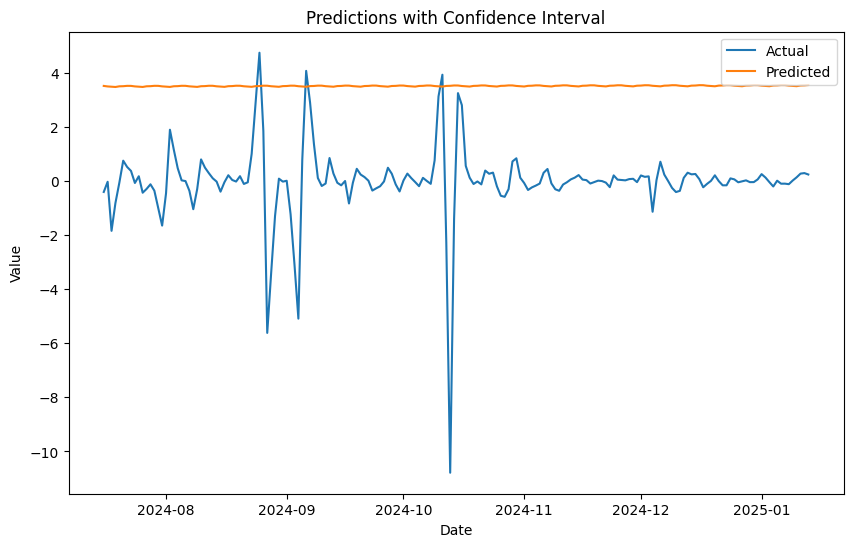

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(testDf['ds'], testDf['y'], label='Actual')
plt.plot(final_forecast['ds'][-len(testDf):],final_forecast['yhat'][-len(testDf):], label='Predicted')
#plt.fill_between(test.index, conx`fint[:, 0], confint[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.title('Predictions with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
